# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]

In [5]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = regions
)


2023-01-22 01:29:20,557 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-01-22 01:29:20,559 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-01-22 01:29:20,560 - INFO - 	Setting export engine to 'sqlite'.
2023-01-22 01:29:20,571 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-01-22 01:29:20,572 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-01-22 01:29:20,574 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-01-22 01:29:20,576 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-01-22 01:29:20,578 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-01-22 01:29:20,579 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-01-22 01:29:20,581 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [12]:
#sisepuede.attribute_strategy.table


In [6]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0] + list(range(3001, 3025)) + [3027]
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2023-01-22 01:40:21,622 - INFO - Running AFOLU model
2023-01-22 01:40:21,914 - INFO - AFOLU model run successfully completed
2023-01-22 01:40:21,915 - INFO - Running CircularEconomy model
2023-01-22 01:40:22,007 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:40:22,007 - INFO - Running IPPU model
2023-01-22 01:40:22,105 - INFO - IPPU model run successfully completed
2023-01-22 01:40:22,106 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:40:22,143 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:40:22,276 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:40:22,277 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-22-Jan 01:40:23.614 Started modeling scenario.
2023-22-Jan 01:40:36.549 Finished modeling scenario.


2023-01-22 01:40:36,761 - INFO - ElectricEnergy model run successfully completed
2023-01-22 01:40:36,842 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:40:36,846 - INFO - Model run for primary_id = 0 successfully completed in 15.22 seconds.
2023-01-22 01:40:36,851 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-22 01:40:37,149 - INFO - AFOLU model run successfully completed
2023-01-22 01:40:37,150 - INFO - Running CircularEconomy model
2023-01-22 01:40:37,242 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:40:37,243 - INFO - Running IPPU model
2023-01-22 01:40:37,345 - INFO - IPPU model run successfully completed
2023-01-22 01:40:37,346 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:40:37,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:40:37,506 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:40:37,507 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 01:40:38.624 Started modeling scenario.
2023-22-Jan 01:40:50.067 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:40:50,343 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:40:50,346 - INFO - Model run for primary_id = 5005 successfully completed in 13.5 seconds.
2023-01-22 01:40:50,782 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-01-22 01:40:50,787 - INFO - Running AFOLU model
2023-01-22 01:40:51,049 - INFO - AFOLU model run successfully completed
2023-01-22 01:40:51,050 - INFO - Running CircularEconomy model
2023-01-22 01:40:51,148 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:40:51,149 - INFO - Running IPPU model
2023-01-22 01:40:51,254 - INFO - IPPU model run successfully completed
2023-01-22 01:40:51,255 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:40:51,288 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:40:51,407 - INFO - NonElectricEnergy without Fu

2023-22-Jan 01:40:52.386 Started modeling scenario.
2023-22-Jan 01:41:02.984 Finished modeling scenario.


2023-01-22 01:41:03,204 - INFO - ElectricEnergy model run successfully completed
2023-01-22 01:41:03,282 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:41:03,285 - INFO - Model run for primary_id = 6006 successfully completed in 12.5 seconds.
2023-01-22 01:41:03,290 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-22 01:41:03,556 - INFO - AFOLU model run successfully completed
2023-01-22 01:41:03,557 - INFO - Running CircularEconomy model
2023-01-22 01:41:03,636 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:41:03,637 - INFO - Running IPPU model
2023-01-22 01:41:03,725 - INFO - IPPU model run successfully completed
2023-01-22 01:41:03,725 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:41:03,759 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:41:03,886 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:41:03,886 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 01:41:04.938 Started modeling scenario.
2023-22-Jan 01:41:15.330 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:41:15,578 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:41:15,581 - INFO - Model run for primary_id = 7007 successfully completed in 12.29 seconds.
2023-01-22 01:41:15,938 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:41:15,941 - INFO - Running AFOLU model
2023-01-22 01:41:16,216 - INFO - AFOLU model run successfully completed
2023-01-22 01:41:16,217 - INFO - Running CircularEconomy model
2023-01-22 01:41:16,301 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:41:16,302 - INFO - Running IPPU model
2023-01-22 01:41:16,404 - INFO - IPPU model run successfully completed
2023-01-22 01:41:16,405 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:41:16,445 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:41:16,572 - INFO - NonElectricEnergy without 

2023-22-Jan 01:41:17.542 Started modeling scenario.
2023-22-Jan 01:41:27.674 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:41:27,940 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:41:27,944 - INFO - Model run for primary_id = 8008 successfully completed in 12.0 seconds.
2023-01-22 01:41:27,948 - INFO - Running AFOLU model
2023-01-22 01:41:28,219 - INFO - AFOLU model run successfully completed
2023-01-22 01:41:28,220 - INFO - Running CircularEconomy model
2023-01-22 01:41:28,303 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:41:28,303 - INFO - Running IPPU model
2023-01-22 01:41:28,400 - INFO - IPPU model run successfully completed
2023-01-22 01:41:28,400 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:41:28,436 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:41:28,578 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:41:28,578 - INFO - Run

2023-22-Jan 01:41:29.611 Started modeling scenario.
2023-22-Jan 01:41:39.857 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:41:40,095 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:41:40,098 - INFO - Model run for primary_id = 9009 successfully completed in 12.15 seconds.
2023-01-22 01:41:40,439 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:41:40,442 - INFO - Running AFOLU model
2023-01-22 01:41:40,679 - INFO - AFOLU model run successfully completed
2023-01-22 01:41:40,680 - INFO - Running CircularEconomy model
2023-01-22 01:41:40,761 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:41:40,762 - INFO - Running IPPU model
2023-01-22 01:41:40,849 - INFO - IPPU model run successfully completed
2023-01-22 01:41:40,850 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:41:40,885 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:41:41,017 - INFO - NonElectricEnergy without 

2023-22-Jan 01:41:41.973 Started modeling scenario.
2023-22-Jan 01:41:52.454 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:41:52,728 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:41:52,731 - INFO - Model run for primary_id = 10010 successfully completed in 12.29 seconds.
2023-01-22 01:41:52,736 - INFO - Running AFOLU model
2023-01-22 01:41:52,984 - INFO - AFOLU model run successfully completed
2023-01-22 01:41:52,985 - INFO - Running CircularEconomy model
2023-01-22 01:41:53,064 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:41:53,064 - INFO - Running IPPU model
2023-01-22 01:41:53,170 - INFO - IPPU model run successfully completed
2023-01-22 01:41:53,170 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:41:53,202 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:41:53,322 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:41:53,323 - INFO - R

2023-22-Jan 01:41:54.313 Started modeling scenario.
2023-22-Jan 01:42:04.406 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:42:04,649 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:42:04,652 - INFO - Model run for primary_id = 11011 successfully completed in 11.92 seconds.
2023-01-22 01:42:04,995 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:42:04,999 - INFO - Running AFOLU model
2023-01-22 01:42:05,232 - INFO - AFOLU model run successfully completed
2023-01-22 01:42:05,233 - INFO - Running CircularEconomy model
2023-01-22 01:42:05,313 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:42:05,313 - INFO - Running IPPU model
2023-01-22 01:42:05,403 - INFO - IPPU model run successfully completed
2023-01-22 01:42:05,404 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:42:05,439 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:42:05,548 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 01:42:05,916 - INFO - AFOLU model run successfully completed
2023-01-22 01:42:05,917 - INFO - Running CircularEconomy model
2023-01-22 01:42:05,998 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:42:05,999 - INFO - Running IPPU model
2023-01-22 01:42:06,088 - INFO - IPPU model run successfully completed
2023-01-22 01:42:06,089 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:42:06,122 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:42:06,241 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:42:06,242 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 01:42:07.190 Started modeling scenario.
2023-22-Jan 01:42:17.226 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:42:17,482 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:42:17,486 - INFO - Model run for primary_id = 13013 successfully completed in 11.84 seconds.
2023-01-22 01:42:17,888 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:42:17,892 - INFO - Running AFOLU model
2023-01-22 01:42:18,141 - INFO - AFOLU model run successfully completed
2023-01-22 01:42:18,141 - INFO - Running CircularEconomy model
2023-01-22 01:42:18,222 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:42:18,222 - INFO - Running IPPU model
2023-01-22 01:42:18,320 - INFO - IPPU model run successfully completed
2023-01-22 01:42:18,321 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:42:18,357 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:42:18,478 - INFO - NonElectricEnergy without

2023-22-Jan 01:42:19.465 Started modeling scenario.
2023-22-Jan 01:42:29.778 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:42:30,020 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:42:30,024 - INFO - Model run for primary_id = 14014 successfully completed in 12.13 seconds.
2023-01-22 01:42:30,028 - INFO - Running AFOLU model
2023-01-22 01:42:30,280 - INFO - AFOLU model run successfully completed
2023-01-22 01:42:30,281 - INFO - Running CircularEconomy model
2023-01-22 01:42:30,367 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:42:30,367 - INFO - Running IPPU model
2023-01-22 01:42:30,456 - INFO - IPPU model run successfully completed
2023-01-22 01:42:30,457 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:42:30,491 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:42:30,609 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:42:30,610 - INFO - R

2023-22-Jan 01:42:31.575 Started modeling scenario.
2023-22-Jan 01:42:42.061 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:42:42,304 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:42:42,307 - INFO - Model run for primary_id = 15015 successfully completed in 12.28 seconds.
2023-01-22 01:42:42,656 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:42:42,659 - INFO - Running AFOLU model
2023-01-22 01:42:42,897 - INFO - AFOLU model run successfully completed
2023-01-22 01:42:42,897 - INFO - Running CircularEconomy model
2023-01-22 01:42:42,972 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:42:42,972 - INFO - Running IPPU model
2023-01-22 01:42:43,058 - INFO - IPPU model run successfully completed
2023-01-22 01:42:43,060 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:42:43,113 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:42:43,237 - INFO - NonElectricEnergy without

2023-22-Jan 01:42:44.189 Started modeling scenario.
2023-22-Jan 01:42:54.204 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:42:54,453 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:42:54,457 - INFO - Model run for primary_id = 16016 successfully completed in 11.8 seconds.
2023-01-22 01:42:54,462 - INFO - Running AFOLU model
2023-01-22 01:42:54,712 - INFO - AFOLU model run successfully completed
2023-01-22 01:42:54,713 - INFO - Running CircularEconomy model
2023-01-22 01:42:54,793 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:42:54,794 - INFO - Running IPPU model
2023-01-22 01:42:54,884 - INFO - IPPU model run successfully completed
2023-01-22 01:42:54,884 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:42:54,918 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:42:55,032 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:42:55,033 - INFO - Ru

2023-22-Jan 01:42:55.989 Started modeling scenario.
2023-22-Jan 01:43:05.982 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:43:06,220 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:43:06,224 - INFO - Model run for primary_id = 17017 successfully completed in 11.76 seconds.
2023-01-22 01:43:06,575 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:43:06,580 - INFO - Running AFOLU model
2023-01-22 01:43:06,826 - INFO - AFOLU model run successfully completed
2023-01-22 01:43:06,826 - INFO - Running CircularEconomy model
2023-01-22 01:43:06,902 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:43:06,903 - INFO - Running IPPU model
2023-01-22 01:43:06,985 - INFO - IPPU model run successfully completed
2023-01-22 01:43:06,986 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:43:07,018 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:43:07,141 - INFO - NonElectricEnergy without

2023-22-Jan 01:43:08.116 Started modeling scenario.
2023-22-Jan 01:43:18.017 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:43:18,290 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:43:18,294 - INFO - Model run for primary_id = 18018 successfully completed in 11.71 seconds.
2023-01-22 01:43:18,298 - INFO - Running AFOLU model
2023-01-22 01:43:18,593 - INFO - AFOLU model run successfully completed
2023-01-22 01:43:18,594 - INFO - Running CircularEconomy model
2023-01-22 01:43:18,684 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:43:18,685 - INFO - Running IPPU model
2023-01-22 01:43:18,782 - INFO - IPPU model run successfully completed
2023-01-22 01:43:18,783 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:43:18,818 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:43:18,952 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:43:18,953 - INFO - R

2023-22-Jan 01:43:20.042 Started modeling scenario.
2023-22-Jan 01:43:30.105 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:43:30,348 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:43:30,353 - INFO - Model run for primary_id = 19019 successfully completed in 12.05 seconds.
2023-01-22 01:43:30,709 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:43:30,713 - INFO - Running AFOLU model
2023-01-22 01:43:30,947 - INFO - AFOLU model run successfully completed
2023-01-22 01:43:30,948 - INFO - Running CircularEconomy model
2023-01-22 01:43:31,023 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:43:31,024 - INFO - Running IPPU model
2023-01-22 01:43:31,117 - INFO - IPPU model run successfully completed
2023-01-22 01:43:31,118 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:43:31,156 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:43:31,282 - INFO - NonElectricEnergy without

2023-22-Jan 01:43:32.255 Started modeling scenario.
2023-22-Jan 01:43:42.249 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:43:42,504 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:43:42,508 - INFO - Model run for primary_id = 20020 successfully completed in 11.8 seconds.
2023-01-22 01:43:42,513 - INFO - Running AFOLU model
2023-01-22 01:43:42,781 - INFO - AFOLU model run successfully completed
2023-01-22 01:43:42,781 - INFO - Running CircularEconomy model
2023-01-22 01:43:42,862 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:43:42,863 - INFO - Running IPPU model
2023-01-22 01:43:42,954 - INFO - IPPU model run successfully completed
2023-01-22 01:43:42,955 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:43:42,991 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:43:43,127 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:43:43,127 - INFO - Ru

2023-22-Jan 01:43:44.079 Started modeling scenario.
2023-22-Jan 01:43:54.362 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:43:54,634 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:43:54,638 - INFO - Model run for primary_id = 21021 successfully completed in 12.13 seconds.
2023-01-22 01:43:54,987 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:43:54,990 - INFO - Running AFOLU model
2023-01-22 01:43:55,233 - INFO - AFOLU model run successfully completed
2023-01-22 01:43:55,234 - INFO - Running CircularEconomy model
2023-01-22 01:43:55,319 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:43:55,319 - INFO - Running IPPU model
2023-01-22 01:43:55,418 - INFO - IPPU model run successfully completed
2023-01-22 01:43:55,419 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:43:55,460 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:43:55,595 - INFO - NonElectricEnergy without

2023-22-Jan 01:43:56.580 Started modeling scenario.
2023-22-Jan 01:44:07.452 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:44:07,689 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:44:07,693 - INFO - Model run for primary_id = 22022 successfully completed in 12.7 seconds.
2023-01-22 01:44:07,698 - INFO - Running AFOLU model
2023-01-22 01:44:07,943 - INFO - AFOLU model run successfully completed
2023-01-22 01:44:07,944 - INFO - Running CircularEconomy model
2023-01-22 01:44:08,023 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:44:08,023 - INFO - Running IPPU model
2023-01-22 01:44:08,120 - INFO - IPPU model run successfully completed
2023-01-22 01:44:08,120 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:44:08,153 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:44:08,272 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:44:08,272 - INFO - Ru

2023-22-Jan 01:44:09.268 Started modeling scenario.
2023-22-Jan 01:44:19.853 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:44:20,116 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:44:20,120 - INFO - Model run for primary_id = 23023 successfully completed in 12.42 seconds.
2023-01-22 01:44:28,838 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:44:28,845 - INFO - Running AFOLU model
2023-01-22 01:44:29,103 - INFO - AFOLU model run successfully completed
2023-01-22 01:44:29,103 - INFO - Running CircularEconomy model
2023-01-22 01:44:29,199 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:44:29,200 - INFO - Running IPPU model
2023-01-22 01:44:29,291 - INFO - IPPU model run successfully completed
2023-01-22 01:44:29,291 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:44:29,325 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:44:29,440 - INFO - NonElectricEnergy without

2023-22-Jan 01:44:30.405 Started modeling scenario.
2023-22-Jan 01:44:40.208 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:44:40,475 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:44:40,478 - INFO - Model run for primary_id = 24024 successfully completed in 11.63 seconds.
2023-01-22 01:44:40,483 - INFO - Running AFOLU model
2023-01-22 01:44:40,728 - INFO - AFOLU model run successfully completed
2023-01-22 01:44:40,728 - INFO - Running CircularEconomy model
2023-01-22 01:44:40,809 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:44:40,810 - INFO - Running IPPU model
2023-01-22 01:44:40,894 - INFO - IPPU model run successfully completed
2023-01-22 01:44:40,895 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:44:40,926 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:44:41,041 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:44:41,042 - INFO - R

2023-22-Jan 01:44:42.051 Started modeling scenario.
2023-22-Jan 01:44:52.215 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:44:52,463 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:44:52,467 - INFO - Model run for primary_id = 25025 successfully completed in 11.98 seconds.
2023-01-22 01:44:52,906 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:44:52,918 - INFO - Running AFOLU model
2023-01-22 01:44:53,189 - INFO - AFOLU model run successfully completed
2023-01-22 01:44:53,190 - INFO - Running CircularEconomy model
2023-01-22 01:44:53,277 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:44:53,277 - INFO - Running IPPU model
2023-01-22 01:44:53,383 - INFO - IPPU model run successfully completed
2023-01-22 01:44:53,383 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:44:53,415 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:44:53,532 - INFO - NonElectricEnergy without

2023-22-Jan 01:44:54.526 Started modeling scenario.
2023-22-Jan 01:45:04.703 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:45:04,933 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:45:04,937 - INFO - Model run for primary_id = 26026 successfully completed in 12.02 seconds.
2023-01-22 01:45:04,942 - INFO - Running AFOLU model
2023-01-22 01:45:05,193 - INFO - AFOLU model run successfully completed
2023-01-22 01:45:05,194 - INFO - Running CircularEconomy model
2023-01-22 01:45:05,267 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:45:05,268 - INFO - Running IPPU model
2023-01-22 01:45:05,353 - INFO - IPPU model run successfully completed
2023-01-22 01:45:05,354 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:45:05,385 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:45:05,518 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:45:05,518 - INFO - R

2023-22-Jan 01:45:06.498 Started modeling scenario.
2023-22-Jan 01:45:16.573 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:45:16,794 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:45:16,797 - INFO - Model run for primary_id = 27027 successfully completed in 11.86 seconds.
2023-01-22 01:45:17,135 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:45:17,139 - INFO - Running AFOLU model
2023-01-22 01:45:17,395 - INFO - AFOLU model run successfully completed
2023-01-22 01:45:17,395 - INFO - Running CircularEconomy model
2023-01-22 01:45:17,482 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:45:17,483 - INFO - Running IPPU model
2023-01-22 01:45:17,567 - INFO - IPPU model run successfully completed
2023-01-22 01:45:17,568 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:45:17,601 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:45:17,732 - INFO - NonElectricEnergy without

2023-22-Jan 01:45:18.650 Started modeling scenario.
2023-22-Jan 01:45:29.105 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:45:29,364 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:45:29,368 - INFO - Model run for primary_id = 28028 successfully completed in 12.23 seconds.
2023-01-22 01:45:29,373 - INFO - Running AFOLU model
2023-01-22 01:45:29,606 - INFO - AFOLU model run successfully completed
2023-01-22 01:45:29,606 - INFO - Running CircularEconomy model
2023-01-22 01:45:29,678 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:45:29,679 - INFO - Running IPPU model
2023-01-22 01:45:29,759 - INFO - IPPU model run successfully completed
2023-01-22 01:45:29,760 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:45:29,788 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:45:29,891 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:45:29,892 - INFO - R

2023-22-Jan 01:45:30.866 Started modeling scenario.
2023-22-Jan 01:45:41.486 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:45:41,743 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:45:41,746 - INFO - Model run for primary_id = 31031 successfully completed in 12.37 seconds.
2023-01-22 01:45:42,090 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:45:42,649 - INFO - Running AFOLU model
2023-01-22 01:45:42,884 - INFO - AFOLU model run successfully completed
2023-01-22 01:45:42,885 - INFO - Running CircularEconomy model
2023-01-22 01:45:42,961 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:45:42,962 - INFO - Running IPPU model
2023-01-22 01:45:43,045 - INFO - IPPU model run successfully completed
2023-01-22 01:45:43,046 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:45:43,074 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:45:43,188 - INFO - NonElectricEnergy without

2023-22-Jan 01:45:44.104 Started modeling scenario.
2023-22-Jan 01:45:53.895 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:45:54,168 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:45:54,171 - INFO - Model run for primary_id = 0 successfully completed in 11.52 seconds.
2023-01-22 01:45:54,178 - INFO - Running AFOLU model
2023-01-22 01:45:54,416 - INFO - AFOLU model run successfully completed
2023-01-22 01:45:54,417 - INFO - Running CircularEconomy model
2023-01-22 01:45:54,490 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:45:54,490 - INFO - Running IPPU model
2023-01-22 01:45:54,583 - INFO - IPPU model run successfully completed
2023-01-22 01:45:54,584 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:45:54,617 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:45:54,741 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:45:54,741 - INFO - Runni

2023-22-Jan 01:45:55.701 Started modeling scenario.
2023-22-Jan 01:46:06.215 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:46:06,439 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:46:06,441 - INFO - Model run for primary_id = 5005 successfully completed in 12.26 seconds.
2023-01-22 01:46:06,779 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:46:06,782 - INFO - Running AFOLU model
2023-01-22 01:46:07,013 - INFO - AFOLU model run successfully completed
2023-01-22 01:46:07,014 - INFO - Running CircularEconomy model
2023-01-22 01:46:07,083 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:46:07,084 - INFO - Running IPPU model
2023-01-22 01:46:07,159 - INFO - IPPU model run successfully completed
2023-01-22 01:46:07,160 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:46:07,188 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:46:07,291 - INFO - NonElectricEnergy without 

2023-22-Jan 01:46:08.214 Started modeling scenario.
2023-22-Jan 01:46:18.318 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:46:18,582 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:46:18,586 - INFO - Model run for primary_id = 6006 successfully completed in 11.8 seconds.
2023-01-22 01:46:18,590 - INFO - Running AFOLU model
2023-01-22 01:46:18,831 - INFO - AFOLU model run successfully completed
2023-01-22 01:46:18,832 - INFO - Running CircularEconomy model
2023-01-22 01:46:18,899 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:46:18,899 - INFO - Running IPPU model
2023-01-22 01:46:18,976 - INFO - IPPU model run successfully completed
2023-01-22 01:46:18,976 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:46:19,006 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:46:19,123 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:46:19,124 - INFO - Run

2023-22-Jan 01:46:20.060 Started modeling scenario.
2023-22-Jan 01:46:30.021 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:46:30,284 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:46:30,287 - INFO - Model run for primary_id = 7007 successfully completed in 11.7 seconds.
2023-01-22 01:46:30,622 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:46:30,625 - INFO - Running AFOLU model
2023-01-22 01:46:30,869 - INFO - AFOLU model run successfully completed
2023-01-22 01:46:30,869 - INFO - Running CircularEconomy model
2023-01-22 01:46:30,942 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:46:30,942 - INFO - Running IPPU model
2023-01-22 01:46:31,022 - INFO - IPPU model run successfully completed
2023-01-22 01:46:31,022 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:46:31,056 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:46:31,180 - INFO - NonElectricEnergy without F

2023-22-Jan 01:46:32.076 Started modeling scenario.
2023-22-Jan 01:46:42.043 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:46:42,313 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:46:42,316 - INFO - Model run for primary_id = 8008 successfully completed in 11.69 seconds.
2023-01-22 01:46:42,320 - INFO - Running AFOLU model
2023-01-22 01:46:42,556 - INFO - AFOLU model run successfully completed
2023-01-22 01:46:42,557 - INFO - Running CircularEconomy model
2023-01-22 01:46:42,625 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:46:42,626 - INFO - Running IPPU model
2023-01-22 01:46:42,700 - INFO - IPPU model run successfully completed
2023-01-22 01:46:42,700 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:46:42,728 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:46:42,832 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:46:42,832 - INFO - Ru

2023-22-Jan 01:46:43.830 Started modeling scenario.
2023-22-Jan 01:46:53.838 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:46:54,102 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:46:54,105 - INFO - Model run for primary_id = 9009 successfully completed in 11.79 seconds.
2023-01-22 01:46:54,470 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:46:54,474 - INFO - Running AFOLU model
2023-01-22 01:46:54,719 - INFO - AFOLU model run successfully completed
2023-01-22 01:46:54,720 - INFO - Running CircularEconomy model
2023-01-22 01:46:54,801 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:46:54,802 - INFO - Running IPPU model
2023-01-22 01:46:54,890 - INFO - IPPU model run successfully completed
2023-01-22 01:46:54,891 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:46:54,927 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:46:55,045 - INFO - NonElectricEnergy without 

2023-22-Jan 01:46:55.949 Started modeling scenario.
2023-22-Jan 01:47:05.837 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:47:06,102 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:47:06,105 - INFO - Model run for primary_id = 10010 successfully completed in 11.63 seconds.
2023-01-22 01:47:06,109 - INFO - Running AFOLU model
2023-01-22 01:47:06,342 - INFO - AFOLU model run successfully completed
2023-01-22 01:47:06,343 - INFO - Running CircularEconomy model
2023-01-22 01:47:06,415 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:47:06,416 - INFO - Running IPPU model
2023-01-22 01:47:06,491 - INFO - IPPU model run successfully completed
2023-01-22 01:47:06,492 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:47:06,521 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:47:06,631 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:47:06,632 - INFO - R

2023-22-Jan 01:47:07.598 Started modeling scenario.
2023-22-Jan 01:47:17.550 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:47:17,800 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:47:17,803 - INFO - Model run for primary_id = 11011 successfully completed in 11.69 seconds.
2023-01-22 01:47:18,158 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:47:18,162 - INFO - Running AFOLU model
2023-01-22 01:47:18,430 - INFO - AFOLU model run successfully completed
2023-01-22 01:47:18,431 - INFO - Running CircularEconomy model
2023-01-22 01:47:18,509 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:47:18,509 - INFO - Running IPPU model
2023-01-22 01:47:18,597 - INFO - IPPU model run successfully completed
2023-01-22 01:47:18,598 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:47:18,630 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:47:18,734 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 01:47:19,071 - INFO - AFOLU model run successfully completed
2023-01-22 01:47:19,071 - INFO - Running CircularEconomy model
2023-01-22 01:47:19,152 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:47:19,152 - INFO - Running IPPU model
2023-01-22 01:47:19,230 - INFO - IPPU model run successfully completed
2023-01-22 01:47:19,230 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:47:19,258 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:47:19,366 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:47:19,367 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 01:47:20.292 Started modeling scenario.
2023-22-Jan 01:47:30.122 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:47:30,382 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:47:30,385 - INFO - Model run for primary_id = 13013 successfully completed in 11.56 seconds.
2023-01-22 01:47:30,773 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:47:30,777 - INFO - Running AFOLU model
2023-01-22 01:47:31,020 - INFO - AFOLU model run successfully completed
2023-01-22 01:47:31,020 - INFO - Running CircularEconomy model
2023-01-22 01:47:31,098 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:47:31,099 - INFO - Running IPPU model
2023-01-22 01:47:31,190 - INFO - IPPU model run successfully completed
2023-01-22 01:47:31,191 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:47:31,229 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:47:31,342 - INFO - NonElectricEnergy without

2023-22-Jan 01:47:32.246 Started modeling scenario.
2023-22-Jan 01:47:42.071 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:47:42,312 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:47:42,315 - INFO - Model run for primary_id = 14014 successfully completed in 11.54 seconds.
2023-01-22 01:47:42,318 - INFO - Running AFOLU model
2023-01-22 01:47:42,548 - INFO - AFOLU model run successfully completed
2023-01-22 01:47:42,549 - INFO - Running CircularEconomy model
2023-01-22 01:47:42,628 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:47:42,629 - INFO - Running IPPU model
2023-01-22 01:47:42,706 - INFO - IPPU model run successfully completed
2023-01-22 01:47:42,706 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:47:42,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:47:42,834 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:47:42,835 - INFO - R

2023-22-Jan 01:47:43.781 Started modeling scenario.
2023-22-Jan 01:47:53.755 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:47:53,976 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:47:53,979 - INFO - Model run for primary_id = 15015 successfully completed in 11.66 seconds.
2023-01-22 01:47:54,325 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:47:54,328 - INFO - Running AFOLU model
2023-01-22 01:47:54,571 - INFO - AFOLU model run successfully completed
2023-01-22 01:47:54,571 - INFO - Running CircularEconomy model
2023-01-22 01:47:54,652 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:47:54,652 - INFO - Running IPPU model
2023-01-22 01:47:54,737 - INFO - IPPU model run successfully completed
2023-01-22 01:47:54,738 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:47:54,767 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:47:54,887 - INFO - NonElectricEnergy without

2023-22-Jan 01:47:55.780 Started modeling scenario.
2023-22-Jan 01:48:05.578 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:48:05,826 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:48:05,828 - INFO - Model run for primary_id = 16016 successfully completed in 11.5 seconds.
2023-01-22 01:48:05,832 - INFO - Running AFOLU model
2023-01-22 01:48:06,063 - INFO - AFOLU model run successfully completed
2023-01-22 01:48:06,063 - INFO - Running CircularEconomy model
2023-01-22 01:48:06,141 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:48:06,142 - INFO - Running IPPU model
2023-01-22 01:48:06,218 - INFO - IPPU model run successfully completed
2023-01-22 01:48:06,219 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:48:06,249 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:48:06,370 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:48:06,371 - INFO - Ru

2023-22-Jan 01:48:07.355 Started modeling scenario.
2023-22-Jan 01:48:17.386 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:48:17,648 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:48:17,652 - INFO - Model run for primary_id = 17017 successfully completed in 11.82 seconds.
2023-01-22 01:48:18,014 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:48:18,018 - INFO - Running AFOLU model
2023-01-22 01:48:18,275 - INFO - AFOLU model run successfully completed
2023-01-22 01:48:18,276 - INFO - Running CircularEconomy model
2023-01-22 01:48:18,348 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:48:18,349 - INFO - Running IPPU model
2023-01-22 01:48:18,443 - INFO - IPPU model run successfully completed
2023-01-22 01:48:18,444 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:48:18,478 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:48:18,616 - INFO - NonElectricEnergy without

2023-22-Jan 01:48:19.595 Started modeling scenario.
2023-22-Jan 01:48:29.582 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:48:29,812 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:48:29,815 - INFO - Model run for primary_id = 18018 successfully completed in 11.8 seconds.
2023-01-22 01:48:29,819 - INFO - Running AFOLU model
2023-01-22 01:48:30,100 - INFO - AFOLU model run successfully completed
2023-01-22 01:48:30,101 - INFO - Running CircularEconomy model
2023-01-22 01:48:30,190 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:48:30,190 - INFO - Running IPPU model
2023-01-22 01:48:30,285 - INFO - IPPU model run successfully completed
2023-01-22 01:48:30,285 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:48:30,320 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:48:30,449 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:48:30,449 - INFO - Ru

2023-22-Jan 01:48:31.498 Started modeling scenario.
2023-22-Jan 01:48:41.343 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:48:41,585 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:48:41,588 - INFO - Model run for primary_id = 19019 successfully completed in 11.77 seconds.
2023-01-22 01:48:41,934 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:48:41,938 - INFO - Running AFOLU model
2023-01-22 01:48:42,170 - INFO - AFOLU model run successfully completed
2023-01-22 01:48:42,171 - INFO - Running CircularEconomy model
2023-01-22 01:48:42,239 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:48:42,239 - INFO - Running IPPU model
2023-01-22 01:48:42,315 - INFO - IPPU model run successfully completed
2023-01-22 01:48:42,315 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:48:42,345 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:48:42,468 - INFO - NonElectricEnergy without

2023-22-Jan 01:48:43.372 Started modeling scenario.
2023-22-Jan 01:48:53.177 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:48:53,405 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:48:53,410 - INFO - Model run for primary_id = 20020 successfully completed in 11.47 seconds.
2023-01-22 01:48:53,414 - INFO - Running AFOLU model
2023-01-22 01:48:53,646 - INFO - AFOLU model run successfully completed
2023-01-22 01:48:53,647 - INFO - Running CircularEconomy model
2023-01-22 01:48:53,724 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:48:53,725 - INFO - Running IPPU model
2023-01-22 01:48:53,807 - INFO - IPPU model run successfully completed
2023-01-22 01:48:53,807 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:48:53,837 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:48:53,950 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:48:53,950 - INFO - R

2023-22-Jan 01:48:54.865 Started modeling scenario.
2023-22-Jan 01:49:04.883 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:49:05,118 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:49:05,120 - INFO - Model run for primary_id = 21021 successfully completed in 11.71 seconds.
2023-01-22 01:49:05,448 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:49:05,451 - INFO - Running AFOLU model
2023-01-22 01:49:05,683 - INFO - AFOLU model run successfully completed
2023-01-22 01:49:05,683 - INFO - Running CircularEconomy model
2023-01-22 01:49:05,750 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:49:05,751 - INFO - Running IPPU model
2023-01-22 01:49:05,824 - INFO - IPPU model run successfully completed
2023-01-22 01:49:05,825 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:49:05,853 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:49:05,969 - INFO - NonElectricEnergy without

2023-22-Jan 01:49:06.845 Started modeling scenario.
2023-22-Jan 01:49:16.787 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:49:17,032 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:49:17,035 - INFO - Model run for primary_id = 22022 successfully completed in 11.58 seconds.
2023-01-22 01:49:17,039 - INFO - Running AFOLU model
2023-01-22 01:49:17,278 - INFO - AFOLU model run successfully completed
2023-01-22 01:49:17,279 - INFO - Running CircularEconomy model
2023-01-22 01:49:17,350 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:49:17,350 - INFO - Running IPPU model
2023-01-22 01:49:17,427 - INFO - IPPU model run successfully completed
2023-01-22 01:49:17,427 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:49:17,458 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:49:17,579 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:49:17,580 - INFO - R

2023-22-Jan 01:49:18.555 Started modeling scenario.
2023-22-Jan 01:49:28.677 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:49:28,914 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:49:28,917 - INFO - Model run for primary_id = 23023 successfully completed in 11.88 seconds.
2023-01-22 01:49:29,277 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:49:29,280 - INFO - Running AFOLU model
2023-01-22 01:49:29,529 - INFO - AFOLU model run successfully completed
2023-01-22 01:49:29,530 - INFO - Running CircularEconomy model
2023-01-22 01:49:29,601 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:49:29,602 - INFO - Running IPPU model
2023-01-22 01:49:29,676 - INFO - IPPU model run successfully completed
2023-01-22 01:49:29,677 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:49:29,713 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:49:29,841 - INFO - NonElectricEnergy without

2023-22-Jan 01:49:30.779 Started modeling scenario.
2023-22-Jan 01:49:40.583 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:49:40,828 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:49:40,830 - INFO - Model run for primary_id = 24024 successfully completed in 11.55 seconds.
2023-01-22 01:49:40,833 - INFO - Running AFOLU model
2023-01-22 01:49:41,063 - INFO - AFOLU model run successfully completed
2023-01-22 01:49:41,063 - INFO - Running CircularEconomy model
2023-01-22 01:49:41,147 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:49:41,147 - INFO - Running IPPU model
2023-01-22 01:49:41,235 - INFO - IPPU model run successfully completed
2023-01-22 01:49:41,235 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:49:41,268 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:49:41,382 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:49:41,383 - INFO - R

2023-22-Jan 01:49:42.390 Started modeling scenario.
2023-22-Jan 01:49:52.787 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:49:53,032 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:49:53,035 - INFO - Model run for primary_id = 25025 successfully completed in 12.2 seconds.
2023-01-22 01:49:53,404 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:49:53,408 - INFO - Running AFOLU model
2023-01-22 01:49:53,637 - INFO - AFOLU model run successfully completed
2023-01-22 01:49:53,638 - INFO - Running CircularEconomy model
2023-01-22 01:49:53,717 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:49:53,718 - INFO - Running IPPU model
2023-01-22 01:49:53,812 - INFO - IPPU model run successfully completed
2023-01-22 01:49:53,813 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:49:53,853 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:49:53,989 - INFO - NonElectricEnergy without 

2023-22-Jan 01:49:55.158 Started modeling scenario.
2023-22-Jan 01:50:08.237 Finished modeling scenario.


2023-01-22 01:50:08,462 - INFO - ElectricEnergy model run successfully completed
2023-01-22 01:50:08,531 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:50:08,535 - INFO - Model run for primary_id = 26026 successfully completed in 15.13 seconds.
2023-01-22 01:50:08,540 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-22 01:50:08,786 - INFO - AFOLU model run successfully completed
2023-01-22 01:50:08,787 - INFO - Running CircularEconomy model
2023-01-22 01:50:08,865 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:50:08,865 - INFO - Running IPPU model
2023-01-22 01:50:08,954 - INFO - IPPU model run successfully completed
2023-01-22 01:50:08,954 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:50:08,986 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:50:09,099 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:50:09,100 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 01:50:10.128 Started modeling scenario.
2023-22-Jan 01:50:20.424 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:50:20,692 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:50:20,696 - INFO - Model run for primary_id = 27027 successfully completed in 12.16 seconds.
2023-01-22 01:50:21,107 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:50:21,113 - INFO - Running AFOLU model
2023-01-22 01:50:21,375 - INFO - AFOLU model run successfully completed
2023-01-22 01:50:21,376 - INFO - Running CircularEconomy model
2023-01-22 01:50:21,470 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:50:21,471 - INFO - Running IPPU model
2023-01-22 01:50:21,565 - INFO - IPPU model run successfully completed
2023-01-22 01:50:21,566 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:50:21,597 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:50:21,722 - INFO - NonElectricEnergy without

2023-22-Jan 01:50:22.680 Started modeling scenario.
2023-22-Jan 01:50:33.294 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:50:33,557 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:50:33,560 - INFO - Model run for primary_id = 28028 successfully completed in 12.45 seconds.
2023-01-22 01:50:33,568 - INFO - Running AFOLU model
2023-01-22 01:50:33,832 - INFO - AFOLU model run successfully completed
2023-01-22 01:50:33,833 - INFO - Running CircularEconomy model
2023-01-22 01:50:33,909 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:50:33,909 - INFO - Running IPPU model
2023-01-22 01:50:34,007 - INFO - IPPU model run successfully completed
2023-01-22 01:50:34,008 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:50:34,041 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:50:34,176 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:50:34,176 - INFO - R

2023-22-Jan 01:50:35.191 Started modeling scenario.
2023-22-Jan 01:50:45.475 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:50:45,727 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:50:45,731 - INFO - Model run for primary_id = 31031 successfully completed in 12.16 seconds.
2023-01-22 01:50:46,096 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:50:46,887 - INFO - Running AFOLU model
2023-01-22 01:50:47,116 - INFO - AFOLU model run successfully completed
2023-01-22 01:50:47,116 - INFO - Running CircularEconomy model
2023-01-22 01:50:47,191 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:50:47,192 - INFO - Running IPPU model
2023-01-22 01:50:47,270 - INFO - IPPU model run successfully completed
2023-01-22 01:50:47,271 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:50:47,299 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:50:47,404 - INFO - NonElectricEnergy without

2023-22-Jan 01:50:48.351 Started modeling scenario.
2023-22-Jan 01:51:15.757 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:51:15,982 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:51:15,985 - INFO - Model run for primary_id = 0 successfully completed in 29.1 seconds.
2023-01-22 01:51:15,992 - INFO - Running AFOLU model
2023-01-22 01:51:16,228 - INFO - AFOLU model run successfully completed
2023-01-22 01:51:16,228 - INFO - Running CircularEconomy model
2023-01-22 01:51:16,303 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:51:16,304 - INFO - Running IPPU model
2023-01-22 01:51:16,384 - INFO - IPPU model run successfully completed
2023-01-22 01:51:16,384 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:51:16,413 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:51:16,521 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:51:16,522 - INFO - Runnin

2023-22-Jan 01:51:17.499 Started modeling scenario.
2023-22-Jan 01:51:44.443 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:51:44,703 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:51:44,706 - INFO - Model run for primary_id = 5005 successfully completed in 28.71 seconds.
2023-01-22 01:51:45,092 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:51:45,096 - INFO - Running AFOLU model
2023-01-22 01:51:45,370 - INFO - AFOLU model run successfully completed
2023-01-22 01:51:45,371 - INFO - Running CircularEconomy model
2023-01-22 01:51:45,452 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:51:45,453 - INFO - Running IPPU model
2023-01-22 01:51:45,548 - INFO - IPPU model run successfully completed
2023-01-22 01:51:45,549 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:51:45,587 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:51:45,703 - INFO - NonElectricEnergy without 

2023-22-Jan 01:51:46.593 Started modeling scenario.
2023-22-Jan 01:52:13.658 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:52:13,926 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:52:13,930 - INFO - Model run for primary_id = 6006 successfully completed in 28.83 seconds.
2023-01-22 01:52:13,933 - INFO - Running AFOLU model
2023-01-22 01:52:14,192 - INFO - AFOLU model run successfully completed
2023-01-22 01:52:14,193 - INFO - Running CircularEconomy model
2023-01-22 01:52:14,262 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:52:14,263 - INFO - Running IPPU model
2023-01-22 01:52:14,340 - INFO - IPPU model run successfully completed
2023-01-22 01:52:14,341 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:52:14,373 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:52:14,487 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:52:14,488 - INFO - Ru

2023-22-Jan 01:52:15.482 Started modeling scenario.
2023-22-Jan 01:52:39.345 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:52:39,604 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:52:39,607 - INFO - Model run for primary_id = 7007 successfully completed in 25.67 seconds.
2023-01-22 01:52:39,982 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:52:39,987 - INFO - Running AFOLU model
2023-01-22 01:52:40,234 - INFO - AFOLU model run successfully completed
2023-01-22 01:52:40,234 - INFO - Running CircularEconomy model
2023-01-22 01:52:40,314 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:52:40,314 - INFO - Running IPPU model
2023-01-22 01:52:40,403 - INFO - IPPU model run successfully completed
2023-01-22 01:52:40,403 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:52:40,444 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:52:40,565 - INFO - NonElectricEnergy without 

2023-22-Jan 01:52:41.447 Started modeling scenario.
2023-22-Jan 01:53:08.590 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:53:08,844 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:53:08,847 - INFO - Model run for primary_id = 8008 successfully completed in 28.86 seconds.
2023-01-22 01:53:08,851 - INFO - Running AFOLU model
2023-01-22 01:53:09,096 - INFO - AFOLU model run successfully completed
2023-01-22 01:53:09,096 - INFO - Running CircularEconomy model
2023-01-22 01:53:09,183 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:53:09,184 - INFO - Running IPPU model
2023-01-22 01:53:09,268 - INFO - IPPU model run successfully completed
2023-01-22 01:53:09,270 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:53:09,299 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:53:09,407 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:53:09,408 - INFO - Ru

2023-22-Jan 01:53:10.411 Started modeling scenario.
2023-22-Jan 01:53:31.322 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:53:31,579 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:53:31,582 - INFO - Model run for primary_id = 9009 successfully completed in 22.73 seconds.
2023-01-22 01:53:31,956 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:53:31,960 - INFO - Running AFOLU model
2023-01-22 01:53:32,200 - INFO - AFOLU model run successfully completed
2023-01-22 01:53:32,201 - INFO - Running CircularEconomy model
2023-01-22 01:53:32,281 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:53:32,282 - INFO - Running IPPU model
2023-01-22 01:53:32,370 - INFO - IPPU model run successfully completed
2023-01-22 01:53:32,371 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:53:32,416 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:53:32,556 - INFO - NonElectricEnergy without 

2023-22-Jan 01:53:33.569 Started modeling scenario.
2023-22-Jan 01:53:58.111 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:53:58,381 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:53:58,385 - INFO - Model run for primary_id = 10010 successfully completed in 26.43 seconds.
2023-01-22 01:53:58,389 - INFO - Running AFOLU model
2023-01-22 01:53:58,656 - INFO - AFOLU model run successfully completed
2023-01-22 01:53:58,656 - INFO - Running CircularEconomy model
2023-01-22 01:53:58,743 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:53:58,744 - INFO - Running IPPU model
2023-01-22 01:53:58,840 - INFO - IPPU model run successfully completed
2023-01-22 01:53:58,841 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:53:58,876 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:53:59,009 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:53:59,010 - INFO - R

2023-22-Jan 01:54:00.038 Started modeling scenario.
2023-22-Jan 01:54:27.176 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:54:27,440 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:54:27,443 - INFO - Model run for primary_id = 11011 successfully completed in 29.05 seconds.
2023-01-22 01:54:32,102 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:54:32,105 - INFO - Running AFOLU model
2023-01-22 01:54:32,358 - INFO - AFOLU model run successfully completed
2023-01-22 01:54:32,359 - INFO - Running CircularEconomy model
2023-01-22 01:54:32,434 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:54:32,435 - INFO - Running IPPU model
2023-01-22 01:54:32,521 - INFO - IPPU model run successfully completed
2023-01-22 01:54:32,522 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:54:32,554 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:54:32,646 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 01:54:32,984 - INFO - AFOLU model run successfully completed
2023-01-22 01:54:32,985 - INFO - Running CircularEconomy model
2023-01-22 01:54:33,061 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:54:33,062 - INFO - Running IPPU model
2023-01-22 01:54:33,163 - INFO - IPPU model run successfully completed
2023-01-22 01:54:33,164 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:54:33,201 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:54:33,313 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:54:33,313 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 01:54:34.222 Started modeling scenario.
2023-22-Jan 01:54:56.243 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:54:56,495 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:54:56,498 - INFO - Model run for primary_id = 13013 successfully completed in 23.77 seconds.
2023-01-22 01:54:56,906 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:54:56,910 - INFO - Running AFOLU model
2023-01-22 01:54:57,174 - INFO - AFOLU model run successfully completed
2023-01-22 01:54:57,175 - INFO - Running CircularEconomy model
2023-01-22 01:54:57,254 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:54:57,255 - INFO - Running IPPU model
2023-01-22 01:54:57,359 - INFO - IPPU model run successfully completed
2023-01-22 01:54:57,360 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:54:57,394 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:54:57,502 - INFO - NonElectricEnergy without

2023-22-Jan 01:54:58.462 Started modeling scenario.
2023-22-Jan 01:55:21.431 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:55:21,671 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:55:21,674 - INFO - Model run for primary_id = 14014 successfully completed in 24.76 seconds.
2023-01-22 01:55:21,677 - INFO - Running AFOLU model
2023-01-22 01:55:21,917 - INFO - AFOLU model run successfully completed
2023-01-22 01:55:21,918 - INFO - Running CircularEconomy model
2023-01-22 01:55:21,989 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:55:21,990 - INFO - Running IPPU model
2023-01-22 01:55:22,065 - INFO - IPPU model run successfully completed
2023-01-22 01:55:22,065 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:55:22,091 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:55:22,193 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:55:22,194 - INFO - R

2023-22-Jan 01:55:23.185 Started modeling scenario.
2023-22-Jan 01:55:48.605 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:55:48,857 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:55:48,860 - INFO - Model run for primary_id = 15015 successfully completed in 27.18 seconds.
2023-01-22 01:55:49,266 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:55:49,270 - INFO - Running AFOLU model
2023-01-22 01:55:49,530 - INFO - AFOLU model run successfully completed
2023-01-22 01:55:49,531 - INFO - Running CircularEconomy model
2023-01-22 01:55:49,613 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:55:49,614 - INFO - Running IPPU model
2023-01-22 01:55:49,708 - INFO - IPPU model run successfully completed
2023-01-22 01:55:49,709 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:55:49,740 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:55:49,854 - INFO - NonElectricEnergy without

2023-22-Jan 01:55:50.754 Started modeling scenario.
2023-22-Jan 01:56:15.145 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:56:15,390 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:56:15,393 - INFO - Model run for primary_id = 16016 successfully completed in 26.12 seconds.
2023-01-22 01:56:15,396 - INFO - Running AFOLU model
2023-01-22 01:56:15,624 - INFO - AFOLU model run successfully completed
2023-01-22 01:56:15,624 - INFO - Running CircularEconomy model
2023-01-22 01:56:15,693 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:56:15,693 - INFO - Running IPPU model
2023-01-22 01:56:15,771 - INFO - IPPU model run successfully completed
2023-01-22 01:56:15,771 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:56:15,799 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:56:15,901 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:56:15,902 - INFO - R

2023-22-Jan 01:56:16.825 Started modeling scenario.
2023-22-Jan 01:56:43.667 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:56:43,887 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:56:43,890 - INFO - Model run for primary_id = 17017 successfully completed in 28.49 seconds.
2023-01-22 01:56:44,345 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:56:44,349 - INFO - Running AFOLU model
2023-01-22 01:56:44,622 - INFO - AFOLU model run successfully completed
2023-01-22 01:56:44,623 - INFO - Running CircularEconomy model
2023-01-22 01:56:44,703 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:56:44,704 - INFO - Running IPPU model
2023-01-22 01:56:44,793 - INFO - IPPU model run successfully completed
2023-01-22 01:56:44,794 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:56:44,825 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:56:44,952 - INFO - NonElectricEnergy without

2023-22-Jan 01:56:45.931 Started modeling scenario.
2023-22-Jan 01:57:12.939 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:57:13,209 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:57:13,212 - INFO - Model run for primary_id = 18018 successfully completed in 28.86 seconds.
2023-01-22 01:57:13,219 - INFO - Running AFOLU model
2023-01-22 01:57:13,450 - INFO - AFOLU model run successfully completed
2023-01-22 01:57:13,450 - INFO - Running CircularEconomy model
2023-01-22 01:57:13,519 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:57:13,519 - INFO - Running IPPU model
2023-01-22 01:57:13,592 - INFO - IPPU model run successfully completed
2023-01-22 01:57:13,593 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:57:13,621 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:57:13,729 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:57:13,730 - INFO - R

2023-22-Jan 01:57:14.715 Started modeling scenario.
2023-22-Jan 01:57:37.114 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:57:37,363 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:57:37,366 - INFO - Model run for primary_id = 19019 successfully completed in 24.15 seconds.
2023-01-22 01:57:37,736 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:57:37,742 - INFO - Running AFOLU model
2023-01-22 01:57:37,982 - INFO - AFOLU model run successfully completed
2023-01-22 01:57:37,983 - INFO - Running CircularEconomy model
2023-01-22 01:57:38,056 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:57:38,057 - INFO - Running IPPU model
2023-01-22 01:57:38,149 - INFO - IPPU model run successfully completed
2023-01-22 01:57:38,150 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:57:38,190 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:57:38,320 - INFO - NonElectricEnergy without

2023-22-Jan 01:57:39.248 Started modeling scenario.
2023-22-Jan 01:58:05.742 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:58:05,947 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:58:05,950 - INFO - Model run for primary_id = 20020 successfully completed in 28.21 seconds.
2023-01-22 01:58:05,954 - INFO - Running AFOLU model
2023-01-22 01:58:06,199 - INFO - AFOLU model run successfully completed
2023-01-22 01:58:06,200 - INFO - Running CircularEconomy model
2023-01-22 01:58:06,269 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:58:06,270 - INFO - Running IPPU model
2023-01-22 01:58:06,350 - INFO - IPPU model run successfully completed
2023-01-22 01:58:06,350 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:58:06,379 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:58:06,488 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:58:06,489 - INFO - R

2023-22-Jan 01:58:07.407 Started modeling scenario.
2023-22-Jan 01:58:30.602 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:58:30,847 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:58:30,850 - INFO - Model run for primary_id = 21021 successfully completed in 24.9 seconds.
2023-01-22 01:58:31,197 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:58:31,201 - INFO - Running AFOLU model
2023-01-22 01:58:31,433 - INFO - AFOLU model run successfully completed
2023-01-22 01:58:31,434 - INFO - Running CircularEconomy model
2023-01-22 01:58:31,514 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:58:31,515 - INFO - Running IPPU model
2023-01-22 01:58:31,606 - INFO - IPPU model run successfully completed
2023-01-22 01:58:31,606 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:58:31,641 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:58:31,780 - INFO - NonElectricEnergy without 

2023-22-Jan 01:58:32.706 Started modeling scenario.
2023-22-Jan 01:58:56.694 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:58:56,939 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:58:56,942 - INFO - Model run for primary_id = 22022 successfully completed in 25.74 seconds.
2023-01-22 01:58:56,946 - INFO - Running AFOLU model
2023-01-22 01:58:57,183 - INFO - AFOLU model run successfully completed
2023-01-22 01:58:57,184 - INFO - Running CircularEconomy model
2023-01-22 01:58:57,254 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:58:57,255 - INFO - Running IPPU model
2023-01-22 01:58:57,328 - INFO - IPPU model run successfully completed
2023-01-22 01:58:57,329 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:58:57,358 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:58:57,482 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:58:57,483 - INFO - R

2023-22-Jan 01:58:58.453 Started modeling scenario.
2023-22-Jan 01:59:25.260 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:59:25,503 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:59:25,506 - INFO - Model run for primary_id = 23023 successfully completed in 28.56 seconds.
2023-01-22 01:59:25,870 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 01:59:25,877 - INFO - Running AFOLU model
2023-01-22 01:59:26,107 - INFO - AFOLU model run successfully completed
2023-01-22 01:59:26,108 - INFO - Running CircularEconomy model
2023-01-22 01:59:26,179 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:59:26,180 - INFO - Running IPPU model
2023-01-22 01:59:26,259 - INFO - IPPU model run successfully completed
2023-01-22 01:59:26,260 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:59:26,291 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:59:26,418 - INFO - NonElectricEnergy without

2023-22-Jan 01:59:27.342 Started modeling scenario.
2023-22-Jan 01:59:54.838 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 01:59:55,081 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 01:59:55,085 - INFO - Model run for primary_id = 24024 successfully completed in 29.21 seconds.
2023-01-22 01:59:55,089 - INFO - Running AFOLU model
2023-01-22 01:59:55,340 - INFO - AFOLU model run successfully completed
2023-01-22 01:59:55,341 - INFO - Running CircularEconomy model
2023-01-22 01:59:55,411 - INFO - CircularEconomy model run successfully completed
2023-01-22 01:59:55,412 - INFO - Running IPPU model
2023-01-22 01:59:55,490 - INFO - IPPU model run successfully completed
2023-01-22 01:59:55,491 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 01:59:55,520 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 01:59:55,631 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 01:59:55,632 - INFO - R

2023-22-Jan 01:59:56.587 Started modeling scenario.
2023-22-Jan 02:00:25.159 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:00:25,397 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:00:25,400 - INFO - Model run for primary_id = 25025 successfully completed in 30.31 seconds.
2023-01-22 02:00:25,762 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:00:25,765 - INFO - Running AFOLU model
2023-01-22 02:00:26,010 - INFO - AFOLU model run successfully completed
2023-01-22 02:00:26,011 - INFO - Running CircularEconomy model
2023-01-22 02:00:26,084 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:00:26,085 - INFO - Running IPPU model
2023-01-22 02:00:26,163 - INFO - IPPU model run successfully completed
2023-01-22 02:00:26,163 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:00:26,192 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:00:26,316 - INFO - NonElectricEnergy without

2023-22-Jan 02:00:27.220 Started modeling scenario.
2023-22-Jan 02:00:48.618 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:00:48,856 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:00:48,858 - INFO - Model run for primary_id = 26026 successfully completed in 23.09 seconds.
2023-01-22 02:00:48,862 - INFO - Running AFOLU model
2023-01-22 02:00:49,099 - INFO - AFOLU model run successfully completed
2023-01-22 02:00:49,100 - INFO - Running CircularEconomy model
2023-01-22 02:00:49,184 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:00:49,184 - INFO - Running IPPU model
2023-01-22 02:00:49,263 - INFO - IPPU model run successfully completed
2023-01-22 02:00:49,263 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:00:49,292 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:00:49,400 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:00:49,401 - INFO - R

2023-22-Jan 02:00:50.348 Started modeling scenario.
2023-22-Jan 02:01:15.352 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:01:15,592 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:01:15,595 - INFO - Model run for primary_id = 27027 successfully completed in 26.73 seconds.
2023-01-22 02:01:15,953 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:01:15,956 - INFO - Running AFOLU model
2023-01-22 02:01:16,186 - INFO - AFOLU model run successfully completed
2023-01-22 02:01:16,187 - INFO - Running CircularEconomy model
2023-01-22 02:01:16,253 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:01:16,254 - INFO - Running IPPU model
2023-01-22 02:01:16,331 - INFO - IPPU model run successfully completed
2023-01-22 02:01:16,331 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:01:16,364 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:01:16,499 - INFO - NonElectricEnergy without

2023-22-Jan 02:01:17.439 Started modeling scenario.
2023-22-Jan 02:01:40.418 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:01:40,663 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:01:40,667 - INFO - Model run for primary_id = 28028 successfully completed in 24.71 seconds.
2023-01-22 02:01:40,672 - INFO - Running AFOLU model
2023-01-22 02:01:40,905 - INFO - AFOLU model run successfully completed
2023-01-22 02:01:40,906 - INFO - Running CircularEconomy model
2023-01-22 02:01:40,980 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:01:40,981 - INFO - Running IPPU model
2023-01-22 02:01:41,056 - INFO - IPPU model run successfully completed
2023-01-22 02:01:41,057 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:01:41,088 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:01:41,197 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:01:41,197 - INFO - R

2023-22-Jan 02:01:42.137 Started modeling scenario.
2023-22-Jan 02:02:03.843 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:02:04,080 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:02:04,083 - INFO - Model run for primary_id = 31031 successfully completed in 23.41 seconds.
2023-01-22 02:02:04,478 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:02:05,176 - INFO - Running AFOLU model
2023-01-22 02:02:05,402 - INFO - AFOLU model run successfully completed
2023-01-22 02:02:05,403 - INFO - Running CircularEconomy model
2023-01-22 02:02:05,472 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:02:05,473 - INFO - Running IPPU model
2023-01-22 02:02:05,560 - INFO - IPPU model run successfully completed
2023-01-22 02:02:05,561 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:02:05,593 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:02:05,701 - INFO - NonElectricEnergy without

2023-22-Jan 02:02:06.624 Started modeling scenario.
2023-22-Jan 02:02:25.093 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:02:25,355 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:02:25,358 - INFO - Model run for primary_id = 0 successfully completed in 20.18 seconds.
2023-01-22 02:02:25,364 - INFO - Running AFOLU model
2023-01-22 02:02:25,614 - INFO - AFOLU model run successfully completed
2023-01-22 02:02:25,615 - INFO - Running CircularEconomy model
2023-01-22 02:02:25,691 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:02:25,692 - INFO - Running IPPU model
2023-01-22 02:02:25,766 - INFO - IPPU model run successfully completed
2023-01-22 02:02:25,767 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:02:25,793 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:02:25,896 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:02:25,897 - INFO - Runni

2023-22-Jan 02:02:26.831 Started modeling scenario.
2023-22-Jan 02:02:44.997 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:02:45,243 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:02:45,246 - INFO - Model run for primary_id = 5005 successfully completed in 19.88 seconds.
2023-01-22 02:02:45,599 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:02:45,602 - INFO - Running AFOLU model
2023-01-22 02:02:45,841 - INFO - AFOLU model run successfully completed
2023-01-22 02:02:45,842 - INFO - Running CircularEconomy model
2023-01-22 02:02:45,910 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:02:45,911 - INFO - Running IPPU model
2023-01-22 02:02:45,983 - INFO - IPPU model run successfully completed
2023-01-22 02:02:45,984 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:02:46,011 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:02:46,138 - INFO - NonElectricEnergy without 

2023-22-Jan 02:02:47.045 Started modeling scenario.
2023-22-Jan 02:03:05.362 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:03:05,618 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:03:05,621 - INFO - Model run for primary_id = 6006 successfully completed in 20.02 seconds.
2023-01-22 02:03:05,625 - INFO - Running AFOLU model
2023-01-22 02:03:05,868 - INFO - AFOLU model run successfully completed
2023-01-22 02:03:05,868 - INFO - Running CircularEconomy model
2023-01-22 02:03:05,945 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:03:05,946 - INFO - Running IPPU model
2023-01-22 02:03:06,031 - INFO - IPPU model run successfully completed
2023-01-22 02:03:06,031 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:03:06,063 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:03:06,185 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:03:06,186 - INFO - Ru

2023-22-Jan 02:03:07.187 Started modeling scenario.
2023-22-Jan 02:03:25.454 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:03:25,692 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:03:25,695 - INFO - Model run for primary_id = 7007 successfully completed in 20.07 seconds.
2023-01-22 02:03:26,056 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:03:26,060 - INFO - Running AFOLU model
2023-01-22 02:03:26,289 - INFO - AFOLU model run successfully completed
2023-01-22 02:03:26,289 - INFO - Running CircularEconomy model
2023-01-22 02:03:26,354 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:03:26,355 - INFO - Running IPPU model
2023-01-22 02:03:26,430 - INFO - IPPU model run successfully completed
2023-01-22 02:03:26,431 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:03:26,461 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:03:26,589 - INFO - NonElectricEnergy without 

2023-22-Jan 02:03:27.524 Started modeling scenario.
2023-22-Jan 02:03:46.024 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:03:46,264 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:03:46,267 - INFO - Model run for primary_id = 8008 successfully completed in 20.21 seconds.
2023-01-22 02:03:46,270 - INFO - Running AFOLU model
2023-01-22 02:03:46,498 - INFO - AFOLU model run successfully completed
2023-01-22 02:03:46,499 - INFO - Running CircularEconomy model
2023-01-22 02:03:46,573 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:03:46,574 - INFO - Running IPPU model
2023-01-22 02:03:46,648 - INFO - IPPU model run successfully completed
2023-01-22 02:03:46,649 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:03:46,676 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:03:46,782 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:03:46,783 - INFO - Ru

2023-22-Jan 02:03:47.710 Started modeling scenario.
2023-22-Jan 02:04:06.803 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:04:07,028 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:04:07,030 - INFO - Model run for primary_id = 9009 successfully completed in 20.76 seconds.
2023-01-22 02:04:07,389 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:04:07,393 - INFO - Running AFOLU model
2023-01-22 02:04:07,629 - INFO - AFOLU model run successfully completed
2023-01-22 02:04:07,630 - INFO - Running CircularEconomy model
2023-01-22 02:04:07,697 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:04:07,698 - INFO - Running IPPU model
2023-01-22 02:04:07,777 - INFO - IPPU model run successfully completed
2023-01-22 02:04:07,778 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:04:07,805 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:04:07,927 - INFO - NonElectricEnergy without 

2023-22-Jan 02:04:08.887 Started modeling scenario.
2023-22-Jan 02:04:28.851 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:04:29,078 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:04:29,081 - INFO - Model run for primary_id = 10010 successfully completed in 21.69 seconds.
2023-01-22 02:04:29,085 - INFO - Running AFOLU model
2023-01-22 02:04:29,328 - INFO - AFOLU model run successfully completed
2023-01-22 02:04:29,329 - INFO - Running CircularEconomy model
2023-01-22 02:04:29,406 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:04:29,407 - INFO - Running IPPU model
2023-01-22 02:04:29,482 - INFO - IPPU model run successfully completed
2023-01-22 02:04:29,482 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:04:29,509 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:04:29,614 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:04:29,615 - INFO - R

2023-22-Jan 02:04:30.576 Started modeling scenario.
2023-22-Jan 02:04:49.267 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:04:49,514 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:04:49,517 - INFO - Model run for primary_id = 11011 successfully completed in 20.43 seconds.
2023-01-22 02:04:49,924 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:04:49,927 - INFO - Running AFOLU model
2023-01-22 02:04:50,157 - INFO - AFOLU model run successfully completed
2023-01-22 02:04:50,158 - INFO - Running CircularEconomy model
2023-01-22 02:04:50,228 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:04:50,228 - INFO - Running IPPU model
2023-01-22 02:04:50,316 - INFO - IPPU model run successfully completed
2023-01-22 02:04:50,317 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:04:50,355 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:04:50,446 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 02:04:50,770 - INFO - AFOLU model run successfully completed
2023-01-22 02:04:50,771 - INFO - Running CircularEconomy model
2023-01-22 02:04:50,844 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:04:50,845 - INFO - Running IPPU model
2023-01-22 02:04:50,919 - INFO - IPPU model run successfully completed
2023-01-22 02:04:50,919 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:04:50,946 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:04:51,058 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:04:51,058 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 02:04:52.125 Started modeling scenario.
2023-22-Jan 02:05:10.742 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:05:10,978 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:05:10,981 - INFO - Model run for primary_id = 13013 successfully completed in 20.45 seconds.
2023-01-22 02:05:11,371 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:05:11,374 - INFO - Running AFOLU model
2023-01-22 02:05:11,610 - INFO - AFOLU model run successfully completed
2023-01-22 02:05:11,610 - INFO - Running CircularEconomy model
2023-01-22 02:05:11,678 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:05:11,679 - INFO - Running IPPU model
2023-01-22 02:05:11,760 - INFO - IPPU model run successfully completed
2023-01-22 02:05:11,761 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:05:11,797 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:05:11,931 - INFO - NonElectricEnergy without

2023-22-Jan 02:05:12.852 Started modeling scenario.
2023-22-Jan 02:05:30.770 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:05:30,988 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:05:30,991 - INFO - Model run for primary_id = 14014 successfully completed in 19.62 seconds.
2023-01-22 02:05:30,995 - INFO - Running AFOLU model
2023-01-22 02:05:31,230 - INFO - AFOLU model run successfully completed
2023-01-22 02:05:31,231 - INFO - Running CircularEconomy model
2023-01-22 02:05:31,299 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:05:31,299 - INFO - Running IPPU model
2023-01-22 02:05:31,377 - INFO - IPPU model run successfully completed
2023-01-22 02:05:31,377 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:05:31,407 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:05:31,514 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:05:31,514 - INFO - R

2023-22-Jan 02:05:32.479 Started modeling scenario.
2023-22-Jan 02:05:51.402 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:05:51,654 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:05:51,656 - INFO - Model run for primary_id = 15015 successfully completed in 20.66 seconds.
2023-01-22 02:05:52,027 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:05:52,031 - INFO - Running AFOLU model
2023-01-22 02:05:52,277 - INFO - AFOLU model run successfully completed
2023-01-22 02:05:52,277 - INFO - Running CircularEconomy model
2023-01-22 02:05:52,356 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:05:52,357 - INFO - Running IPPU model
2023-01-22 02:05:52,448 - INFO - IPPU model run successfully completed
2023-01-22 02:05:52,449 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:05:52,487 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:05:52,623 - INFO - NonElectricEnergy without

2023-22-Jan 02:05:53.586 Started modeling scenario.
2023-22-Jan 02:06:11.568 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:06:11,785 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:06:11,788 - INFO - Model run for primary_id = 16016 successfully completed in 19.76 seconds.
2023-01-22 02:06:11,793 - INFO - Running AFOLU model
2023-01-22 02:06:12,031 - INFO - AFOLU model run successfully completed
2023-01-22 02:06:12,032 - INFO - Running CircularEconomy model
2023-01-22 02:06:12,099 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:06:12,100 - INFO - Running IPPU model
2023-01-22 02:06:12,183 - INFO - IPPU model run successfully completed
2023-01-22 02:06:12,184 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:06:12,214 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:06:12,320 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:06:12,321 - INFO - R

2023-22-Jan 02:06:13.323 Started modeling scenario.
2023-22-Jan 02:06:32.504 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:06:32,756 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:06:32,759 - INFO - Model run for primary_id = 17017 successfully completed in 20.97 seconds.
2023-01-22 02:06:33,117 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:06:33,121 - INFO - Running AFOLU model
2023-01-22 02:06:33,360 - INFO - AFOLU model run successfully completed
2023-01-22 02:06:33,361 - INFO - Running CircularEconomy model
2023-01-22 02:06:33,441 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:06:33,442 - INFO - Running IPPU model
2023-01-22 02:06:33,541 - INFO - IPPU model run successfully completed
2023-01-22 02:06:33,541 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:06:33,582 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:06:33,715 - INFO - NonElectricEnergy without

2023-22-Jan 02:06:34.620 Started modeling scenario.
2023-22-Jan 02:06:53.766 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:06:54,015 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:06:54,017 - INFO - Model run for primary_id = 18018 successfully completed in 20.9 seconds.
2023-01-22 02:06:54,021 - INFO - Running AFOLU model
2023-01-22 02:06:54,275 - INFO - AFOLU model run successfully completed
2023-01-22 02:06:54,276 - INFO - Running CircularEconomy model
2023-01-22 02:06:54,347 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:06:54,347 - INFO - Running IPPU model
2023-01-22 02:06:54,427 - INFO - IPPU model run successfully completed
2023-01-22 02:06:54,428 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:06:54,459 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:06:54,578 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:06:54,579 - INFO - Ru

2023-22-Jan 02:06:55.618 Started modeling scenario.
2023-22-Jan 02:07:15.063 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:07:15,300 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:07:15,302 - INFO - Model run for primary_id = 19019 successfully completed in 21.28 seconds.
2023-01-22 02:07:15,650 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:07:15,654 - INFO - Running AFOLU model
2023-01-22 02:07:15,881 - INFO - AFOLU model run successfully completed
2023-01-22 02:07:15,882 - INFO - Running CircularEconomy model
2023-01-22 02:07:15,950 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:07:15,951 - INFO - Running IPPU model
2023-01-22 02:07:16,029 - INFO - IPPU model run successfully completed
2023-01-22 02:07:16,029 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:07:16,058 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:07:16,165 - INFO - NonElectricEnergy without

2023-22-Jan 02:07:17.066 Started modeling scenario.
2023-22-Jan 02:07:35.289 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:07:35,517 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:07:35,520 - INFO - Model run for primary_id = 20020 successfully completed in 19.87 seconds.
2023-01-22 02:07:35,524 - INFO - Running AFOLU model
2023-01-22 02:07:35,772 - INFO - AFOLU model run successfully completed
2023-01-22 02:07:35,773 - INFO - Running CircularEconomy model
2023-01-22 02:07:35,843 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:07:35,843 - INFO - Running IPPU model
2023-01-22 02:07:35,918 - INFO - IPPU model run successfully completed
2023-01-22 02:07:35,919 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:07:35,946 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:07:36,049 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:07:36,050 - INFO - R

2023-22-Jan 02:07:36.994 Started modeling scenario.
2023-22-Jan 02:07:55.423 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:07:55,690 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:07:55,693 - INFO - Model run for primary_id = 21021 successfully completed in 20.17 seconds.
2023-01-22 02:07:56,075 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:07:56,078 - INFO - Running AFOLU model
2023-01-22 02:07:56,349 - INFO - AFOLU model run successfully completed
2023-01-22 02:07:56,350 - INFO - Running CircularEconomy model
2023-01-22 02:07:56,438 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:07:56,439 - INFO - Running IPPU model
2023-01-22 02:07:56,543 - INFO - IPPU model run successfully completed
2023-01-22 02:07:56,544 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:07:56,576 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:07:56,691 - INFO - NonElectricEnergy without

2023-22-Jan 02:07:57.695 Started modeling scenario.
2023-22-Jan 02:08:15.528 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:08:15,777 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:08:15,780 - INFO - Model run for primary_id = 22022 successfully completed in 19.7 seconds.
2023-01-22 02:08:15,784 - INFO - Running AFOLU model
2023-01-22 02:08:16,017 - INFO - AFOLU model run successfully completed
2023-01-22 02:08:16,017 - INFO - Running CircularEconomy model
2023-01-22 02:08:16,083 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:08:16,084 - INFO - Running IPPU model
2023-01-22 02:08:16,158 - INFO - IPPU model run successfully completed
2023-01-22 02:08:16,158 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:08:16,184 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:08:16,290 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:08:16,291 - INFO - Ru

2023-22-Jan 02:08:17.223 Started modeling scenario.
2023-22-Jan 02:08:36.080 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:08:36,325 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:08:36,328 - INFO - Model run for primary_id = 23023 successfully completed in 20.54 seconds.
2023-01-22 02:08:36,671 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:08:36,674 - INFO - Running AFOLU model
2023-01-22 02:08:36,909 - INFO - AFOLU model run successfully completed
2023-01-22 02:08:36,909 - INFO - Running CircularEconomy model
2023-01-22 02:08:36,980 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:08:36,981 - INFO - Running IPPU model
2023-01-22 02:08:37,054 - INFO - IPPU model run successfully completed
2023-01-22 02:08:37,054 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:08:37,083 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:08:37,192 - INFO - NonElectricEnergy without

2023-22-Jan 02:08:38.093 Started modeling scenario.
2023-22-Jan 02:08:57.061 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:08:57,332 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:08:57,336 - INFO - Model run for primary_id = 24024 successfully completed in 20.66 seconds.
2023-01-22 02:08:57,339 - INFO - Running AFOLU model
2023-01-22 02:08:57,607 - INFO - AFOLU model run successfully completed
2023-01-22 02:08:57,608 - INFO - Running CircularEconomy model
2023-01-22 02:08:57,681 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:08:57,681 - INFO - Running IPPU model
2023-01-22 02:08:57,769 - INFO - IPPU model run successfully completed
2023-01-22 02:08:57,770 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:08:57,804 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:08:57,927 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:08:57,928 - INFO - R

2023-22-Jan 02:08:58.964 Started modeling scenario.
2023-22-Jan 02:09:17.517 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:09:17,778 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:09:17,781 - INFO - Model run for primary_id = 25025 successfully completed in 20.44 seconds.
2023-01-22 02:09:18,141 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:09:18,144 - INFO - Running AFOLU model
2023-01-22 02:09:18,379 - INFO - AFOLU model run successfully completed
2023-01-22 02:09:18,379 - INFO - Running CircularEconomy model
2023-01-22 02:09:18,452 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:09:18,453 - INFO - Running IPPU model
2023-01-22 02:09:18,533 - INFO - IPPU model run successfully completed
2023-01-22 02:09:18,534 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:09:18,570 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:09:18,711 - INFO - NonElectricEnergy without

2023-22-Jan 02:09:19.645 Started modeling scenario.
2023-22-Jan 02:09:40.433 Finished modeling scenario.


2023-01-22 02:09:40,641 - INFO - ElectricEnergy model run successfully completed
2023-01-22 02:09:40,710 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:09:40,714 - INFO - Model run for primary_id = 26026 successfully completed in 22.57 seconds.
2023-01-22 02:09:40,718 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-22 02:09:40,955 - INFO - AFOLU model run successfully completed
2023-01-22 02:09:40,956 - INFO - Running CircularEconomy model
2023-01-22 02:09:41,025 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:09:41,026 - INFO - Running IPPU model
2023-01-22 02:09:41,100 - INFO - IPPU model run successfully completed
2023-01-22 02:09:41,101 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:09:41,131 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:09:41,240 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:09:41,240 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 02:09:42.222 Started modeling scenario.
2023-22-Jan 02:10:03.112 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:10:03,386 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:10:03,389 - INFO - Model run for primary_id = 27027 successfully completed in 22.67 seconds.
2023-01-22 02:10:03,744 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:10:03,754 - INFO - Running AFOLU model
2023-01-22 02:10:03,993 - INFO - AFOLU model run successfully completed
2023-01-22 02:10:03,994 - INFO - Running CircularEconomy model
2023-01-22 02:10:04,061 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:10:04,062 - INFO - Running IPPU model
2023-01-22 02:10:04,154 - INFO - IPPU model run successfully completed
2023-01-22 02:10:04,155 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:10:04,195 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:10:04,314 - INFO - NonElectricEnergy without

2023-22-Jan 02:10:11.479 Started modeling scenario.
2023-22-Jan 02:10:30.791 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:10:30,997 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:10:31,001 - INFO - Model run for primary_id = 28028 successfully completed in 27.25 seconds.
2023-01-22 02:10:31,013 - INFO - Running AFOLU model
2023-01-22 02:10:31,244 - INFO - AFOLU model run successfully completed
2023-01-22 02:10:31,245 - INFO - Running CircularEconomy model
2023-01-22 02:10:31,310 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:10:31,310 - INFO - Running IPPU model
2023-01-22 02:10:31,386 - INFO - IPPU model run successfully completed
2023-01-22 02:10:31,386 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:10:31,414 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:10:31,516 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:10:31,516 - INFO - R

2023-22-Jan 02:10:32.450 Started modeling scenario.
2023-22-Jan 02:10:52.448 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:10:52,704 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:10:52,707 - INFO - Model run for primary_id = 31031 successfully completed in 21.69 seconds.
2023-01-22 02:10:53,060 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:10:53,690 - INFO - Running AFOLU model
2023-01-22 02:10:53,923 - INFO - AFOLU model run successfully completed
2023-01-22 02:10:53,924 - INFO - Running CircularEconomy model
2023-01-22 02:10:53,998 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:10:53,998 - INFO - Running IPPU model
2023-01-22 02:10:54,077 - INFO - IPPU model run successfully completed
2023-01-22 02:10:54,077 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:10:54,116 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:10:54,223 - INFO - NonElectricEnergy without

2023-22-Jan 02:10:55.126 Started modeling scenario.
2023-22-Jan 02:11:12.083 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:11:12,301 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:11:12,303 - INFO - Model run for primary_id = 0 successfully completed in 18.61 seconds.
2023-01-22 02:11:12,308 - INFO - Running AFOLU model
2023-01-22 02:11:12,541 - INFO - AFOLU model run successfully completed
2023-01-22 02:11:12,541 - INFO - Running CircularEconomy model
2023-01-22 02:11:12,614 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:11:12,615 - INFO - Running IPPU model
2023-01-22 02:11:12,693 - INFO - IPPU model run successfully completed
2023-01-22 02:11:12,694 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:11:12,721 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:11:12,822 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:11:12,823 - INFO - Runni

2023-22-Jan 02:11:13.760 Started modeling scenario.
2023-22-Jan 02:11:30.710 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:11:30,931 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:11:30,934 - INFO - Model run for primary_id = 5005 successfully completed in 18.63 seconds.
2023-01-22 02:11:31,291 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:11:31,295 - INFO - Running AFOLU model
2023-01-22 02:11:31,536 - INFO - AFOLU model run successfully completed
2023-01-22 02:11:31,537 - INFO - Running CircularEconomy model
2023-01-22 02:11:31,615 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:11:31,616 - INFO - Running IPPU model
2023-01-22 02:11:31,700 - INFO - IPPU model run successfully completed
2023-01-22 02:11:31,701 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:11:31,730 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:11:31,846 - INFO - NonElectricEnergy without 

2023-22-Jan 02:11:32.743 Started modeling scenario.
2023-22-Jan 02:11:50.554 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:11:50,778 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:11:50,781 - INFO - Model run for primary_id = 6006 successfully completed in 19.49 seconds.
2023-01-22 02:11:50,785 - INFO - Running AFOLU model
2023-01-22 02:11:51,035 - INFO - AFOLU model run successfully completed
2023-01-22 02:11:51,036 - INFO - Running CircularEconomy model
2023-01-22 02:11:51,110 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:11:51,111 - INFO - Running IPPU model
2023-01-22 02:11:51,193 - INFO - IPPU model run successfully completed
2023-01-22 02:11:51,194 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:11:51,222 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:11:51,330 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:11:51,330 - INFO - Ru

2023-22-Jan 02:11:52.274 Started modeling scenario.
2023-22-Jan 02:12:12.655 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:12:12,860 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:12:12,863 - INFO - Model run for primary_id = 7007 successfully completed in 22.08 seconds.
2023-01-22 02:12:13,256 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:12:13,260 - INFO - Running AFOLU model
2023-01-22 02:12:13,512 - INFO - AFOLU model run successfully completed
2023-01-22 02:12:13,513 - INFO - Running CircularEconomy model
2023-01-22 02:12:13,581 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:12:13,581 - INFO - Running IPPU model
2023-01-22 02:12:13,657 - INFO - IPPU model run successfully completed
2023-01-22 02:12:13,658 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:12:13,688 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:12:13,795 - INFO - NonElectricEnergy without 

2023-22-Jan 02:12:14.739 Started modeling scenario.
2023-22-Jan 02:12:32.440 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:12:32,689 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:12:32,692 - INFO - Model run for primary_id = 8008 successfully completed in 19.43 seconds.
2023-01-22 02:12:32,696 - INFO - Running AFOLU model
2023-01-22 02:12:32,929 - INFO - AFOLU model run successfully completed
2023-01-22 02:12:32,930 - INFO - Running CircularEconomy model
2023-01-22 02:12:32,999 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:12:33,000 - INFO - Running IPPU model
2023-01-22 02:12:33,087 - INFO - IPPU model run successfully completed
2023-01-22 02:12:33,087 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:12:33,117 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:12:33,229 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:12:33,230 - INFO - Ru

2023-22-Jan 02:12:34.185 Started modeling scenario.
2023-22-Jan 02:12:50.337 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:12:50,581 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:12:50,584 - INFO - Model run for primary_id = 9009 successfully completed in 17.89 seconds.
2023-01-22 02:12:50,941 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:12:50,945 - INFO - Running AFOLU model
2023-01-22 02:12:51,170 - INFO - AFOLU model run successfully completed
2023-01-22 02:12:51,171 - INFO - Running CircularEconomy model
2023-01-22 02:12:51,239 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:12:51,240 - INFO - Running IPPU model
2023-01-22 02:12:51,315 - INFO - IPPU model run successfully completed
2023-01-22 02:12:51,316 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:12:51,348 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:12:51,469 - INFO - NonElectricEnergy without 

2023-22-Jan 02:12:52.402 Started modeling scenario.
2023-22-Jan 02:13:10.471 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:13:10,692 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:13:10,695 - INFO - Model run for primary_id = 10010 successfully completed in 19.75 seconds.
2023-01-22 02:13:10,699 - INFO - Running AFOLU model
2023-01-22 02:13:10,930 - INFO - AFOLU model run successfully completed
2023-01-22 02:13:10,931 - INFO - Running CircularEconomy model
2023-01-22 02:13:10,998 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:13:10,999 - INFO - Running IPPU model
2023-01-22 02:13:11,074 - INFO - IPPU model run successfully completed
2023-01-22 02:13:11,075 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:13:11,104 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:13:11,213 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:13:11,214 - INFO - R

2023-22-Jan 02:13:12.109 Started modeling scenario.
2023-22-Jan 02:13:29.981 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:13:30,226 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:13:30,229 - INFO - Model run for primary_id = 11011 successfully completed in 19.53 seconds.
2023-01-22 02:13:30,616 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:13:30,625 - INFO - Running AFOLU model
2023-01-22 02:13:30,861 - INFO - AFOLU model run successfully completed
2023-01-22 02:13:30,861 - INFO - Running CircularEconomy model
2023-01-22 02:13:30,929 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:13:30,930 - INFO - Running IPPU model
2023-01-22 02:13:31,006 - INFO - IPPU model run successfully completed
2023-01-22 02:13:31,007 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:13:31,044 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:13:31,144 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 02:13:31,485 - INFO - AFOLU model run successfully completed
2023-01-22 02:13:31,486 - INFO - Running CircularEconomy model
2023-01-22 02:13:31,557 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:13:31,558 - INFO - Running IPPU model
2023-01-22 02:13:31,632 - INFO - IPPU model run successfully completed
2023-01-22 02:13:31,633 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:13:31,662 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:13:31,777 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:13:31,777 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 02:13:32.712 Started modeling scenario.
2023-22-Jan 02:13:48.831 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:13:49,052 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:13:49,055 - INFO - Model run for primary_id = 13013 successfully completed in 17.81 seconds.
2023-01-22 02:13:49,474 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:13:49,478 - INFO - Running AFOLU model
2023-01-22 02:13:49,707 - INFO - AFOLU model run successfully completed
2023-01-22 02:13:49,708 - INFO - Running CircularEconomy model
2023-01-22 02:13:49,786 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:13:49,787 - INFO - Running IPPU model
2023-01-22 02:13:49,873 - INFO - IPPU model run successfully completed
2023-01-22 02:13:49,874 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:13:49,910 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:13:50,025 - INFO - NonElectricEnergy without

2023-22-Jan 02:13:50.984 Started modeling scenario.
2023-22-Jan 02:14:08.004 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:14:08,261 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:14:08,265 - INFO - Model run for primary_id = 14014 successfully completed in 18.79 seconds.
2023-01-22 02:14:08,270 - INFO - Running AFOLU model
2023-01-22 02:14:08,515 - INFO - AFOLU model run successfully completed
2023-01-22 02:14:08,516 - INFO - Running CircularEconomy model
2023-01-22 02:14:08,586 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:14:08,587 - INFO - Running IPPU model
2023-01-22 02:14:08,659 - INFO - IPPU model run successfully completed
2023-01-22 02:14:08,659 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:14:08,691 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:14:08,808 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:14:08,809 - INFO - R

2023-22-Jan 02:14:09.761 Started modeling scenario.
2023-22-Jan 02:14:26.572 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:14:26,788 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:14:26,791 - INFO - Model run for primary_id = 15015 successfully completed in 18.52 seconds.
2023-01-22 02:14:27,146 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:14:27,150 - INFO - Running AFOLU model
2023-01-22 02:14:27,382 - INFO - AFOLU model run successfully completed
2023-01-22 02:14:27,383 - INFO - Running CircularEconomy model
2023-01-22 02:14:27,455 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:14:27,456 - INFO - Running IPPU model
2023-01-22 02:14:27,537 - INFO - IPPU model run successfully completed
2023-01-22 02:14:27,538 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:14:27,567 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:14:27,691 - INFO - NonElectricEnergy without

2023-22-Jan 02:14:28.702 Started modeling scenario.
2023-22-Jan 02:14:48.191 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:14:48,449 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:14:48,452 - INFO - Model run for primary_id = 16016 successfully completed in 21.3 seconds.
2023-01-22 02:14:48,455 - INFO - Running AFOLU model
2023-01-22 02:14:48,691 - INFO - AFOLU model run successfully completed
2023-01-22 02:14:48,692 - INFO - Running CircularEconomy model
2023-01-22 02:14:48,769 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:14:48,769 - INFO - Running IPPU model
2023-01-22 02:14:48,846 - INFO - IPPU model run successfully completed
2023-01-22 02:14:48,847 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:14:48,877 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:14:48,990 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:14:48,991 - INFO - Ru

2023-22-Jan 02:14:49.896 Started modeling scenario.
2023-22-Jan 02:15:07.198 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:15:07,421 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:15:07,424 - INFO - Model run for primary_id = 17017 successfully completed in 18.97 seconds.
2023-01-22 02:15:07,758 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:15:07,761 - INFO - Running AFOLU model
2023-01-22 02:15:07,989 - INFO - AFOLU model run successfully completed
2023-01-22 02:15:07,990 - INFO - Running CircularEconomy model
2023-01-22 02:15:08,065 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:15:08,066 - INFO - Running IPPU model
2023-01-22 02:15:08,145 - INFO - IPPU model run successfully completed
2023-01-22 02:15:08,146 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:15:08,174 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:15:08,287 - INFO - NonElectricEnergy without

2023-22-Jan 02:15:09.205 Started modeling scenario.
2023-22-Jan 02:15:25.464 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:15:25,701 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:15:25,704 - INFO - Model run for primary_id = 18018 successfully completed in 17.94 seconds.
2023-01-22 02:15:25,707 - INFO - Running AFOLU model
2023-01-22 02:15:25,939 - INFO - AFOLU model run successfully completed
2023-01-22 02:15:25,940 - INFO - Running CircularEconomy model
2023-01-22 02:15:26,010 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:15:26,011 - INFO - Running IPPU model
2023-01-22 02:15:26,091 - INFO - IPPU model run successfully completed
2023-01-22 02:15:26,092 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:15:26,121 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:15:26,227 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:15:26,228 - INFO - R

2023-22-Jan 02:15:27.146 Started modeling scenario.
2023-22-Jan 02:15:45.493 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:15:45,732 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:15:45,736 - INFO - Model run for primary_id = 19019 successfully completed in 20.03 seconds.
2023-01-22 02:15:46,082 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:15:46,086 - INFO - Running AFOLU model
2023-01-22 02:15:46,316 - INFO - AFOLU model run successfully completed
2023-01-22 02:15:46,317 - INFO - Running CircularEconomy model
2023-01-22 02:15:46,385 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:15:46,385 - INFO - Running IPPU model
2023-01-22 02:15:46,459 - INFO - IPPU model run successfully completed
2023-01-22 02:15:46,459 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:15:46,488 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:15:46,593 - INFO - NonElectricEnergy without

2023-22-Jan 02:15:47.504 Started modeling scenario.
2023-22-Jan 02:16:04.411 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:16:04,651 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:16:04,654 - INFO - Model run for primary_id = 20020 successfully completed in 18.57 seconds.
2023-01-22 02:16:04,658 - INFO - Running AFOLU model
2023-01-22 02:16:04,890 - INFO - AFOLU model run successfully completed
2023-01-22 02:16:04,890 - INFO - Running CircularEconomy model
2023-01-22 02:16:04,963 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:16:04,964 - INFO - Running IPPU model
2023-01-22 02:16:05,044 - INFO - IPPU model run successfully completed
2023-01-22 02:16:05,045 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:16:05,072 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:16:05,173 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:16:05,174 - INFO - R

2023-22-Jan 02:16:06.050 Started modeling scenario.
2023-22-Jan 02:16:25.492 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:16:25,739 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:16:25,743 - INFO - Model run for primary_id = 21021 successfully completed in 21.08 seconds.
2023-01-22 02:16:26,082 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:16:26,086 - INFO - Running AFOLU model
2023-01-22 02:16:26,318 - INFO - AFOLU model run successfully completed
2023-01-22 02:16:26,319 - INFO - Running CircularEconomy model
2023-01-22 02:16:26,399 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:16:26,400 - INFO - Running IPPU model
2023-01-22 02:16:26,480 - INFO - IPPU model run successfully completed
2023-01-22 02:16:26,480 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:16:26,510 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:16:26,634 - INFO - NonElectricEnergy without

2023-22-Jan 02:16:27.570 Started modeling scenario.
2023-22-Jan 02:16:44.339 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:16:44,585 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:16:44,588 - INFO - Model run for primary_id = 22022 successfully completed in 18.5 seconds.
2023-01-22 02:16:44,595 - INFO - Running AFOLU model
2023-01-22 02:16:44,830 - INFO - AFOLU model run successfully completed
2023-01-22 02:16:44,831 - INFO - Running CircularEconomy model
2023-01-22 02:16:44,901 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:16:44,902 - INFO - Running IPPU model
2023-01-22 02:16:44,978 - INFO - IPPU model run successfully completed
2023-01-22 02:16:44,979 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:16:45,008 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:16:45,119 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:16:45,120 - INFO - Ru

2023-22-Jan 02:16:46.045 Started modeling scenario.
2023-22-Jan 02:17:03.061 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:17:03,320 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:17:03,323 - INFO - Model run for primary_id = 23023 successfully completed in 18.73 seconds.
2023-01-22 02:17:03,687 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:17:03,692 - INFO - Running AFOLU model
2023-01-22 02:17:03,947 - INFO - AFOLU model run successfully completed
2023-01-22 02:17:03,948 - INFO - Running CircularEconomy model
2023-01-22 02:17:04,022 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:17:04,023 - INFO - Running IPPU model
2023-01-22 02:17:04,124 - INFO - IPPU model run successfully completed
2023-01-22 02:17:04,125 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:17:04,160 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:17:04,276 - INFO - NonElectricEnergy without

2023-22-Jan 02:17:05.170 Started modeling scenario.
2023-22-Jan 02:17:22.016 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:17:22,259 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:17:22,262 - INFO - Model run for primary_id = 24024 successfully completed in 18.57 seconds.
2023-01-22 02:17:22,269 - INFO - Running AFOLU model
2023-01-22 02:17:22,532 - INFO - AFOLU model run successfully completed
2023-01-22 02:17:22,532 - INFO - Running CircularEconomy model
2023-01-22 02:17:22,614 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:17:22,614 - INFO - Running IPPU model
2023-01-22 02:17:22,690 - INFO - IPPU model run successfully completed
2023-01-22 02:17:22,691 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:17:22,719 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:17:22,825 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:17:22,825 - INFO - R

2023-22-Jan 02:17:23.770 Started modeling scenario.
2023-22-Jan 02:17:41.216 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:17:41,456 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:17:41,459 - INFO - Model run for primary_id = 25025 successfully completed in 19.19 seconds.
2023-01-22 02:17:41,801 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:17:41,805 - INFO - Running AFOLU model
2023-01-22 02:17:42,034 - INFO - AFOLU model run successfully completed
2023-01-22 02:17:42,034 - INFO - Running CircularEconomy model
2023-01-22 02:17:42,118 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:17:42,118 - INFO - Running IPPU model
2023-01-22 02:17:42,203 - INFO - IPPU model run successfully completed
2023-01-22 02:17:42,204 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:17:42,233 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:17:42,354 - INFO - NonElectricEnergy without

2023-22-Jan 02:17:43.254 Started modeling scenario.
2023-22-Jan 02:18:02.731 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:18:02,935 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:18:02,938 - INFO - Model run for primary_id = 26026 successfully completed in 21.13 seconds.
2023-01-22 02:18:02,943 - INFO - Running AFOLU model
2023-01-22 02:18:03,180 - INFO - AFOLU model run successfully completed
2023-01-22 02:18:03,180 - INFO - Running CircularEconomy model
2023-01-22 02:18:03,247 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:18:03,248 - INFO - Running IPPU model
2023-01-22 02:18:03,324 - INFO - IPPU model run successfully completed
2023-01-22 02:18:03,324 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:18:03,352 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:18:03,460 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:18:03,460 - INFO - R

2023-22-Jan 02:18:04.410 Started modeling scenario.
2023-22-Jan 02:18:21.222 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:18:21,475 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:18:21,478 - INFO - Model run for primary_id = 27027 successfully completed in 18.54 seconds.
2023-01-22 02:18:21,824 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:18:21,827 - INFO - Running AFOLU model
2023-01-22 02:18:22,062 - INFO - AFOLU model run successfully completed
2023-01-22 02:18:22,062 - INFO - Running CircularEconomy model
2023-01-22 02:18:22,140 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:18:22,141 - INFO - Running IPPU model
2023-01-22 02:18:22,223 - INFO - IPPU model run successfully completed
2023-01-22 02:18:22,224 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:18:22,254 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:18:22,378 - INFO - NonElectricEnergy without

2023-22-Jan 02:18:23.308 Started modeling scenario.
2023-22-Jan 02:18:41.627 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:18:41,842 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:18:41,845 - INFO - Model run for primary_id = 28028 successfully completed in 20.02 seconds.
2023-01-22 02:18:41,850 - INFO - Running AFOLU model
2023-01-22 02:18:42,082 - INFO - AFOLU model run successfully completed
2023-01-22 02:18:42,082 - INFO - Running CircularEconomy model
2023-01-22 02:18:42,154 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:18:42,155 - INFO - Running IPPU model
2023-01-22 02:18:42,231 - INFO - IPPU model run successfully completed
2023-01-22 02:18:42,232 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:18:42,257 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:18:42,362 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:18:42,363 - INFO - R

2023-22-Jan 02:18:43.311 Started modeling scenario.
2023-22-Jan 02:19:03.298 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:19:03,544 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:19:03,547 - INFO - Model run for primary_id = 31031 successfully completed in 21.7 seconds.
2023-01-22 02:19:03,893 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:19:04,538 - INFO - Running AFOLU model
2023-01-22 02:19:04,771 - INFO - AFOLU model run successfully completed
2023-01-22 02:19:04,772 - INFO - Running CircularEconomy model
2023-01-22 02:19:04,852 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:19:04,852 - INFO - Running IPPU model
2023-01-22 02:19:04,929 - INFO - IPPU model run successfully completed
2023-01-22 02:19:04,930 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:19:04,958 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:19:05,066 - INFO - NonElectricEnergy without 

2023-22-Jan 02:19:05.939 Started modeling scenario.
2023-22-Jan 02:19:26.108 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:19:26,351 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:19:26,354 - INFO - Model run for primary_id = 0 successfully completed in 21.82 seconds.
2023-01-22 02:19:26,360 - INFO - Running AFOLU model
2023-01-22 02:19:26,591 - INFO - AFOLU model run successfully completed
2023-01-22 02:19:26,592 - INFO - Running CircularEconomy model
2023-01-22 02:19:26,662 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:19:26,662 - INFO - Running IPPU model
2023-01-22 02:19:26,735 - INFO - IPPU model run successfully completed
2023-01-22 02:19:26,735 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:19:26,764 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:19:26,878 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:19:26,878 - INFO - Runni

2023-22-Jan 02:19:27.831 Started modeling scenario.
2023-22-Jan 02:19:46.277 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:19:46,491 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:19:46,494 - INFO - Model run for primary_id = 5005 successfully completed in 20.13 seconds.
2023-01-22 02:19:46,833 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:19:46,837 - INFO - Running AFOLU model
2023-01-22 02:19:47,078 - INFO - AFOLU model run successfully completed
2023-01-22 02:19:47,079 - INFO - Running CircularEconomy model
2023-01-22 02:19:47,161 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:19:47,162 - INFO - Running IPPU model
2023-01-22 02:19:47,252 - INFO - IPPU model run successfully completed
2023-01-22 02:19:47,252 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:19:47,286 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:19:47,418 - INFO - NonElectricEnergy without 

2023-22-Jan 02:19:48.461 Started modeling scenario.
2023-22-Jan 02:20:08.688 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:20:08,921 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:20:08,924 - INFO - Model run for primary_id = 6006 successfully completed in 22.09 seconds.
2023-01-22 02:20:08,927 - INFO - Running AFOLU model
2023-01-22 02:20:09,181 - INFO - AFOLU model run successfully completed
2023-01-22 02:20:09,182 - INFO - Running CircularEconomy model
2023-01-22 02:20:09,258 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:20:09,258 - INFO - Running IPPU model
2023-01-22 02:20:09,346 - INFO - IPPU model run successfully completed
2023-01-22 02:20:09,348 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:20:09,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:20:09,500 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:20:09,500 - INFO - Ru

2023-22-Jan 02:20:10.491 Started modeling scenario.
2023-22-Jan 02:20:29.513 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:20:29,753 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:20:29,756 - INFO - Model run for primary_id = 7007 successfully completed in 20.83 seconds.
2023-01-22 02:20:30,095 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:20:30,099 - INFO - Running AFOLU model
2023-01-22 02:20:30,336 - INFO - AFOLU model run successfully completed
2023-01-22 02:20:30,337 - INFO - Running CircularEconomy model
2023-01-22 02:20:30,416 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:20:30,417 - INFO - Running IPPU model
2023-01-22 02:20:30,503 - INFO - IPPU model run successfully completed
2023-01-22 02:20:30,504 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:20:30,541 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:20:30,663 - INFO - NonElectricEnergy without 

2023-22-Jan 02:20:31.552 Started modeling scenario.
2023-22-Jan 02:20:52.229 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:20:52,483 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:20:52,487 - INFO - Model run for primary_id = 8008 successfully completed in 22.39 seconds.
2023-01-22 02:20:52,492 - INFO - Running AFOLU model
2023-01-22 02:20:52,763 - INFO - AFOLU model run successfully completed
2023-01-22 02:20:52,764 - INFO - Running CircularEconomy model
2023-01-22 02:20:52,840 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:20:52,841 - INFO - Running IPPU model
2023-01-22 02:20:52,922 - INFO - IPPU model run successfully completed
2023-01-22 02:20:52,923 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:20:52,954 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:20:53,079 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:20:53,080 - INFO - Ru

2023-22-Jan 02:20:54.050 Started modeling scenario.
2023-22-Jan 02:21:11.185 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:21:11,402 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:21:11,405 - INFO - Model run for primary_id = 9009 successfully completed in 18.91 seconds.
2023-01-22 02:21:11,744 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:21:11,748 - INFO - Running AFOLU model
2023-01-22 02:21:11,976 - INFO - AFOLU model run successfully completed
2023-01-22 02:21:11,976 - INFO - Running CircularEconomy model
2023-01-22 02:21:12,044 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:21:12,044 - INFO - Running IPPU model
2023-01-22 02:21:12,123 - INFO - IPPU model run successfully completed
2023-01-22 02:21:12,124 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:21:12,153 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:21:12,256 - INFO - NonElectricEnergy without 

2023-22-Jan 02:21:13.222 Started modeling scenario.
2023-22-Jan 02:21:31.613 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:21:31,820 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:21:31,823 - INFO - Model run for primary_id = 10010 successfully completed in 20.08 seconds.
2023-01-22 02:21:31,827 - INFO - Running AFOLU model
2023-01-22 02:21:32,070 - INFO - AFOLU model run successfully completed
2023-01-22 02:21:32,070 - INFO - Running CircularEconomy model
2023-01-22 02:21:32,155 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:21:32,156 - INFO - Running IPPU model
2023-01-22 02:21:32,243 - INFO - IPPU model run successfully completed
2023-01-22 02:21:32,243 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:21:32,272 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:21:32,375 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:21:32,376 - INFO - R

2023-22-Jan 02:21:33.316 Started modeling scenario.
2023-22-Jan 02:21:53.448 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:21:53,665 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:21:53,668 - INFO - Model run for primary_id = 11011 successfully completed in 21.84 seconds.
2023-01-22 02:21:54,012 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:21:54,015 - INFO - Running AFOLU model
2023-01-22 02:21:54,263 - INFO - AFOLU model run successfully completed
2023-01-22 02:21:54,263 - INFO - Running CircularEconomy model
2023-01-22 02:21:54,330 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:21:54,331 - INFO - Running IPPU model
2023-01-22 02:21:54,410 - INFO - IPPU model run successfully completed
2023-01-22 02:21:54,412 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:21:54,441 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:21:54,540 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 02:21:54,890 - INFO - AFOLU model run successfully completed
2023-01-22 02:21:54,890 - INFO - Running CircularEconomy model
2023-01-22 02:21:54,959 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:21:54,960 - INFO - Running IPPU model
2023-01-22 02:21:55,038 - INFO - IPPU model run successfully completed
2023-01-22 02:21:55,039 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:21:55,069 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:21:55,187 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:21:55,187 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 02:21:56.066 Started modeling scenario.
2023-22-Jan 02:22:15.695 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:22:15,912 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:22:15,915 - INFO - Model run for primary_id = 13013 successfully completed in 21.29 seconds.
2023-01-22 02:22:16,308 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:22:16,312 - INFO - Running AFOLU model
2023-01-22 02:22:16,546 - INFO - AFOLU model run successfully completed
2023-01-22 02:22:16,547 - INFO - Running CircularEconomy model
2023-01-22 02:22:16,611 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:22:16,611 - INFO - Running IPPU model
2023-01-22 02:22:16,684 - INFO - IPPU model run successfully completed
2023-01-22 02:22:16,685 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:22:16,711 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:22:16,816 - INFO - NonElectricEnergy without

2023-22-Jan 02:22:17.705 Started modeling scenario.
2023-22-Jan 02:22:35.786 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:22:36,004 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:22:36,007 - INFO - Model run for primary_id = 14014 successfully completed in 19.7 seconds.
2023-01-22 02:22:36,011 - INFO - Running AFOLU model
2023-01-22 02:22:36,252 - INFO - AFOLU model run successfully completed
2023-01-22 02:22:36,252 - INFO - Running CircularEconomy model
2023-01-22 02:22:36,328 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:22:36,328 - INFO - Running IPPU model
2023-01-22 02:22:36,412 - INFO - IPPU model run successfully completed
2023-01-22 02:22:36,413 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:22:36,442 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:22:36,559 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:22:36,560 - INFO - Ru

2023-22-Jan 02:22:37.518 Started modeling scenario.
2023-22-Jan 02:22:58.008 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:22:58,265 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:22:58,268 - INFO - Model run for primary_id = 15015 successfully completed in 22.26 seconds.
2023-01-22 02:22:58,618 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:22:58,621 - INFO - Running AFOLU model
2023-01-22 02:22:58,853 - INFO - AFOLU model run successfully completed
2023-01-22 02:22:58,853 - INFO - Running CircularEconomy model
2023-01-22 02:22:58,925 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:22:58,925 - INFO - Running IPPU model
2023-01-22 02:22:59,000 - INFO - IPPU model run successfully completed
2023-01-22 02:22:59,000 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:22:59,031 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:22:59,171 - INFO - NonElectricEnergy without

2023-22-Jan 02:23:00.040 Started modeling scenario.
2023-22-Jan 02:23:18.086 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:23:18,319 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:23:18,322 - INFO - Model run for primary_id = 16016 successfully completed in 19.7 seconds.
2023-01-22 02:23:18,326 - INFO - Running AFOLU model
2023-01-22 02:23:18,556 - INFO - AFOLU model run successfully completed
2023-01-22 02:23:18,557 - INFO - Running CircularEconomy model
2023-01-22 02:23:18,632 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:23:18,632 - INFO - Running IPPU model
2023-01-22 02:23:18,707 - INFO - IPPU model run successfully completed
2023-01-22 02:23:18,708 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:23:18,735 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:23:18,847 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:23:18,847 - INFO - Ru

2023-22-Jan 02:23:19.784 Started modeling scenario.
2023-22-Jan 02:23:38.704 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:23:38,953 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:23:38,955 - INFO - Model run for primary_id = 17017 successfully completed in 20.63 seconds.
2023-01-22 02:23:39,366 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:23:39,370 - INFO - Running AFOLU model
2023-01-22 02:23:39,620 - INFO - AFOLU model run successfully completed
2023-01-22 02:23:39,621 - INFO - Running CircularEconomy model
2023-01-22 02:23:39,699 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:23:39,699 - INFO - Running IPPU model
2023-01-22 02:23:39,801 - INFO - IPPU model run successfully completed
2023-01-22 02:23:39,801 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:23:39,836 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:23:39,955 - INFO - NonElectricEnergy without

2023-22-Jan 02:23:40.897 Started modeling scenario.
2023-22-Jan 02:23:58.776 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:23:59,002 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:23:59,004 - INFO - Model run for primary_id = 18018 successfully completed in 19.63 seconds.
2023-01-22 02:23:59,008 - INFO - Running AFOLU model
2023-01-22 02:23:59,263 - INFO - AFOLU model run successfully completed
2023-01-22 02:23:59,264 - INFO - Running CircularEconomy model
2023-01-22 02:23:59,342 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:23:59,343 - INFO - Running IPPU model
2023-01-22 02:23:59,421 - INFO - IPPU model run successfully completed
2023-01-22 02:23:59,422 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:23:59,450 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:23:59,551 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:23:59,552 - INFO - R

2023-22-Jan 02:24:00.533 Started modeling scenario.
2023-22-Jan 02:24:17.731 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:24:17,945 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:24:17,947 - INFO - Model run for primary_id = 19019 successfully completed in 18.94 seconds.
2023-01-22 02:24:22,767 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:24:22,770 - INFO - Running AFOLU model
2023-01-22 02:24:23,004 - INFO - AFOLU model run successfully completed
2023-01-22 02:24:23,005 - INFO - Running CircularEconomy model
2023-01-22 02:24:23,086 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:24:23,086 - INFO - Running IPPU model
2023-01-22 02:24:23,165 - INFO - IPPU model run successfully completed
2023-01-22 02:24:23,166 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:24:23,195 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:24:23,297 - INFO - NonElectricEnergy without

2023-22-Jan 02:24:24.200 Started modeling scenario.
2023-22-Jan 02:24:44.275 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:24:44,518 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:24:44,522 - INFO - Model run for primary_id = 20020 successfully completed in 21.75 seconds.
2023-01-22 02:24:44,525 - INFO - Running AFOLU model
2023-01-22 02:24:44,754 - INFO - AFOLU model run successfully completed
2023-01-22 02:24:44,755 - INFO - Running CircularEconomy model
2023-01-22 02:24:44,830 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:24:44,830 - INFO - Running IPPU model
2023-01-22 02:24:44,905 - INFO - IPPU model run successfully completed
2023-01-22 02:24:44,906 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:24:44,933 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:24:45,045 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:24:45,046 - INFO - R

2023-22-Jan 02:24:45.995 Started modeling scenario.
2023-22-Jan 02:25:04.449 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:25:04,689 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:25:04,692 - INFO - Model run for primary_id = 21021 successfully completed in 20.17 seconds.
2023-01-22 02:25:05,047 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:25:05,050 - INFO - Running AFOLU model
2023-01-22 02:25:05,282 - INFO - AFOLU model run successfully completed
2023-01-22 02:25:05,282 - INFO - Running CircularEconomy model
2023-01-22 02:25:05,347 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:25:05,348 - INFO - Running IPPU model
2023-01-22 02:25:05,421 - INFO - IPPU model run successfully completed
2023-01-22 02:25:05,422 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:25:05,452 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:25:05,569 - INFO - NonElectricEnergy without

2023-22-Jan 02:25:06.483 Started modeling scenario.
2023-22-Jan 02:25:26.021 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:25:26,269 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:25:26,272 - INFO - Model run for primary_id = 22022 successfully completed in 21.22 seconds.
2023-01-22 02:25:26,275 - INFO - Running AFOLU model
2023-01-22 02:25:26,522 - INFO - AFOLU model run successfully completed
2023-01-22 02:25:26,522 - INFO - Running CircularEconomy model
2023-01-22 02:25:26,601 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:25:26,601 - INFO - Running IPPU model
2023-01-22 02:25:26,684 - INFO - IPPU model run successfully completed
2023-01-22 02:25:26,685 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:25:26,716 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:25:26,833 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:25:26,834 - INFO - R

2023-22-Jan 02:25:27.827 Started modeling scenario.
2023-22-Jan 02:25:47.802 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:25:48,376 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:25:48,380 - INFO - Running AFOLU model
2023-01-22 02:25:48,618 - INFO - AFOLU model run successfully completed
2023-01-22 02:25:48,619 - INFO - Running CircularEconomy model
2023-01-22 02:25:48,693 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:25:48,694 - INFO - Running IPPU model
2023-01-22 02:25:48,770 - INFO - IPPU model run successfully completed
2023-01-22 02:25:48,770 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:25:48,799 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:25:48,906 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:25:48,907 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 02:25:49.834 Started modeling scenario.
2023-22-Jan 02:26:09.900 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:26:10,119 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:26:10,123 - INFO - Model run for primary_id = 24024 successfully completed in 21.74 seconds.
2023-01-22 02:26:10,126 - INFO - Running AFOLU model
2023-01-22 02:26:10,359 - INFO - AFOLU model run successfully completed
2023-01-22 02:26:10,360 - INFO - Running CircularEconomy model
2023-01-22 02:26:10,437 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:26:10,437 - INFO - Running IPPU model
2023-01-22 02:26:10,517 - INFO - IPPU model run successfully completed
2023-01-22 02:26:10,518 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:26:10,546 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:26:10,653 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:26:10,654 - INFO - R

2023-22-Jan 02:26:11.579 Started modeling scenario.
2023-22-Jan 02:26:31.493 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:26:31,708 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:26:31,711 - INFO - Model run for primary_id = 25025 successfully completed in 21.58 seconds.
2023-01-22 02:26:32,067 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:26:32,071 - INFO - Running AFOLU model
2023-01-22 02:26:32,320 - INFO - AFOLU model run successfully completed
2023-01-22 02:26:32,320 - INFO - Running CircularEconomy model
2023-01-22 02:26:32,391 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:26:32,392 - INFO - Running IPPU model
2023-01-22 02:26:32,466 - INFO - IPPU model run successfully completed
2023-01-22 02:26:32,467 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:26:32,495 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:26:32,600 - INFO - NonElectricEnergy without

2023-22-Jan 02:26:33.559 Started modeling scenario.
2023-22-Jan 02:26:52.415 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:26:52,664 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:26:52,667 - INFO - Model run for primary_id = 26026 successfully completed in 20.6 seconds.
2023-01-22 02:26:52,670 - INFO - Running AFOLU model
2023-01-22 02:26:52,897 - INFO - AFOLU model run successfully completed
2023-01-22 02:26:52,898 - INFO - Running CircularEconomy model
2023-01-22 02:26:52,964 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:26:52,965 - INFO - Running IPPU model
2023-01-22 02:26:53,050 - INFO - IPPU model run successfully completed
2023-01-22 02:26:53,051 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:26:53,087 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:26:53,198 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:26:53,198 - INFO - Ru

2023-22-Jan 02:26:54.170 Started modeling scenario.
2023-22-Jan 02:27:12.131 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:27:12,380 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:27:12,383 - INFO - Model run for primary_id = 27027 successfully completed in 19.71 seconds.
2023-01-22 02:27:12,747 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:27:12,750 - INFO - Running AFOLU model
2023-01-22 02:27:12,984 - INFO - AFOLU model run successfully completed
2023-01-22 02:27:12,984 - INFO - Running CircularEconomy model
2023-01-22 02:27:13,067 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:27:13,068 - INFO - Running IPPU model
2023-01-22 02:27:13,170 - INFO - IPPU model run successfully completed
2023-01-22 02:27:13,171 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:27:13,209 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:27:13,326 - INFO - NonElectricEnergy without

2023-22-Jan 02:27:14.239 Started modeling scenario.
2023-22-Jan 02:27:33.246 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:27:33,488 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:27:33,491 - INFO - Model run for primary_id = 28028 successfully completed in 20.74 seconds.
2023-01-22 02:27:33,496 - INFO - Running AFOLU model
2023-01-22 02:27:33,729 - INFO - AFOLU model run successfully completed
2023-01-22 02:27:33,730 - INFO - Running CircularEconomy model
2023-01-22 02:27:33,803 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:27:33,804 - INFO - Running IPPU model
2023-01-22 02:27:33,881 - INFO - IPPU model run successfully completed
2023-01-22 02:27:33,881 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:27:33,910 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:27:34,014 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:27:34,015 - INFO - R

2023-22-Jan 02:27:34.990 Started modeling scenario.
2023-22-Jan 02:27:54.385 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:27:54,634 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:27:54,638 - INFO - Model run for primary_id = 31031 successfully completed in 21.14 seconds.
2023-01-22 02:27:54,995 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:27:55,712 - INFO - Running AFOLU model
2023-01-22 02:27:55,952 - INFO - AFOLU model run successfully completed
2023-01-22 02:27:55,952 - INFO - Running CircularEconomy model
2023-01-22 02:27:56,029 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:27:56,030 - INFO - Running IPPU model
2023-01-22 02:27:56,109 - INFO - IPPU model run successfully completed
2023-01-22 02:27:56,110 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:27:56,135 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:27:56,235 - INFO - NonElectricEnergy without

2023-22-Jan 02:27:57.146 Started modeling scenario.
2023-22-Jan 02:28:09.167 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:28:09,427 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:28:09,430 - INFO - Model run for primary_id = 0 successfully completed in 13.72 seconds.
2023-01-22 02:28:09,436 - INFO - Running AFOLU model
2023-01-22 02:28:09,667 - INFO - AFOLU model run successfully completed
2023-01-22 02:28:09,667 - INFO - Running CircularEconomy model
2023-01-22 02:28:09,744 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:28:09,745 - INFO - Running IPPU model
2023-01-22 02:28:09,823 - INFO - IPPU model run successfully completed
2023-01-22 02:28:09,823 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:28:09,850 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:28:09,958 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:28:09,959 - INFO - Runni

2023-22-Jan 02:28:10.911 Started modeling scenario.
2023-22-Jan 02:28:23.159 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:28:23,396 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:28:23,399 - INFO - Model run for primary_id = 5005 successfully completed in 13.96 seconds.
2023-01-22 02:28:23,753 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:28:23,756 - INFO - Running AFOLU model
2023-01-22 02:28:23,985 - INFO - AFOLU model run successfully completed
2023-01-22 02:28:23,985 - INFO - Running CircularEconomy model
2023-01-22 02:28:24,066 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:28:24,066 - INFO - Running IPPU model
2023-01-22 02:28:24,158 - INFO - IPPU model run successfully completed
2023-01-22 02:28:24,158 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:28:24,188 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:28:24,314 - INFO - NonElectricEnergy without 

2023-22-Jan 02:28:25.237 Started modeling scenario.
2023-22-Jan 02:28:37.313 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:28:37,549 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:28:37,552 - INFO - Model run for primary_id = 6006 successfully completed in 13.8 seconds.
2023-01-22 02:28:37,556 - INFO - Running AFOLU model
2023-01-22 02:28:37,786 - INFO - AFOLU model run successfully completed
2023-01-22 02:28:37,787 - INFO - Running CircularEconomy model
2023-01-22 02:28:37,856 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:28:37,856 - INFO - Running IPPU model
2023-01-22 02:28:37,932 - INFO - IPPU model run successfully completed
2023-01-22 02:28:37,933 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:28:37,960 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:28:38,074 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:28:38,075 - INFO - Run

2023-22-Jan 02:28:39.001 Started modeling scenario.
2023-22-Jan 02:28:51.013 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:28:51,229 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:28:51,232 - INFO - Model run for primary_id = 7007 successfully completed in 13.68 seconds.
2023-01-22 02:28:51,575 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:28:51,578 - INFO - Running AFOLU model
2023-01-22 02:28:51,805 - INFO - AFOLU model run successfully completed
2023-01-22 02:28:51,806 - INFO - Running CircularEconomy model
2023-01-22 02:28:51,874 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:28:51,874 - INFO - Running IPPU model
2023-01-22 02:28:51,950 - INFO - IPPU model run successfully completed
2023-01-22 02:28:51,950 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:28:51,978 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:28:52,100 - INFO - NonElectricEnergy without 

2023-22-Jan 02:28:53.009 Started modeling scenario.
2023-22-Jan 02:29:04.975 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:29:05,222 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:29:05,226 - INFO - Model run for primary_id = 8008 successfully completed in 13.65 seconds.
2023-01-22 02:29:05,229 - INFO - Running AFOLU model
2023-01-22 02:29:05,466 - INFO - AFOLU model run successfully completed
2023-01-22 02:29:05,467 - INFO - Running CircularEconomy model
2023-01-22 02:29:05,536 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:29:05,537 - INFO - Running IPPU model
2023-01-22 02:29:05,613 - INFO - IPPU model run successfully completed
2023-01-22 02:29:05,614 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:29:05,642 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:29:05,745 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:29:05,746 - INFO - Ru

2023-22-Jan 02:29:06.685 Started modeling scenario.
2023-22-Jan 02:29:18.788 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:29:19,344 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:29:19,348 - INFO - Running AFOLU model
2023-01-22 02:29:19,577 - INFO - AFOLU model run successfully completed
2023-01-22 02:29:19,577 - INFO - Running CircularEconomy model
2023-01-22 02:29:19,647 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:29:19,648 - INFO - Running IPPU model
2023-01-22 02:29:19,722 - INFO - IPPU model run successfully completed
2023-01-22 02:29:19,722 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:29:19,748 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:29:19,860 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:29:19,860 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 02:29:20.772 Started modeling scenario.
2023-22-Jan 02:29:32.828 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:29:33,056 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:29:33,061 - INFO - Model run for primary_id = 10010 successfully completed in 13.71 seconds.
2023-01-22 02:29:33,065 - INFO - Running AFOLU model
2023-01-22 02:29:33,320 - INFO - AFOLU model run successfully completed
2023-01-22 02:29:33,321 - INFO - Running CircularEconomy model
2023-01-22 02:29:33,405 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:29:33,406 - INFO - Running IPPU model
2023-01-22 02:29:33,496 - INFO - IPPU model run successfully completed
2023-01-22 02:29:33,497 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:29:33,531 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:29:33,662 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:29:33,663 - INFO - R

2023-22-Jan 02:29:34.686 Started modeling scenario.
2023-22-Jan 02:29:46.867 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:29:47,073 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:29:47,076 - INFO - Model run for primary_id = 11011 successfully completed in 14.01 seconds.
2023-01-22 02:29:47,410 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:29:47,414 - INFO - Running AFOLU model
2023-01-22 02:29:47,640 - INFO - AFOLU model run successfully completed
2023-01-22 02:29:47,641 - INFO - Running CircularEconomy model
2023-01-22 02:29:47,709 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:29:47,709 - INFO - Running IPPU model
2023-01-22 02:29:47,785 - INFO - IPPU model run successfully completed
2023-01-22 02:29:47,786 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:29:47,813 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:29:47,906 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 02:29:48,248 - INFO - AFOLU model run successfully completed
2023-01-22 02:29:48,248 - INFO - Running CircularEconomy model
2023-01-22 02:29:48,332 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:29:48,333 - INFO - Running IPPU model
2023-01-22 02:29:48,412 - INFO - IPPU model run successfully completed
2023-01-22 02:29:48,413 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:29:48,439 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:29:48,543 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:29:48,543 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 02:29:49.477 Started modeling scenario.
2023-22-Jan 02:30:01.561 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:30:01,765 - INFO - Model run for primary_id = 13013 successfully completed in 13.77 seconds.
2023-01-22 02:30:02,141 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:30:02,144 - INFO - Running AFOLU model
2023-01-22 02:30:02,375 - INFO - AFOLU model run successfully completed
2023-01-22 02:30:02,376 - INFO - Running CircularEconomy model
2023-01-22 02:30:02,441 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:30:02,442 - INFO - Running IPPU model
2023-01-22 02:30:02,515 - INFO - IPPU model run successfully completed
2023-01-22 02:30:02,516 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:30:02,542 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:30:02,661 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:30:02,662 - INFO - Running Ene

2023-22-Jan 02:30:03.575 Started modeling scenario.
2023-22-Jan 02:30:15.384 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:30:15,587 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:30:15,590 - INFO - Model run for primary_id = 14014 successfully completed in 13.45 seconds.
2023-01-22 02:30:15,593 - INFO - Running AFOLU model
2023-01-22 02:30:15,825 - INFO - AFOLU model run successfully completed
2023-01-22 02:30:15,825 - INFO - Running CircularEconomy model
2023-01-22 02:30:15,895 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:30:15,896 - INFO - Running IPPU model
2023-01-22 02:30:15,972 - INFO - IPPU model run successfully completed
2023-01-22 02:30:15,972 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:30:15,998 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:30:16,110 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:30:16,111 - INFO - R

2023-22-Jan 02:30:16.998 Started modeling scenario.
2023-22-Jan 02:30:28.926 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:30:29,155 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:30:29,158 - INFO - Model run for primary_id = 15015 successfully completed in 13.56 seconds.
2023-01-22 02:30:29,511 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:30:29,514 - INFO - Running AFOLU model
2023-01-22 02:30:29,742 - INFO - AFOLU model run successfully completed
2023-01-22 02:30:29,743 - INFO - Running CircularEconomy model
2023-01-22 02:30:29,809 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:30:29,810 - INFO - Running IPPU model
2023-01-22 02:30:29,880 - INFO - IPPU model run successfully completed
2023-01-22 02:30:29,881 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:30:29,907 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:30:30,025 - INFO - NonElectricEnergy without

2023-22-Jan 02:30:30.921 Started modeling scenario.
2023-22-Jan 02:30:43.327 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:30:43,553 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:30:43,555 - INFO - Model run for primary_id = 16016 successfully completed in 14.04 seconds.
2023-01-22 02:30:43,559 - INFO - Running AFOLU model
2023-01-22 02:30:43,789 - INFO - AFOLU model run successfully completed
2023-01-22 02:30:43,790 - INFO - Running CircularEconomy model
2023-01-22 02:30:43,856 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:30:43,857 - INFO - Running IPPU model
2023-01-22 02:30:43,931 - INFO - IPPU model run successfully completed
2023-01-22 02:30:43,932 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:30:43,959 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:30:44,064 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:30:44,064 - INFO - R

2023-22-Jan 02:30:44.956 Started modeling scenario.
2023-22-Jan 02:30:57.043 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:30:57,268 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:30:57,271 - INFO - Model run for primary_id = 17017 successfully completed in 13.71 seconds.
2023-01-22 02:30:57,625 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:30:57,629 - INFO - Running AFOLU model
2023-01-22 02:30:57,854 - INFO - AFOLU model run successfully completed
2023-01-22 02:30:57,855 - INFO - Running CircularEconomy model
2023-01-22 02:30:57,922 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:30:57,922 - INFO - Running IPPU model
2023-01-22 02:30:57,993 - INFO - IPPU model run successfully completed
2023-01-22 02:30:57,994 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:30:58,022 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:30:58,152 - INFO - NonElectricEnergy without

2023-22-Jan 02:30:59.122 Started modeling scenario.
2023-22-Jan 02:31:11.782 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:31:11,997 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:31:12,000 - INFO - Model run for primary_id = 18018 successfully completed in 14.37 seconds.
2023-01-22 02:31:12,003 - INFO - Running AFOLU model
2023-01-22 02:31:12,238 - INFO - AFOLU model run successfully completed
2023-01-22 02:31:12,238 - INFO - Running CircularEconomy model
2023-01-22 02:31:12,310 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:31:12,310 - INFO - Running IPPU model
2023-01-22 02:31:12,387 - INFO - IPPU model run successfully completed
2023-01-22 02:31:12,387 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:31:12,413 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:31:12,525 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:31:12,525 - INFO - R

2023-22-Jan 02:31:13.490 Started modeling scenario.
2023-22-Jan 02:31:25.696 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:31:25,912 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:31:25,915 - INFO - Model run for primary_id = 19019 successfully completed in 13.91 seconds.
2023-01-22 02:31:26,244 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:31:26,248 - INFO - Running AFOLU model
2023-01-22 02:31:26,475 - INFO - AFOLU model run successfully completed
2023-01-22 02:31:26,475 - INFO - Running CircularEconomy model
2023-01-22 02:31:26,541 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:31:26,542 - INFO - Running IPPU model
2023-01-22 02:31:26,622 - INFO - IPPU model run successfully completed
2023-01-22 02:31:26,623 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:31:26,652 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:31:26,778 - INFO - NonElectricEnergy without

2023-22-Jan 02:31:27.707 Started modeling scenario.
2023-22-Jan 02:31:39.733 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:31:39,959 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:31:39,962 - INFO - Model run for primary_id = 20020 successfully completed in 13.71 seconds.
2023-01-22 02:31:39,965 - INFO - Running AFOLU model
2023-01-22 02:31:40,199 - INFO - AFOLU model run successfully completed
2023-01-22 02:31:40,200 - INFO - Running CircularEconomy model
2023-01-22 02:31:40,268 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:31:40,268 - INFO - Running IPPU model
2023-01-22 02:31:40,340 - INFO - IPPU model run successfully completed
2023-01-22 02:31:40,340 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:31:40,367 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:31:40,469 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:31:40,470 - INFO - R

2023-22-Jan 02:31:41.424 Started modeling scenario.
2023-22-Jan 02:31:53.421 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:31:53,659 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:31:53,662 - INFO - Model run for primary_id = 21021 successfully completed in 13.7 seconds.
2023-01-22 02:31:54,009 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:31:54,013 - INFO - Running AFOLU model
2023-01-22 02:31:54,261 - INFO - AFOLU model run successfully completed
2023-01-22 02:31:54,262 - INFO - Running CircularEconomy model
2023-01-22 02:31:54,329 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:31:54,329 - INFO - Running IPPU model
2023-01-22 02:31:54,403 - INFO - IPPU model run successfully completed
2023-01-22 02:31:54,404 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:31:54,434 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:31:54,561 - INFO - NonElectricEnergy without 

2023-22-Jan 02:31:55.491 Started modeling scenario.
2023-22-Jan 02:32:07.508 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:32:07,745 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:32:07,748 - INFO - Model run for primary_id = 22022 successfully completed in 13.74 seconds.
2023-01-22 02:32:07,752 - INFO - Running AFOLU model
2023-01-22 02:32:07,983 - INFO - AFOLU model run successfully completed
2023-01-22 02:32:07,983 - INFO - Running CircularEconomy model
2023-01-22 02:32:08,064 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:32:08,064 - INFO - Running IPPU model
2023-01-22 02:32:08,142 - INFO - IPPU model run successfully completed
2023-01-22 02:32:08,143 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:32:08,172 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:32:08,293 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:32:08,294 - INFO - R

2023-22-Jan 02:32:09.254 Started modeling scenario.
2023-22-Jan 02:32:21.328 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:32:21,554 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:32:21,557 - INFO - Model run for primary_id = 23023 successfully completed in 13.81 seconds.
2023-01-22 02:32:21,911 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:32:21,915 - INFO - Running AFOLU model
2023-01-22 02:32:22,169 - INFO - AFOLU model run successfully completed
2023-01-22 02:32:22,170 - INFO - Running CircularEconomy model
2023-01-22 02:32:22,245 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:32:22,245 - INFO - Running IPPU model
2023-01-22 02:32:22,326 - INFO - IPPU model run successfully completed
2023-01-22 02:32:22,327 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:32:22,358 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:32:22,491 - INFO - NonElectricEnergy without

2023-22-Jan 02:32:23.422 Started modeling scenario.
2023-22-Jan 02:32:35.428 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:32:35,669 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:32:35,672 - INFO - Model run for primary_id = 24024 successfully completed in 13.76 seconds.
2023-01-22 02:32:35,675 - INFO - Running AFOLU model
2023-01-22 02:32:35,906 - INFO - AFOLU model run successfully completed
2023-01-22 02:32:35,907 - INFO - Running CircularEconomy model
2023-01-22 02:32:35,981 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:32:35,981 - INFO - Running IPPU model
2023-01-22 02:32:36,059 - INFO - IPPU model run successfully completed
2023-01-22 02:32:36,060 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:32:36,089 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:32:36,195 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:32:36,195 - INFO - R

2023-22-Jan 02:32:37.185 Started modeling scenario.
2023-22-Jan 02:32:49.534 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:32:50,076 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:32:50,080 - INFO - Running AFOLU model
2023-01-22 02:32:50,313 - INFO - AFOLU model run successfully completed
2023-01-22 02:32:50,313 - INFO - Running CircularEconomy model
2023-01-22 02:32:50,379 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:32:50,380 - INFO - Running IPPU model
2023-01-22 02:32:50,458 - INFO - IPPU model run successfully completed
2023-01-22 02:32:50,459 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:32:50,488 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:32:50,594 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:32:50,595 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 02:32:51.502 Started modeling scenario.
2023-22-Jan 02:33:04.282 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:33:04,497 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:33:04,500 - INFO - Model run for primary_id = 26026 successfully completed in 14.42 seconds.
2023-01-22 02:33:04,505 - INFO - Running AFOLU model
2023-01-22 02:33:04,748 - INFO - AFOLU model run successfully completed
2023-01-22 02:33:04,748 - INFO - Running CircularEconomy model
2023-01-22 02:33:04,820 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:33:04,820 - INFO - Running IPPU model
2023-01-22 02:33:04,899 - INFO - IPPU model run successfully completed
2023-01-22 02:33:04,900 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:33:04,927 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:33:05,043 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:33:05,043 - INFO - R

2023-22-Jan 02:33:05.933 Started modeling scenario.
2023-22-Jan 02:33:17.945 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:33:18,192 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:33:18,195 - INFO - Model run for primary_id = 27027 successfully completed in 13.69 seconds.
2023-01-22 02:33:18,560 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:33:18,564 - INFO - Running AFOLU model
2023-01-22 02:33:18,791 - INFO - AFOLU model run successfully completed
2023-01-22 02:33:18,791 - INFO - Running CircularEconomy model
2023-01-22 02:33:18,859 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:33:18,859 - INFO - Running IPPU model
2023-01-22 02:33:18,934 - INFO - IPPU model run successfully completed
2023-01-22 02:33:18,934 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:33:18,962 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:33:19,076 - INFO - NonElectricEnergy without

2023-22-Jan 02:33:19.975 Started modeling scenario.
2023-22-Jan 02:33:32.419 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:33:32,661 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:33:32,664 - INFO - Model run for primary_id = 28028 successfully completed in 14.1 seconds.
2023-01-22 02:33:32,669 - INFO - Running AFOLU model
2023-01-22 02:33:32,897 - INFO - AFOLU model run successfully completed
2023-01-22 02:33:32,899 - INFO - Running CircularEconomy model
2023-01-22 02:33:32,967 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:33:32,967 - INFO - Running IPPU model
2023-01-22 02:33:33,048 - INFO - IPPU model run successfully completed
2023-01-22 02:33:33,049 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:33:33,083 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:33:33,205 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:33:33,206 - INFO - Ru

2023-22-Jan 02:33:34.115 Started modeling scenario.
2023-22-Jan 02:33:46.726 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:33:46,961 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:33:46,964 - INFO - Model run for primary_id = 31031 successfully completed in 14.29 seconds.
2023-01-22 02:33:47,300 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:33:48,138 - INFO - Running AFOLU model
2023-01-22 02:33:48,383 - INFO - AFOLU model run successfully completed
2023-01-22 02:33:48,384 - INFO - Running CircularEconomy model
2023-01-22 02:33:48,459 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:33:48,460 - INFO - Running IPPU model
2023-01-22 02:33:48,536 - INFO - IPPU model run successfully completed
2023-01-22 02:33:48,537 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:33:48,596 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:33:48,701 - INFO - NonElectricEnergy without

2023-22-Jan 02:33:49.638 Started modeling scenario.
2023-22-Jan 02:34:07.509 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:34:07,766 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:34:07,769 - INFO - Model run for primary_id = 0 successfully completed in 19.63 seconds.
2023-01-22 02:34:07,775 - INFO - Running AFOLU model
2023-01-22 02:34:08,003 - INFO - AFOLU model run successfully completed
2023-01-22 02:34:08,003 - INFO - Running CircularEconomy model
2023-01-22 02:34:08,089 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:34:08,090 - INFO - Running IPPU model
2023-01-22 02:34:08,167 - INFO - IPPU model run successfully completed
2023-01-22 02:34:08,168 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:34:08,217 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:34:08,337 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:34:08,338 - INFO - Runni

2023-22-Jan 02:34:09.284 Started modeling scenario.
2023-22-Jan 02:34:27.547 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:34:27,830 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:34:27,833 - INFO - Model run for primary_id = 5005 successfully completed in 20.06 seconds.
2023-01-22 02:34:28,209 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:34:28,214 - INFO - Running AFOLU model
2023-01-22 02:34:28,472 - INFO - AFOLU model run successfully completed
2023-01-22 02:34:28,472 - INFO - Running CircularEconomy model
2023-01-22 02:34:28,551 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:34:28,552 - INFO - Running IPPU model
2023-01-22 02:34:28,650 - INFO - IPPU model run successfully completed
2023-01-22 02:34:28,651 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:34:28,707 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:34:28,836 - INFO - NonElectricEnergy without 

2023-22-Jan 02:34:29.851 Started modeling scenario.
2023-22-Jan 02:34:48.023 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:34:48,312 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:34:48,315 - INFO - Model run for primary_id = 6006 successfully completed in 20.1 seconds.
2023-01-22 02:34:48,318 - INFO - Running AFOLU model
2023-01-22 02:34:48,547 - INFO - AFOLU model run successfully completed
2023-01-22 02:34:48,548 - INFO - Running CircularEconomy model
2023-01-22 02:34:48,617 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:34:48,617 - INFO - Running IPPU model
2023-01-22 02:34:48,693 - INFO - IPPU model run successfully completed
2023-01-22 02:34:48,694 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:34:48,747 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:34:48,857 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:34:48,858 - INFO - Run

2023-22-Jan 02:34:49.811 Started modeling scenario.
2023-22-Jan 02:35:07.190 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:35:07,474 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:35:07,477 - INFO - Model run for primary_id = 7007 successfully completed in 19.16 seconds.
2023-01-22 02:35:07,831 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:35:07,834 - INFO - Running AFOLU model
2023-01-22 02:35:08,078 - INFO - AFOLU model run successfully completed
2023-01-22 02:35:08,079 - INFO - Running CircularEconomy model
2023-01-22 02:35:08,155 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:35:08,156 - INFO - Running IPPU model
2023-01-22 02:35:08,251 - INFO - IPPU model run successfully completed
2023-01-22 02:35:08,252 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:35:08,314 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:35:08,434 - INFO - NonElectricEnergy without 

2023-22-Jan 02:35:09.412 Started modeling scenario.
2023-22-Jan 02:35:27.292 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:35:27,555 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:35:27,558 - INFO - Model run for primary_id = 8008 successfully completed in 19.72 seconds.
2023-01-22 02:35:27,561 - INFO - Running AFOLU model
2023-01-22 02:35:27,797 - INFO - AFOLU model run successfully completed
2023-01-22 02:35:27,799 - INFO - Running CircularEconomy model
2023-01-22 02:35:27,875 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:35:27,875 - INFO - Running IPPU model
2023-01-22 02:35:27,951 - INFO - IPPU model run successfully completed
2023-01-22 02:35:27,952 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:35:27,994 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:35:28,110 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:35:28,110 - INFO - Ru

2023-22-Jan 02:35:29.054 Started modeling scenario.
2023-22-Jan 02:35:45.353 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:35:45,604 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:35:45,607 - INFO - Model run for primary_id = 9009 successfully completed in 18.05 seconds.
2023-01-22 02:35:45,953 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:35:45,957 - INFO - Running AFOLU model
2023-01-22 02:35:46,197 - INFO - AFOLU model run successfully completed
2023-01-22 02:35:46,198 - INFO - Running CircularEconomy model
2023-01-22 02:35:46,283 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:35:46,284 - INFO - Running IPPU model
2023-01-22 02:35:46,376 - INFO - IPPU model run successfully completed
2023-01-22 02:35:46,377 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:35:46,433 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:35:46,563 - INFO - NonElectricEnergy without 

2023-22-Jan 02:35:47.533 Started modeling scenario.
2023-22-Jan 02:36:04.493 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:36:04,755 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:36:04,758 - INFO - Model run for primary_id = 10010 successfully completed in 18.8 seconds.
2023-01-22 02:36:04,762 - INFO - Running AFOLU model
2023-01-22 02:36:04,991 - INFO - AFOLU model run successfully completed
2023-01-22 02:36:04,992 - INFO - Running CircularEconomy model
2023-01-22 02:36:05,062 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:36:05,063 - INFO - Running IPPU model
2023-01-22 02:36:05,135 - INFO - IPPU model run successfully completed
2023-01-22 02:36:05,135 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:36:05,183 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:36:05,292 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:36:05,292 - INFO - Ru

2023-22-Jan 02:36:06.228 Started modeling scenario.
2023-22-Jan 02:36:24.473 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:36:24,733 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:36:24,736 - INFO - Model run for primary_id = 11011 successfully completed in 19.97 seconds.
2023-01-22 02:36:29,775 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:36:29,779 - INFO - Running AFOLU model
2023-01-22 02:36:30,010 - INFO - AFOLU model run successfully completed
2023-01-22 02:36:30,011 - INFO - Running CircularEconomy model
2023-01-22 02:36:30,081 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:36:30,082 - INFO - Running IPPU model
2023-01-22 02:36:30,163 - INFO - IPPU model run successfully completed
2023-01-22 02:36:30,164 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:36:30,205 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:36:30,294 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 02:36:30,656 - INFO - AFOLU model run successfully completed
2023-01-22 02:36:30,657 - INFO - Running CircularEconomy model
2023-01-22 02:36:30,722 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:36:30,723 - INFO - Running IPPU model
2023-01-22 02:36:30,793 - INFO - IPPU model run successfully completed
2023-01-22 02:36:30,794 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:36:30,843 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:36:30,957 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:36:30,957 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 02:36:31.883 Started modeling scenario.
2023-22-Jan 02:36:50.654 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:36:50,874 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:36:50,876 - INFO - Model run for primary_id = 13013 successfully completed in 20.46 seconds.
2023-01-22 02:36:51,259 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:36:51,265 - INFO - Running AFOLU model
2023-01-22 02:36:51,496 - INFO - AFOLU model run successfully completed
2023-01-22 02:36:51,497 - INFO - Running CircularEconomy model
2023-01-22 02:36:51,568 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:36:51,568 - INFO - Running IPPU model
2023-01-22 02:36:51,642 - INFO - IPPU model run successfully completed
2023-01-22 02:36:51,643 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:36:51,697 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:36:51,809 - INFO - NonElectricEnergy without

2023-22-Jan 02:36:52.762 Started modeling scenario.
2023-22-Jan 02:37:12.331 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:37:12,578 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:37:12,581 - INFO - Model run for primary_id = 14014 successfully completed in 21.32 seconds.
2023-01-22 02:37:12,590 - INFO - Running AFOLU model
2023-01-22 02:37:12,817 - INFO - AFOLU model run successfully completed
2023-01-22 02:37:12,817 - INFO - Running CircularEconomy model
2023-01-22 02:37:12,891 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:37:12,892 - INFO - Running IPPU model
2023-01-22 02:37:12,969 - INFO - IPPU model run successfully completed
2023-01-22 02:37:12,970 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:37:13,015 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:37:13,165 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:37:13,165 - INFO - R

2023-22-Jan 02:37:14.091 Started modeling scenario.
2023-22-Jan 02:37:32.301 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:37:32,561 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:37:32,564 - INFO - Model run for primary_id = 15015 successfully completed in 19.97 seconds.
2023-01-22 02:37:32,923 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:37:32,930 - INFO - Running AFOLU model
2023-01-22 02:37:33,170 - INFO - AFOLU model run successfully completed
2023-01-22 02:37:33,171 - INFO - Running CircularEconomy model
2023-01-22 02:37:33,245 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:37:33,246 - INFO - Running IPPU model
2023-01-22 02:37:33,331 - INFO - IPPU model run successfully completed
2023-01-22 02:37:33,332 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:37:33,391 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:37:33,504 - INFO - NonElectricEnergy without

2023-22-Jan 02:37:34.457 Started modeling scenario.
2023-22-Jan 02:37:51.753 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:37:51,977 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:37:51,980 - INFO - Model run for primary_id = 16016 successfully completed in 19.05 seconds.
2023-01-22 02:37:51,984 - INFO - Running AFOLU model
2023-01-22 02:37:52,210 - INFO - AFOLU model run successfully completed
2023-01-22 02:37:52,211 - INFO - Running CircularEconomy model
2023-01-22 02:37:52,289 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:37:52,290 - INFO - Running IPPU model
2023-01-22 02:37:52,369 - INFO - IPPU model run successfully completed
2023-01-22 02:37:52,370 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:37:52,414 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:37:52,537 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:37:52,538 - INFO - R

2023-22-Jan 02:37:53.484 Started modeling scenario.
2023-22-Jan 02:38:10.341 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:38:10,604 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:38:10,607 - INFO - Model run for primary_id = 17017 successfully completed in 18.62 seconds.
2023-01-22 02:38:10,957 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:38:10,964 - INFO - Running AFOLU model
2023-01-22 02:38:11,196 - INFO - AFOLU model run successfully completed
2023-01-22 02:38:11,197 - INFO - Running CircularEconomy model
2023-01-22 02:38:11,276 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:38:11,277 - INFO - Running IPPU model
2023-01-22 02:38:11,362 - INFO - IPPU model run successfully completed
2023-01-22 02:38:11,363 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:38:11,423 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:38:11,563 - INFO - NonElectricEnergy without

2023-22-Jan 02:38:12.490 Started modeling scenario.
2023-22-Jan 02:38:30.864 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:38:31,111 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:38:31,113 - INFO - Model run for primary_id = 18018 successfully completed in 20.15 seconds.
2023-01-22 02:38:31,117 - INFO - Running AFOLU model
2023-01-22 02:38:31,360 - INFO - AFOLU model run successfully completed
2023-01-22 02:38:31,361 - INFO - Running CircularEconomy model
2023-01-22 02:38:31,431 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:38:31,432 - INFO - Running IPPU model
2023-01-22 02:38:31,508 - INFO - IPPU model run successfully completed
2023-01-22 02:38:31,509 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:38:31,556 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:38:31,662 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:38:31,662 - INFO - R

2023-22-Jan 02:38:32.603 Started modeling scenario.
2023-22-Jan 02:38:52.736 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:38:52,971 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:38:52,974 - INFO - Model run for primary_id = 19019 successfully completed in 21.86 seconds.
2023-01-22 02:38:53,339 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:38:53,347 - INFO - Running AFOLU model
2023-01-22 02:38:53,590 - INFO - AFOLU model run successfully completed
2023-01-22 02:38:53,590 - INFO - Running CircularEconomy model
2023-01-22 02:38:53,661 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:38:53,661 - INFO - Running IPPU model
2023-01-22 02:38:53,736 - INFO - IPPU model run successfully completed
2023-01-22 02:38:53,737 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:38:53,782 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:38:53,899 - INFO - NonElectricEnergy without

2023-22-Jan 02:38:54.816 Started modeling scenario.
2023-22-Jan 02:39:12.515 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:39:12,778 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:39:12,781 - INFO - Model run for primary_id = 20020 successfully completed in 19.43 seconds.
2023-01-22 02:39:12,785 - INFO - Running AFOLU model
2023-01-22 02:39:13,020 - INFO - AFOLU model run successfully completed
2023-01-22 02:39:13,020 - INFO - Running CircularEconomy model
2023-01-22 02:39:13,102 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:39:13,102 - INFO - Running IPPU model
2023-01-22 02:39:13,183 - INFO - IPPU model run successfully completed
2023-01-22 02:39:13,184 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:39:13,229 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:39:13,337 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:39:13,338 - INFO - R

2023-22-Jan 02:39:14.305 Started modeling scenario.
2023-22-Jan 02:39:32.590 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:39:32,829 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:39:32,831 - INFO - Model run for primary_id = 21021 successfully completed in 20.05 seconds.
2023-01-22 02:39:33,179 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:39:33,182 - INFO - Running AFOLU model
2023-01-22 02:39:33,413 - INFO - AFOLU model run successfully completed
2023-01-22 02:39:33,414 - INFO - Running CircularEconomy model
2023-01-22 02:39:33,489 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:39:33,489 - INFO - Running IPPU model
2023-01-22 02:39:33,567 - INFO - IPPU model run successfully completed
2023-01-22 02:39:33,568 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:39:33,625 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:39:33,743 - INFO - NonElectricEnergy without

2023-22-Jan 02:39:34.697 Started modeling scenario.
2023-22-Jan 02:39:53.842 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:39:54,094 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:39:54,098 - INFO - Model run for primary_id = 22022 successfully completed in 20.92 seconds.
2023-01-22 02:39:54,104 - INFO - Running AFOLU model
2023-01-22 02:39:54,336 - INFO - AFOLU model run successfully completed
2023-01-22 02:39:54,337 - INFO - Running CircularEconomy model
2023-01-22 02:39:54,407 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:39:54,408 - INFO - Running IPPU model
2023-01-22 02:39:54,484 - INFO - IPPU model run successfully completed
2023-01-22 02:39:54,484 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:39:54,526 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:39:54,627 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:39:54,628 - INFO - R

2023-22-Jan 02:39:55.727 Started modeling scenario.
2023-22-Jan 02:40:14.037 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:40:14,315 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:40:14,318 - INFO - Model run for primary_id = 23023 successfully completed in 20.21 seconds.
2023-01-22 02:40:14,684 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:40:14,690 - INFO - Running AFOLU model
2023-01-22 02:40:14,925 - INFO - AFOLU model run successfully completed
2023-01-22 02:40:14,926 - INFO - Running CircularEconomy model
2023-01-22 02:40:14,994 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:40:14,994 - INFO - Running IPPU model
2023-01-22 02:40:15,081 - INFO - IPPU model run successfully completed
2023-01-22 02:40:15,082 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:40:15,132 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:40:15,256 - INFO - NonElectricEnergy without

2023-22-Jan 02:40:16.197 Started modeling scenario.
2023-22-Jan 02:40:34.752 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:40:34,984 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:40:34,987 - INFO - Model run for primary_id = 24024 successfully completed in 20.3 seconds.
2023-01-22 02:40:34,992 - INFO - Running AFOLU model
2023-01-22 02:40:35,254 - INFO - AFOLU model run successfully completed
2023-01-22 02:40:35,255 - INFO - Running CircularEconomy model
2023-01-22 02:40:35,323 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:40:35,323 - INFO - Running IPPU model
2023-01-22 02:40:35,398 - INFO - IPPU model run successfully completed
2023-01-22 02:40:35,399 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:40:35,449 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:40:35,557 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:40:35,557 - INFO - Ru

2023-22-Jan 02:40:36.503 Started modeling scenario.
2023-22-Jan 02:40:54.988 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:40:55,230 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:40:55,233 - INFO - Model run for primary_id = 25025 successfully completed in 20.24 seconds.
2023-01-22 02:40:55,582 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:40:55,586 - INFO - Running AFOLU model
2023-01-22 02:40:55,820 - INFO - AFOLU model run successfully completed
2023-01-22 02:40:55,821 - INFO - Running CircularEconomy model
2023-01-22 02:40:55,889 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:40:55,890 - INFO - Running IPPU model
2023-01-22 02:40:55,963 - INFO - IPPU model run successfully completed
2023-01-22 02:40:55,963 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:40:56,013 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:40:56,127 - INFO - NonElectricEnergy without

2023-22-Jan 02:40:57.011 Started modeling scenario.
2023-22-Jan 02:41:14.356 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:41:14,615 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:41:14,618 - INFO - Model run for primary_id = 26026 successfully completed in 19.03 seconds.
2023-01-22 02:41:14,621 - INFO - Running AFOLU model
2023-01-22 02:41:14,849 - INFO - AFOLU model run successfully completed
2023-01-22 02:41:14,850 - INFO - Running CircularEconomy model
2023-01-22 02:41:14,921 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:41:14,922 - INFO - Running IPPU model
2023-01-22 02:41:14,997 - INFO - IPPU model run successfully completed
2023-01-22 02:41:14,998 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:41:15,050 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:41:15,162 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:41:15,163 - INFO - R

2023-22-Jan 02:41:16.087 Started modeling scenario.
2023-22-Jan 02:41:32.208 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:41:32,484 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:41:32,487 - INFO - Model run for primary_id = 27027 successfully completed in 17.87 seconds.
2023-01-22 02:41:32,832 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:41:32,835 - INFO - Running AFOLU model
2023-01-22 02:41:33,079 - INFO - AFOLU model run successfully completed
2023-01-22 02:41:33,080 - INFO - Running CircularEconomy model
2023-01-22 02:41:33,161 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:41:33,162 - INFO - Running IPPU model
2023-01-22 02:41:33,253 - INFO - IPPU model run successfully completed
2023-01-22 02:41:33,254 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:41:33,307 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:41:33,428 - INFO - NonElectricEnergy without

2023-22-Jan 02:41:34.362 Started modeling scenario.
2023-22-Jan 02:41:51.796 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:41:52,040 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:41:52,043 - INFO - Model run for primary_id = 28028 successfully completed in 19.21 seconds.
2023-01-22 02:41:52,049 - INFO - Running AFOLU model
2023-01-22 02:41:52,281 - INFO - AFOLU model run successfully completed
2023-01-22 02:41:52,282 - INFO - Running CircularEconomy model
2023-01-22 02:41:52,361 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:41:52,361 - INFO - Running IPPU model
2023-01-22 02:41:52,441 - INFO - IPPU model run successfully completed
2023-01-22 02:41:52,443 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:41:52,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:41:52,619 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:41:52,620 - INFO - R

2023-22-Jan 02:41:53.601 Started modeling scenario.
2023-22-Jan 02:42:10.353 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:42:10,610 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:42:10,613 - INFO - Model run for primary_id = 31031 successfully completed in 18.56 seconds.
2023-01-22 02:42:10,950 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:42:11,628 - INFO - Running AFOLU model
2023-01-22 02:42:11,863 - INFO - AFOLU model run successfully completed
2023-01-22 02:42:11,864 - INFO - Running CircularEconomy model
2023-01-22 02:42:11,936 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:42:11,937 - INFO - Running IPPU model
2023-01-22 02:42:12,022 - INFO - IPPU model run successfully completed
2023-01-22 02:42:12,023 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:42:12,054 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:42:12,163 - INFO - NonElectricEnergy without

2023-22-Jan 02:42:13.244 Started modeling scenario.
2023-22-Jan 02:42:28.181 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:42:28,434 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:42:28,437 - INFO - Model run for primary_id = 0 successfully completed in 16.81 seconds.
2023-01-22 02:42:28,442 - INFO - Running AFOLU model
2023-01-22 02:42:28,670 - INFO - AFOLU model run successfully completed
2023-01-22 02:42:28,671 - INFO - Running CircularEconomy model
2023-01-22 02:42:28,738 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:42:28,738 - INFO - Running IPPU model
2023-01-22 02:42:28,813 - INFO - IPPU model run successfully completed
2023-01-22 02:42:28,814 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:42:28,842 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:42:28,948 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:42:28,948 - INFO - Runni

2023-22-Jan 02:42:29.881 Started modeling scenario.
2023-22-Jan 02:42:44.255 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:42:44,481 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:42:44,484 - INFO - Model run for primary_id = 5005 successfully completed in 16.04 seconds.
2023-01-22 02:42:44,840 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:42:44,843 - INFO - Running AFOLU model
2023-01-22 02:42:45,077 - INFO - AFOLU model run successfully completed
2023-01-22 02:42:45,077 - INFO - Running CircularEconomy model
2023-01-22 02:42:45,147 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:42:45,148 - INFO - Running IPPU model
2023-01-22 02:42:45,225 - INFO - IPPU model run successfully completed
2023-01-22 02:42:45,226 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:42:45,257 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:42:45,378 - INFO - NonElectricEnergy without 

2023-22-Jan 02:42:46.300 Started modeling scenario.
2023-22-Jan 02:43:00.728 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:43:00,979 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:43:00,983 - INFO - Model run for primary_id = 6006 successfully completed in 16.14 seconds.
2023-01-22 02:43:00,987 - INFO - Running AFOLU model
2023-01-22 02:43:01,224 - INFO - AFOLU model run successfully completed
2023-01-22 02:43:01,225 - INFO - Running CircularEconomy model
2023-01-22 02:43:01,292 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:43:01,293 - INFO - Running IPPU model
2023-01-22 02:43:01,373 - INFO - IPPU model run successfully completed
2023-01-22 02:43:01,373 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:43:01,402 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:43:01,507 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:43:01,507 - INFO - Ru

2023-22-Jan 02:43:02.435 Started modeling scenario.
2023-22-Jan 02:43:16.736 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:43:16,959 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:43:16,961 - INFO - Model run for primary_id = 7007 successfully completed in 15.97 seconds.
2023-01-22 02:43:17,325 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:43:17,329 - INFO - Running AFOLU model
2023-01-22 02:43:17,563 - INFO - AFOLU model run successfully completed
2023-01-22 02:43:17,563 - INFO - Running CircularEconomy model
2023-01-22 02:43:17,638 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:43:17,638 - INFO - Running IPPU model
2023-01-22 02:43:17,717 - INFO - IPPU model run successfully completed
2023-01-22 02:43:17,718 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:43:17,756 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:43:17,875 - INFO - NonElectricEnergy without 

2023-22-Jan 02:43:18.801 Started modeling scenario.
2023-22-Jan 02:43:33.524 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:43:33,754 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:43:33,756 - INFO - Model run for primary_id = 8008 successfully completed in 16.43 seconds.
2023-01-22 02:43:33,760 - INFO - Running AFOLU model
2023-01-22 02:43:33,991 - INFO - AFOLU model run successfully completed
2023-01-22 02:43:33,991 - INFO - Running CircularEconomy model
2023-01-22 02:43:34,060 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:43:34,061 - INFO - Running IPPU model
2023-01-22 02:43:34,149 - INFO - IPPU model run successfully completed
2023-01-22 02:43:34,150 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:43:34,177 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:43:34,285 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:43:34,286 - INFO - Ru

2023-22-Jan 02:43:35.180 Started modeling scenario.
2023-22-Jan 02:43:49.580 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:43:49,804 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:43:49,807 - INFO - Model run for primary_id = 9009 successfully completed in 16.05 seconds.
2023-01-22 02:43:50,138 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:43:50,141 - INFO - Running AFOLU model
2023-01-22 02:43:50,373 - INFO - AFOLU model run successfully completed
2023-01-22 02:43:50,373 - INFO - Running CircularEconomy model
2023-01-22 02:43:50,451 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:43:50,451 - INFO - Running IPPU model
2023-01-22 02:43:50,531 - INFO - IPPU model run successfully completed
2023-01-22 02:43:50,532 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:43:50,560 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:43:50,682 - INFO - NonElectricEnergy without 

2023-22-Jan 02:43:51.636 Started modeling scenario.
2023-22-Jan 02:44:06.138 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:44:06,386 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:44:06,390 - INFO - Model run for primary_id = 10010 successfully completed in 16.25 seconds.
2023-01-22 02:44:06,393 - INFO - Running AFOLU model
2023-01-22 02:44:06,625 - INFO - AFOLU model run successfully completed
2023-01-22 02:44:06,626 - INFO - Running CircularEconomy model
2023-01-22 02:44:06,698 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:44:06,698 - INFO - Running IPPU model
2023-01-22 02:44:06,772 - INFO - IPPU model run successfully completed
2023-01-22 02:44:06,773 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:44:06,800 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:44:06,904 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:44:06,904 - INFO - R

2023-22-Jan 02:44:07.863 Started modeling scenario.
2023-22-Jan 02:44:22.272 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:44:22,549 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:44:22,553 - INFO - Model run for primary_id = 11011 successfully completed in 16.16 seconds.
2023-01-22 02:44:22,966 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:44:22,969 - INFO - Running AFOLU model
2023-01-22 02:44:23,243 - INFO - AFOLU model run successfully completed
2023-01-22 02:44:23,243 - INFO - Running CircularEconomy model
2023-01-22 02:44:23,332 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:44:23,332 - INFO - Running IPPU model
2023-01-22 02:44:23,418 - INFO - IPPU model run successfully completed
2023-01-22 02:44:23,419 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:44:23,449 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:44:23,536 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 02:44:23,904 - INFO - AFOLU model run successfully completed
2023-01-22 02:44:23,904 - INFO - Running CircularEconomy model
2023-01-22 02:44:23,986 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:44:23,987 - INFO - Running IPPU model
2023-01-22 02:44:24,077 - INFO - IPPU model run successfully completed
2023-01-22 02:44:24,078 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:44:24,112 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:44:24,231 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:44:24,232 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 02:44:25.169 Started modeling scenario.
2023-22-Jan 02:44:39.753 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:44:39,962 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:44:39,965 - INFO - Model run for primary_id = 13013 successfully completed in 16.34 seconds.
2023-01-22 02:44:40,349 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:44:40,352 - INFO - Running AFOLU model
2023-01-22 02:44:40,584 - INFO - AFOLU model run successfully completed
2023-01-22 02:44:40,584 - INFO - Running CircularEconomy model
2023-01-22 02:44:40,648 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:44:40,649 - INFO - Running IPPU model
2023-01-22 02:44:40,725 - INFO - IPPU model run successfully completed
2023-01-22 02:44:40,725 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:44:40,754 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:44:40,873 - INFO - NonElectricEnergy without

2023-22-Jan 02:44:41.796 Started modeling scenario.
2023-22-Jan 02:44:56.515 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:44:56,760 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:44:56,763 - INFO - Model run for primary_id = 14014 successfully completed in 16.41 seconds.
2023-01-22 02:44:56,767 - INFO - Running AFOLU model
2023-01-22 02:44:57,023 - INFO - AFOLU model run successfully completed
2023-01-22 02:44:57,024 - INFO - Running CircularEconomy model
2023-01-22 02:44:57,100 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:44:57,100 - INFO - Running IPPU model
2023-01-22 02:44:57,183 - INFO - IPPU model run successfully completed
2023-01-22 02:44:57,184 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:44:57,214 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:44:57,325 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:44:57,325 - INFO - R

2023-22-Jan 02:44:58.259 Started modeling scenario.
2023-22-Jan 02:45:13.230 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:45:13,464 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:45:13,467 - INFO - Model run for primary_id = 15015 successfully completed in 16.7 seconds.
2023-01-22 02:45:13,801 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:45:13,804 - INFO - Running AFOLU model
2023-01-22 02:45:14,035 - INFO - AFOLU model run successfully completed
2023-01-22 02:45:14,036 - INFO - Running CircularEconomy model
2023-01-22 02:45:14,115 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:45:14,115 - INFO - Running IPPU model
2023-01-22 02:45:14,192 - INFO - IPPU model run successfully completed
2023-01-22 02:45:14,193 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:45:14,222 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:45:14,335 - INFO - NonElectricEnergy without 

2023-22-Jan 02:45:15.246 Started modeling scenario.
2023-22-Jan 02:45:30.246 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:45:30,509 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:45:30,513 - INFO - Model run for primary_id = 16016 successfully completed in 16.71 seconds.
2023-01-22 02:45:30,517 - INFO - Running AFOLU model
2023-01-22 02:45:30,800 - INFO - AFOLU model run successfully completed
2023-01-22 02:45:30,801 - INFO - Running CircularEconomy model
2023-01-22 02:45:30,887 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:45:30,887 - INFO - Running IPPU model
2023-01-22 02:45:30,982 - INFO - IPPU model run successfully completed
2023-01-22 02:45:30,983 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:45:31,018 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:45:31,148 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:45:31,149 - INFO - R

2023-22-Jan 02:45:32.114 Started modeling scenario.
2023-22-Jan 02:45:46.668 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:45:46,900 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:45:46,903 - INFO - Model run for primary_id = 17017 successfully completed in 16.39 seconds.
2023-01-22 02:45:47,234 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:45:47,238 - INFO - Running AFOLU model
2023-01-22 02:45:47,469 - INFO - AFOLU model run successfully completed
2023-01-22 02:45:47,469 - INFO - Running CircularEconomy model
2023-01-22 02:45:47,546 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:45:47,546 - INFO - Running IPPU model
2023-01-22 02:45:47,623 - INFO - IPPU model run successfully completed
2023-01-22 02:45:47,624 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:45:47,653 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:45:47,773 - INFO - NonElectricEnergy without

2023-22-Jan 02:45:48.703 Started modeling scenario.
2023-22-Jan 02:46:03.176 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:46:03,424 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:46:03,427 - INFO - Model run for primary_id = 18018 successfully completed in 16.19 seconds.
2023-01-22 02:46:03,431 - INFO - Running AFOLU model
2023-01-22 02:46:03,668 - INFO - AFOLU model run successfully completed
2023-01-22 02:46:03,668 - INFO - Running CircularEconomy model
2023-01-22 02:46:03,740 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:46:03,741 - INFO - Running IPPU model
2023-01-22 02:46:03,815 - INFO - IPPU model run successfully completed
2023-01-22 02:46:03,816 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:46:03,845 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:46:03,949 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:46:03,950 - INFO - R

2023-22-Jan 02:46:04.899 Started modeling scenario.
2023-22-Jan 02:46:19.444 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:46:19,687 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:46:19,691 - INFO - Model run for primary_id = 19019 successfully completed in 16.26 seconds.
2023-01-22 02:46:20,032 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:46:20,035 - INFO - Running AFOLU model
2023-01-22 02:46:20,264 - INFO - AFOLU model run successfully completed
2023-01-22 02:46:20,265 - INFO - Running CircularEconomy model
2023-01-22 02:46:20,331 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:46:20,331 - INFO - Running IPPU model
2023-01-22 02:46:20,408 - INFO - IPPU model run successfully completed
2023-01-22 02:46:20,409 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:46:20,439 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:46:20,563 - INFO - NonElectricEnergy without

2023-22-Jan 02:46:21.449 Started modeling scenario.
2023-22-Jan 02:46:35.887 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:46:36,122 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:46:36,125 - INFO - Model run for primary_id = 20020 successfully completed in 16.09 seconds.
2023-01-22 02:46:36,128 - INFO - Running AFOLU model
2023-01-22 02:46:36,366 - INFO - AFOLU model run successfully completed
2023-01-22 02:46:36,367 - INFO - Running CircularEconomy model
2023-01-22 02:46:36,434 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:46:36,434 - INFO - Running IPPU model
2023-01-22 02:46:36,513 - INFO - IPPU model run successfully completed
2023-01-22 02:46:36,514 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:46:36,544 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:46:36,652 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:46:36,653 - INFO - R

2023-22-Jan 02:46:37.582 Started modeling scenario.
2023-22-Jan 02:46:51.865 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:46:52,082 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:46:52,085 - INFO - Model run for primary_id = 21021 successfully completed in 15.96 seconds.
2023-01-22 02:46:52,443 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:46:52,447 - INFO - Running AFOLU model
2023-01-22 02:46:52,702 - INFO - AFOLU model run successfully completed
2023-01-22 02:46:52,702 - INFO - Running CircularEconomy model
2023-01-22 02:46:52,772 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:46:52,773 - INFO - Running IPPU model
2023-01-22 02:46:52,849 - INFO - IPPU model run successfully completed
2023-01-22 02:46:52,850 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:46:52,880 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:46:53,000 - INFO - NonElectricEnergy without

2023-22-Jan 02:46:53.910 Started modeling scenario.
2023-22-Jan 02:47:07.945 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:47:08,181 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:47:08,184 - INFO - Model run for primary_id = 22022 successfully completed in 15.74 seconds.
2023-01-22 02:47:08,187 - INFO - Running AFOLU model
2023-01-22 02:47:08,428 - INFO - AFOLU model run successfully completed
2023-01-22 02:47:08,429 - INFO - Running CircularEconomy model
2023-01-22 02:47:08,500 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:47:08,500 - INFO - Running IPPU model
2023-01-22 02:47:08,577 - INFO - IPPU model run successfully completed
2023-01-22 02:47:08,578 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:47:08,604 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:47:08,706 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:47:08,707 - INFO - R

2023-22-Jan 02:47:09.624 Started modeling scenario.
2023-22-Jan 02:47:23.922 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:47:24,175 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:47:24,178 - INFO - Model run for primary_id = 23023 successfully completed in 15.99 seconds.
2023-01-22 02:47:24,541 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:47:24,545 - INFO - Running AFOLU model
2023-01-22 02:47:24,793 - INFO - AFOLU model run successfully completed
2023-01-22 02:47:24,794 - INFO - Running CircularEconomy model
2023-01-22 02:47:24,871 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:47:24,872 - INFO - Running IPPU model
2023-01-22 02:47:24,952 - INFO - IPPU model run successfully completed
2023-01-22 02:47:24,953 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:47:24,988 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:47:25,099 - INFO - NonElectricEnergy without

2023-22-Jan 02:47:26.012 Started modeling scenario.
2023-22-Jan 02:47:44.084 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:47:44,304 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:47:44,307 - INFO - Model run for primary_id = 24024 successfully completed in 19.76 seconds.
2023-01-22 02:47:44,310 - INFO - Running AFOLU model
2023-01-22 02:47:44,540 - INFO - AFOLU model run successfully completed
2023-01-22 02:47:44,540 - INFO - Running CircularEconomy model
2023-01-22 02:47:44,606 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:47:44,607 - INFO - Running IPPU model
2023-01-22 02:47:44,683 - INFO - IPPU model run successfully completed
2023-01-22 02:47:44,684 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:47:44,713 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:47:44,821 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:47:44,822 - INFO - R

2023-22-Jan 02:47:45.810 Started modeling scenario.
2023-22-Jan 02:48:00.525 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:48:00,778 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:48:00,782 - INFO - Model run for primary_id = 25025 successfully completed in 16.47 seconds.
2023-01-22 02:48:01,136 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:48:01,140 - INFO - Running AFOLU model
2023-01-22 02:48:01,383 - INFO - AFOLU model run successfully completed
2023-01-22 02:48:01,384 - INFO - Running CircularEconomy model
2023-01-22 02:48:01,463 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:48:01,464 - INFO - Running IPPU model
2023-01-22 02:48:01,548 - INFO - IPPU model run successfully completed
2023-01-22 02:48:01,548 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:48:01,584 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:48:01,705 - INFO - NonElectricEnergy without

2023-22-Jan 02:48:02.588 Started modeling scenario.
2023-22-Jan 02:48:17.240 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:48:17,508 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:48:17,512 - INFO - Model run for primary_id = 26026 successfully completed in 16.37 seconds.
2023-01-22 02:48:17,515 - INFO - Running AFOLU model
2023-01-22 02:48:17,774 - INFO - AFOLU model run successfully completed
2023-01-22 02:48:17,775 - INFO - Running CircularEconomy model
2023-01-22 02:48:17,848 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:48:17,849 - INFO - Running IPPU model
2023-01-22 02:48:17,934 - INFO - IPPU model run successfully completed
2023-01-22 02:48:17,934 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:48:17,965 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:48:18,090 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:48:18,091 - INFO - R

2023-22-Jan 02:48:19.046 Started modeling scenario.
2023-22-Jan 02:48:33.668 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:48:33,881 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:48:33,883 - INFO - Model run for primary_id = 27027 successfully completed in 16.37 seconds.
2023-01-22 02:48:34,236 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:48:34,240 - INFO - Running AFOLU model
2023-01-22 02:48:34,476 - INFO - AFOLU model run successfully completed
2023-01-22 02:48:34,477 - INFO - Running CircularEconomy model
2023-01-22 02:48:34,548 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:48:34,549 - INFO - Running IPPU model
2023-01-22 02:48:34,625 - INFO - IPPU model run successfully completed
2023-01-22 02:48:34,626 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:48:34,655 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:48:34,771 - INFO - NonElectricEnergy without

2023-22-Jan 02:48:35.667 Started modeling scenario.
2023-22-Jan 02:48:50.210 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:48:50,456 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:48:50,459 - INFO - Model run for primary_id = 28028 successfully completed in 16.22 seconds.
2023-01-22 02:48:50,463 - INFO - Running AFOLU model
2023-01-22 02:48:50,703 - INFO - AFOLU model run successfully completed
2023-01-22 02:48:50,704 - INFO - Running CircularEconomy model
2023-01-22 02:48:50,778 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:48:50,779 - INFO - Running IPPU model
2023-01-22 02:48:50,852 - INFO - IPPU model run successfully completed
2023-01-22 02:48:50,852 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:48:50,881 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:48:50,990 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:48:50,991 - INFO - R

2023-22-Jan 02:48:51.927 Started modeling scenario.
2023-22-Jan 02:49:06.816 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:49:07,045 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:49:07,048 - INFO - Model run for primary_id = 31031 successfully completed in 16.58 seconds.
2023-01-22 02:49:07,400 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:49:07,975 - INFO - Running AFOLU model
2023-01-22 02:49:08,231 - INFO - AFOLU model run successfully completed
2023-01-22 02:49:08,232 - INFO - Running CircularEconomy model
2023-01-22 02:49:08,322 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:49:08,323 - INFO - Running IPPU model
2023-01-22 02:49:08,403 - INFO - IPPU model run successfully completed
2023-01-22 02:49:08,404 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:49:08,431 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:49:08,532 - INFO - NonElectricEnergy without

2023-22-Jan 02:49:09.457 Started modeling scenario.
2023-22-Jan 02:49:25.012 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:49:25,243 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:49:25,245 - INFO - Model run for primary_id = 0 successfully completed in 17.27 seconds.
2023-01-22 02:49:25,251 - INFO - Running AFOLU model
2023-01-22 02:49:25,474 - INFO - AFOLU model run successfully completed
2023-01-22 02:49:25,475 - INFO - Running CircularEconomy model
2023-01-22 02:49:25,548 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:49:25,548 - INFO - Running IPPU model
2023-01-22 02:49:25,623 - INFO - IPPU model run successfully completed
2023-01-22 02:49:25,623 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:49:25,651 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:49:25,754 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:49:25,755 - INFO - Runni

2023-22-Jan 02:49:26.661 Started modeling scenario.
2023-22-Jan 02:49:42.322 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:49:42,574 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:49:42,577 - INFO - Model run for primary_id = 5005 successfully completed in 17.33 seconds.
2023-01-22 02:49:42,922 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:49:42,925 - INFO - Running AFOLU model
2023-01-22 02:49:43,172 - INFO - AFOLU model run successfully completed
2023-01-22 02:49:43,173 - INFO - Running CircularEconomy model
2023-01-22 02:49:43,255 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:49:43,255 - INFO - Running IPPU model
2023-01-22 02:49:43,340 - INFO - IPPU model run successfully completed
2023-01-22 02:49:43,341 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:49:43,374 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:49:43,508 - INFO - NonElectricEnergy without 

2023-22-Jan 02:49:44.459 Started modeling scenario.
2023-22-Jan 02:49:59.796 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:50:00,006 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:50:00,009 - INFO - Model run for primary_id = 6006 successfully completed in 17.08 seconds.
2023-01-22 02:50:00,012 - INFO - Running AFOLU model
2023-01-22 02:50:00,249 - INFO - AFOLU model run successfully completed
2023-01-22 02:50:00,250 - INFO - Running CircularEconomy model
2023-01-22 02:50:00,322 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:50:00,323 - INFO - Running IPPU model
2023-01-22 02:50:00,398 - INFO - IPPU model run successfully completed
2023-01-22 02:50:00,399 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:50:00,426 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:50:00,532 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:50:00,533 - INFO - Ru

2023-22-Jan 02:50:01.463 Started modeling scenario.
2023-22-Jan 02:50:17.643 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:50:23,124 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:50:23,128 - INFO - Running AFOLU model
2023-01-22 02:50:23,360 - INFO - AFOLU model run successfully completed
2023-01-22 02:50:23,360 - INFO - Running CircularEconomy model
2023-01-22 02:50:23,425 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:50:23,426 - INFO - Running IPPU model
2023-01-22 02:50:23,504 - INFO - IPPU model run successfully completed
2023-01-22 02:50:23,505 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:50:23,533 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:50:23,635 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:50:23,636 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 02:50:24.566 Started modeling scenario.
2023-22-Jan 02:50:40.138 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:50:40,383 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:50:40,386 - INFO - Model run for primary_id = 8008 successfully completed in 17.26 seconds.
2023-01-22 02:50:40,389 - INFO - Running AFOLU model
2023-01-22 02:50:40,624 - INFO - AFOLU model run successfully completed
2023-01-22 02:50:40,624 - INFO - Running CircularEconomy model
2023-01-22 02:50:40,696 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:50:40,696 - INFO - Running IPPU model
2023-01-22 02:50:40,771 - INFO - IPPU model run successfully completed
2023-01-22 02:50:40,771 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:50:40,797 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:50:40,898 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:50:40,898 - INFO - Ru

2023-22-Jan 02:50:41.828 Started modeling scenario.
2023-22-Jan 02:50:58.373 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:50:58,604 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:50:58,607 - INFO - Model run for primary_id = 9009 successfully completed in 18.22 seconds.
2023-01-22 02:50:58,951 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:50:58,959 - INFO - Running AFOLU model
2023-01-22 02:50:59,202 - INFO - AFOLU model run successfully completed
2023-01-22 02:50:59,202 - INFO - Running CircularEconomy model
2023-01-22 02:50:59,272 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:50:59,273 - INFO - Running IPPU model
2023-01-22 02:50:59,352 - INFO - IPPU model run successfully completed
2023-01-22 02:50:59,353 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:50:59,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:50:59,502 - INFO - NonElectricEnergy without 

2023-22-Jan 02:51:00.411 Started modeling scenario.
2023-22-Jan 02:51:16.735 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:51:16,980 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:51:16,983 - INFO - Model run for primary_id = 10010 successfully completed in 18.02 seconds.
2023-01-22 02:51:16,987 - INFO - Running AFOLU model
2023-01-22 02:51:17,218 - INFO - AFOLU model run successfully completed
2023-01-22 02:51:17,219 - INFO - Running CircularEconomy model
2023-01-22 02:51:17,289 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:51:17,289 - INFO - Running IPPU model
2023-01-22 02:51:17,364 - INFO - IPPU model run successfully completed
2023-01-22 02:51:17,365 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:51:17,393 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:51:17,500 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:51:17,501 - INFO - R

2023-22-Jan 02:51:18.470 Started modeling scenario.
2023-22-Jan 02:51:33.658 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:51:33,918 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:51:33,922 - INFO - Model run for primary_id = 11011 successfully completed in 16.93 seconds.
2023-01-22 02:51:34,315 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:51:34,319 - INFO - Running AFOLU model
2023-01-22 02:51:34,572 - INFO - AFOLU model run successfully completed
2023-01-22 02:51:34,573 - INFO - Running CircularEconomy model
2023-01-22 02:51:34,648 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:51:34,649 - INFO - Running IPPU model
2023-01-22 02:51:34,730 - INFO - IPPU model run successfully completed
2023-01-22 02:51:34,730 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:51:34,760 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:51:34,850 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 02:51:35,216 - INFO - AFOLU model run successfully completed
2023-01-22 02:51:35,217 - INFO - Running CircularEconomy model
2023-01-22 02:51:35,285 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:51:35,286 - INFO - Running IPPU model
2023-01-22 02:51:35,360 - INFO - IPPU model run successfully completed
2023-01-22 02:51:35,360 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:51:35,385 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:51:35,489 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:51:35,489 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 02:51:36.380 Started modeling scenario.
2023-22-Jan 02:51:51.899 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:51:52,137 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:51:52,140 - INFO - Model run for primary_id = 13013 successfully completed in 17.2 seconds.
2023-01-22 02:51:52,601 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:51:52,609 - INFO - Running AFOLU model
2023-01-22 02:51:52,840 - INFO - AFOLU model run successfully completed
2023-01-22 02:51:52,841 - INFO - Running CircularEconomy model
2023-01-22 02:51:52,909 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:51:52,909 - INFO - Running IPPU model
2023-01-22 02:51:52,986 - INFO - IPPU model run successfully completed
2023-01-22 02:51:52,987 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:51:53,013 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:51:53,131 - INFO - NonElectricEnergy without 

2023-22-Jan 02:51:54.041 Started modeling scenario.
2023-22-Jan 02:52:08.690 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:52:08,906 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:52:08,909 - INFO - Model run for primary_id = 14014 successfully completed in 16.3 seconds.
2023-01-22 02:52:08,912 - INFO - Running AFOLU model
2023-01-22 02:52:09,157 - INFO - AFOLU model run successfully completed
2023-01-22 02:52:09,158 - INFO - Running CircularEconomy model
2023-01-22 02:52:09,232 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:52:09,233 - INFO - Running IPPU model
2023-01-22 02:52:09,315 - INFO - IPPU model run successfully completed
2023-01-22 02:52:09,315 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:52:09,345 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:52:09,453 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:52:09,453 - INFO - Ru

2023-22-Jan 02:52:10.424 Started modeling scenario.
2023-22-Jan 02:52:25.709 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:52:25,927 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:52:25,930 - INFO - Model run for primary_id = 15015 successfully completed in 17.02 seconds.
2023-01-22 02:52:26,297 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:52:26,304 - INFO - Running AFOLU model
2023-01-22 02:52:26,548 - INFO - AFOLU model run successfully completed
2023-01-22 02:52:26,549 - INFO - Running CircularEconomy model
2023-01-22 02:52:26,620 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:52:26,621 - INFO - Running IPPU model
2023-01-22 02:52:26,696 - INFO - IPPU model run successfully completed
2023-01-22 02:52:26,697 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:52:26,725 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:52:26,835 - INFO - NonElectricEnergy without

2023-22-Jan 02:52:27.744 Started modeling scenario.
2023-22-Jan 02:52:42.546 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:52:42,766 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:52:42,769 - INFO - Model run for primary_id = 16016 successfully completed in 16.47 seconds.
2023-01-22 02:52:42,772 - INFO - Running AFOLU model
2023-01-22 02:52:42,998 - INFO - AFOLU model run successfully completed
2023-01-22 02:52:42,999 - INFO - Running CircularEconomy model
2023-01-22 02:52:43,078 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:52:43,079 - INFO - Running IPPU model
2023-01-22 02:52:43,157 - INFO - IPPU model run successfully completed
2023-01-22 02:52:43,157 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:52:43,184 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:52:43,293 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:52:43,294 - INFO - R

2023-22-Jan 02:52:44.245 Started modeling scenario.
2023-22-Jan 02:52:58.385 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:52:58,632 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:52:58,635 - INFO - Model run for primary_id = 17017 successfully completed in 15.86 seconds.
2023-01-22 02:52:58,983 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:52:58,987 - INFO - Running AFOLU model
2023-01-22 02:52:59,233 - INFO - AFOLU model run successfully completed
2023-01-22 02:52:59,234 - INFO - Running CircularEconomy model
2023-01-22 02:52:59,316 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:52:59,317 - INFO - Running IPPU model
2023-01-22 02:52:59,404 - INFO - IPPU model run successfully completed
2023-01-22 02:52:59,405 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:52:59,441 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:52:59,565 - INFO - NonElectricEnergy without

2023-22-Jan 02:53:00.465 Started modeling scenario.
2023-22-Jan 02:53:15.063 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:53:15,296 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:53:15,299 - INFO - Model run for primary_id = 18018 successfully completed in 16.31 seconds.
2023-01-22 02:53:15,307 - INFO - Running AFOLU model
2023-01-22 02:53:15,535 - INFO - AFOLU model run successfully completed
2023-01-22 02:53:15,535 - INFO - Running CircularEconomy model
2023-01-22 02:53:15,606 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:53:15,607 - INFO - Running IPPU model
2023-01-22 02:53:15,685 - INFO - IPPU model run successfully completed
2023-01-22 02:53:15,686 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:53:15,715 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:53:15,818 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:53:15,819 - INFO - R

2023-22-Jan 02:53:16.763 Started modeling scenario.
2023-22-Jan 02:53:31.239 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:53:31,474 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:53:31,477 - INFO - Model run for primary_id = 19019 successfully completed in 16.17 seconds.
2023-01-22 02:53:31,833 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:53:31,840 - INFO - Running AFOLU model
2023-01-22 02:53:32,093 - INFO - AFOLU model run successfully completed
2023-01-22 02:53:32,093 - INFO - Running CircularEconomy model
2023-01-22 02:53:32,178 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:53:32,179 - INFO - Running IPPU model
2023-01-22 02:53:32,272 - INFO - IPPU model run successfully completed
2023-01-22 02:53:32,273 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:53:32,309 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:53:32,518 - INFO - NonElectricEnergy without

2023-22-Jan 02:53:33.478 Started modeling scenario.
2023-22-Jan 02:53:49.008 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:53:49,241 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:53:49,244 - INFO - Model run for primary_id = 20020 successfully completed in 17.4 seconds.
2023-01-22 02:53:49,251 - INFO - Running AFOLU model
2023-01-22 02:53:49,494 - INFO - AFOLU model run successfully completed
2023-01-22 02:53:49,494 - INFO - Running CircularEconomy model
2023-01-22 02:53:49,569 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:53:49,569 - INFO - Running IPPU model
2023-01-22 02:53:49,651 - INFO - IPPU model run successfully completed
2023-01-22 02:53:49,652 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:53:49,679 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:53:49,781 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:53:49,782 - INFO - Ru

2023-22-Jan 02:53:50.741 Started modeling scenario.
2023-22-Jan 02:54:08.606 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:54:08,823 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:54:08,826 - INFO - Model run for primary_id = 21021 successfully completed in 19.57 seconds.
2023-01-22 02:54:09,206 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:54:09,211 - INFO - Running AFOLU model
2023-01-22 02:54:09,447 - INFO - AFOLU model run successfully completed
2023-01-22 02:54:09,448 - INFO - Running CircularEconomy model
2023-01-22 02:54:09,516 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:54:09,517 - INFO - Running IPPU model
2023-01-22 02:54:09,596 - INFO - IPPU model run successfully completed
2023-01-22 02:54:09,597 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:54:09,626 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:54:09,743 - INFO - NonElectricEnergy without

2023-22-Jan 02:54:10.681 Started modeling scenario.
2023-22-Jan 02:54:25.482 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:54:25,705 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:54:25,709 - INFO - Model run for primary_id = 22022 successfully completed in 16.5 seconds.
2023-01-22 02:54:25,713 - INFO - Running AFOLU model
2023-01-22 02:54:25,947 - INFO - AFOLU model run successfully completed
2023-01-22 02:54:25,947 - INFO - Running CircularEconomy model
2023-01-22 02:54:26,015 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:54:26,015 - INFO - Running IPPU model
2023-01-22 02:54:26,089 - INFO - IPPU model run successfully completed
2023-01-22 02:54:26,089 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:54:26,119 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:54:26,230 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:54:26,231 - INFO - Ru

2023-22-Jan 02:54:27.094 Started modeling scenario.
2023-22-Jan 02:54:42.168 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:54:42,387 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:54:42,389 - INFO - Model run for primary_id = 23023 successfully completed in 16.68 seconds.
2023-01-22 02:54:42,759 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:54:42,767 - INFO - Running AFOLU model
2023-01-22 02:54:42,996 - INFO - AFOLU model run successfully completed
2023-01-22 02:54:42,996 - INFO - Running CircularEconomy model
2023-01-22 02:54:43,079 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:54:43,079 - INFO - Running IPPU model
2023-01-22 02:54:43,158 - INFO - IPPU model run successfully completed
2023-01-22 02:54:43,158 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:54:43,188 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:54:43,320 - INFO - NonElectricEnergy without

2023-22-Jan 02:54:44.224 Started modeling scenario.
2023-22-Jan 02:54:59.786 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:54:59,994 - INFO - Model run for primary_id = 24024 successfully completed in 17.23 seconds.
2023-01-22 02:54:59,998 - INFO - Running AFOLU model
2023-01-22 02:55:00,227 - INFO - AFOLU model run successfully completed
2023-01-22 02:55:00,228 - INFO - Running CircularEconomy model
2023-01-22 02:55:00,298 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:55:00,298 - INFO - Running IPPU model
2023-01-22 02:55:00,374 - INFO - IPPU model run successfully completed
2023-01-22 02:55:00,375 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:55:00,404 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:55:00,508 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:55:00,509 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-22-Jan 02:55:01.460 Started modeling scenario.
2023-22-Jan 02:55:16.559 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:55:16,763 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:55:16,767 - INFO - Model run for primary_id = 25025 successfully completed in 16.77 seconds.
2023-01-22 02:55:17,118 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:55:17,122 - INFO - Running AFOLU model
2023-01-22 02:55:17,351 - INFO - AFOLU model run successfully completed
2023-01-22 02:55:17,352 - INFO - Running CircularEconomy model
2023-01-22 02:55:17,419 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:55:17,419 - INFO - Running IPPU model
2023-01-22 02:55:17,499 - INFO - IPPU model run successfully completed
2023-01-22 02:55:17,500 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:55:17,530 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:55:17,644 - INFO - NonElectricEnergy without

2023-22-Jan 02:55:18.597 Started modeling scenario.
2023-22-Jan 02:55:33.851 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:55:34,087 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:55:34,091 - INFO - Model run for primary_id = 26026 successfully completed in 16.97 seconds.
2023-01-22 02:55:34,094 - INFO - Running AFOLU model
2023-01-22 02:55:34,333 - INFO - AFOLU model run successfully completed
2023-01-22 02:55:34,334 - INFO - Running CircularEconomy model
2023-01-22 02:55:34,406 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:55:34,407 - INFO - Running IPPU model
2023-01-22 02:55:34,486 - INFO - IPPU model run successfully completed
2023-01-22 02:55:34,487 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:55:34,516 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:55:34,635 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:55:34,636 - INFO - R

2023-22-Jan 02:55:35.556 Started modeling scenario.
2023-22-Jan 02:55:50.266 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:55:50,482 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:55:50,485 - INFO - Model run for primary_id = 27027 successfully completed in 16.39 seconds.
2023-01-22 02:55:50,841 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:55:50,845 - INFO - Running AFOLU model
2023-01-22 02:55:51,071 - INFO - AFOLU model run successfully completed
2023-01-22 02:55:51,071 - INFO - Running CircularEconomy model
2023-01-22 02:55:51,140 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:55:51,140 - INFO - Running IPPU model
2023-01-22 02:55:51,213 - INFO - IPPU model run successfully completed
2023-01-22 02:55:51,214 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:55:51,242 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:55:51,358 - INFO - NonElectricEnergy without

2023-22-Jan 02:55:52.241 Started modeling scenario.
2023-22-Jan 02:56:07.439 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:56:07,686 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:56:07,689 - INFO - Model run for primary_id = 28028 successfully completed in 16.84 seconds.
2023-01-22 02:56:07,695 - INFO - Running AFOLU model
2023-01-22 02:56:07,926 - INFO - AFOLU model run successfully completed
2023-01-22 02:56:07,927 - INFO - Running CircularEconomy model
2023-01-22 02:56:08,000 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:56:08,001 - INFO - Running IPPU model
2023-01-22 02:56:08,087 - INFO - IPPU model run successfully completed
2023-01-22 02:56:08,088 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:56:08,116 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:56:08,225 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:56:08,226 - INFO - R

2023-22-Jan 02:56:09.168 Started modeling scenario.
2023-22-Jan 02:56:25.655 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:56:25,901 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:56:25,904 - INFO - Model run for primary_id = 31031 successfully completed in 18.21 seconds.
2023-01-22 02:56:26,258 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:56:26,971 - INFO - Running AFOLU model
2023-01-22 02:56:27,195 - INFO - AFOLU model run successfully completed
2023-01-22 02:56:27,196 - INFO - Running CircularEconomy model
2023-01-22 02:56:27,278 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:56:27,279 - INFO - Running IPPU model
2023-01-22 02:56:27,362 - INFO - IPPU model run successfully completed
2023-01-22 02:56:27,363 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:56:27,421 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:56:27,534 - INFO - NonElectricEnergy without

2023-22-Jan 02:56:28.554 Started modeling scenario.
2023-22-Jan 02:56:49.005 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:56:49,281 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:56:49,284 - INFO - Model run for primary_id = 0 successfully completed in 22.31 seconds.
2023-01-22 02:56:49,290 - INFO - Running AFOLU model
2023-01-22 02:56:49,551 - INFO - AFOLU model run successfully completed
2023-01-22 02:56:49,552 - INFO - Running CircularEconomy model
2023-01-22 02:56:49,629 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:56:49,629 - INFO - Running IPPU model
2023-01-22 02:56:49,714 - INFO - IPPU model run successfully completed
2023-01-22 02:56:49,715 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:56:49,764 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:56:49,874 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:56:49,875 - INFO - Runni

2023-22-Jan 02:56:50.843 Started modeling scenario.
2023-22-Jan 02:57:10.618 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:57:10,862 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:57:10,864 - INFO - Model run for primary_id = 5005 successfully completed in 21.57 seconds.
2023-01-22 02:57:11,205 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:57:11,209 - INFO - Running AFOLU model
2023-01-22 02:57:11,442 - INFO - AFOLU model run successfully completed
2023-01-22 02:57:11,443 - INFO - Running CircularEconomy model
2023-01-22 02:57:11,518 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:57:11,519 - INFO - Running IPPU model
2023-01-22 02:57:11,593 - INFO - IPPU model run successfully completed
2023-01-22 02:57:11,594 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:57:11,642 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:57:11,766 - INFO - NonElectricEnergy without 

2023-22-Jan 02:57:12.673 Started modeling scenario.
2023-22-Jan 02:57:32.609 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:57:32,853 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:57:32,856 - INFO - Model run for primary_id = 6006 successfully completed in 21.65 seconds.
2023-01-22 02:57:32,860 - INFO - Running AFOLU model
2023-01-22 02:57:33,101 - INFO - AFOLU model run successfully completed
2023-01-22 02:57:33,102 - INFO - Running CircularEconomy model
2023-01-22 02:57:33,174 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:57:33,174 - INFO - Running IPPU model
2023-01-22 02:57:33,247 - INFO - IPPU model run successfully completed
2023-01-22 02:57:33,248 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:57:33,292 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:57:33,403 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:57:33,403 - INFO - Ru

2023-22-Jan 02:57:34.363 Started modeling scenario.
2023-22-Jan 02:57:51.364 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:57:51,600 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:57:51,603 - INFO - Model run for primary_id = 7007 successfully completed in 18.74 seconds.
2023-01-22 02:57:51,941 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:57:51,945 - INFO - Running AFOLU model
2023-01-22 02:57:52,175 - INFO - AFOLU model run successfully completed
2023-01-22 02:57:52,176 - INFO - Running CircularEconomy model
2023-01-22 02:57:52,241 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:57:52,242 - INFO - Running IPPU model
2023-01-22 02:57:52,314 - INFO - IPPU model run successfully completed
2023-01-22 02:57:52,315 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:57:52,365 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:57:52,497 - INFO - NonElectricEnergy without 

2023-22-Jan 02:57:53.433 Started modeling scenario.
2023-22-Jan 02:58:13.336 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:58:13,579 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:58:13,581 - INFO - Model run for primary_id = 8008 successfully completed in 21.64 seconds.
2023-01-22 02:58:13,585 - INFO - Running AFOLU model
2023-01-22 02:58:13,809 - INFO - AFOLU model run successfully completed
2023-01-22 02:58:13,810 - INFO - Running CircularEconomy model
2023-01-22 02:58:13,882 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:58:13,882 - INFO - Running IPPU model
2023-01-22 02:58:13,957 - INFO - IPPU model run successfully completed
2023-01-22 02:58:13,958 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:58:14,003 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:58:14,128 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:58:14,128 - INFO - Ru

2023-22-Jan 02:58:15.034 Started modeling scenario.
2023-22-Jan 02:58:35.373 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:58:35,635 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:58:35,637 - INFO - Model run for primary_id = 9009 successfully completed in 22.05 seconds.
2023-01-22 02:58:35,977 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:58:35,981 - INFO - Running AFOLU model
2023-01-22 02:58:36,208 - INFO - AFOLU model run successfully completed
2023-01-22 02:58:36,209 - INFO - Running CircularEconomy model
2023-01-22 02:58:36,289 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:58:36,290 - INFO - Running IPPU model
2023-01-22 02:58:36,374 - INFO - IPPU model run successfully completed
2023-01-22 02:58:36,374 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:58:36,430 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:58:36,558 - INFO - NonElectricEnergy without 

2023-22-Jan 02:58:37.490 Started modeling scenario.
2023-22-Jan 02:58:55.118 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:58:55,380 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:58:55,383 - INFO - Model run for primary_id = 10010 successfully completed in 19.4 seconds.
2023-01-22 02:58:55,387 - INFO - Running AFOLU model
2023-01-22 02:58:55,625 - INFO - AFOLU model run successfully completed
2023-01-22 02:58:55,625 - INFO - Running CircularEconomy model
2023-01-22 02:58:55,701 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:58:55,702 - INFO - Running IPPU model
2023-01-22 02:58:55,780 - INFO - IPPU model run successfully completed
2023-01-22 02:58:55,780 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:58:55,831 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:58:55,937 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:58:55,938 - INFO - Ru

2023-22-Jan 02:58:56.873 Started modeling scenario.
2023-22-Jan 02:59:16.613 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:59:16,844 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:59:16,846 - INFO - Model run for primary_id = 11011 successfully completed in 21.46 seconds.
2023-01-22 02:59:17,188 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:59:17,191 - INFO - Running AFOLU model
2023-01-22 02:59:17,420 - INFO - AFOLU model run successfully completed
2023-01-22 02:59:17,421 - INFO - Running CircularEconomy model
2023-01-22 02:59:17,502 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:59:17,503 - INFO - Running IPPU model
2023-01-22 02:59:17,592 - INFO - IPPU model run successfully completed
2023-01-22 02:59:17,592 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:59:17,652 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:59:17,748 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 02:59:18,121 - INFO - AFOLU model run successfully completed
2023-01-22 02:59:18,121 - INFO - Running CircularEconomy model
2023-01-22 02:59:18,191 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:59:18,192 - INFO - Running IPPU model
2023-01-22 02:59:18,286 - INFO - IPPU model run successfully completed
2023-01-22 02:59:18,287 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:59:18,339 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:59:18,445 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 02:59:18,446 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 02:59:19.395 Started modeling scenario.
2023-22-Jan 02:59:37.748 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 02:59:37,985 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 02:59:37,987 - INFO - Model run for primary_id = 13013 successfully completed in 20.12 seconds.
2023-01-22 02:59:38,397 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 02:59:38,400 - INFO - Running AFOLU model
2023-01-22 02:59:38,627 - INFO - AFOLU model run successfully completed
2023-01-22 02:59:38,627 - INFO - Running CircularEconomy model
2023-01-22 02:59:38,696 - INFO - CircularEconomy model run successfully completed
2023-01-22 02:59:38,697 - INFO - Running IPPU model
2023-01-22 02:59:38,772 - INFO - IPPU model run successfully completed
2023-01-22 02:59:38,772 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 02:59:38,834 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 02:59:38,956 - INFO - NonElectricEnergy without

2023-22-Jan 02:59:39.878 Started modeling scenario.
2023-22-Jan 03:00:03.160 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:00:03,409 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:00:03,412 - INFO - Model run for primary_id = 14014 successfully completed in 25.01 seconds.
2023-01-22 03:00:03,415 - INFO - Running AFOLU model
2023-01-22 03:00:03,644 - INFO - AFOLU model run successfully completed
2023-01-22 03:00:03,645 - INFO - Running CircularEconomy model
2023-01-22 03:00:03,717 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:00:03,718 - INFO - Running IPPU model
2023-01-22 03:00:03,793 - INFO - IPPU model run successfully completed
2023-01-22 03:00:03,794 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:00:03,840 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:00:03,939 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:00:03,939 - INFO - R

2023-22-Jan 03:00:04.925 Started modeling scenario.
2023-22-Jan 03:00:24.965 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:00:25,222 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:00:25,225 - INFO - Model run for primary_id = 15015 successfully completed in 21.81 seconds.
2023-01-22 03:00:25,575 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:00:25,578 - INFO - Running AFOLU model
2023-01-22 03:00:25,806 - INFO - AFOLU model run successfully completed
2023-01-22 03:00:25,807 - INFO - Running CircularEconomy model
2023-01-22 03:00:25,873 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:00:25,874 - INFO - Running IPPU model
2023-01-22 03:00:25,949 - INFO - IPPU model run successfully completed
2023-01-22 03:00:25,949 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:00:25,995 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:00:26,111 - INFO - NonElectricEnergy without

2023-22-Jan 03:00:27.005 Started modeling scenario.
2023-22-Jan 03:00:44.864 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:00:45,120 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:00:45,123 - INFO - Model run for primary_id = 16016 successfully completed in 19.55 seconds.
2023-01-22 03:00:45,127 - INFO - Running AFOLU model
2023-01-22 03:00:45,364 - INFO - AFOLU model run successfully completed
2023-01-22 03:00:45,364 - INFO - Running CircularEconomy model
2023-01-22 03:00:45,433 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:00:45,434 - INFO - Running IPPU model
2023-01-22 03:00:45,510 - INFO - IPPU model run successfully completed
2023-01-22 03:00:45,510 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:00:45,554 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:00:45,660 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:00:45,661 - INFO - R

2023-22-Jan 03:00:46.605 Started modeling scenario.
2023-22-Jan 03:01:05.032 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:01:05,301 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:01:05,305 - INFO - Model run for primary_id = 17017 successfully completed in 20.18 seconds.
2023-01-22 03:01:05,644 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:01:05,647 - INFO - Running AFOLU model
2023-01-22 03:01:05,877 - INFO - AFOLU model run successfully completed
2023-01-22 03:01:05,878 - INFO - Running CircularEconomy model
2023-01-22 03:01:05,945 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:01:05,945 - INFO - Running IPPU model
2023-01-22 03:01:06,019 - INFO - IPPU model run successfully completed
2023-01-22 03:01:06,020 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:01:06,065 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:01:06,182 - INFO - NonElectricEnergy without

2023-22-Jan 03:01:07.097 Started modeling scenario.
2023-22-Jan 03:01:24.979 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:01:25,241 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:01:25,244 - INFO - Model run for primary_id = 18018 successfully completed in 19.6 seconds.
2023-01-22 03:01:25,248 - INFO - Running AFOLU model
2023-01-22 03:01:25,498 - INFO - AFOLU model run successfully completed
2023-01-22 03:01:25,498 - INFO - Running CircularEconomy model
2023-01-22 03:01:25,567 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:01:25,568 - INFO - Running IPPU model
2023-01-22 03:01:25,646 - INFO - IPPU model run successfully completed
2023-01-22 03:01:25,647 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:01:25,697 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:01:25,815 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:01:25,816 - INFO - Ru

2023-22-Jan 03:01:26.767 Started modeling scenario.
2023-22-Jan 03:01:44.538 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:01:44,783 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:01:44,785 - INFO - Model run for primary_id = 19019 successfully completed in 19.54 seconds.
2023-01-22 03:01:45,125 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:01:45,128 - INFO - Running AFOLU model
2023-01-22 03:01:45,362 - INFO - AFOLU model run successfully completed
2023-01-22 03:01:45,362 - INFO - Running CircularEconomy model
2023-01-22 03:01:45,436 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:01:45,437 - INFO - Running IPPU model
2023-01-22 03:01:45,514 - INFO - IPPU model run successfully completed
2023-01-22 03:01:45,515 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:01:45,559 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:01:45,663 - INFO - NonElectricEnergy without

2023-22-Jan 03:01:46.638 Started modeling scenario.
2023-22-Jan 03:02:06.559 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:02:06,797 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:02:06,800 - INFO - Model run for primary_id = 20020 successfully completed in 21.67 seconds.
2023-01-22 03:02:06,803 - INFO - Running AFOLU model
2023-01-22 03:02:07,036 - INFO - AFOLU model run successfully completed
2023-01-22 03:02:07,037 - INFO - Running CircularEconomy model
2023-01-22 03:02:07,107 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:02:07,107 - INFO - Running IPPU model
2023-01-22 03:02:07,184 - INFO - IPPU model run successfully completed
2023-01-22 03:02:07,184 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:02:07,229 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:02:07,336 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:02:07,336 - INFO - R

2023-22-Jan 03:02:08.341 Started modeling scenario.
2023-22-Jan 03:02:26.031 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:02:26,266 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:02:26,269 - INFO - Model run for primary_id = 21021 successfully completed in 19.47 seconds.
2023-01-22 03:02:26,620 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:02:26,624 - INFO - Running AFOLU model
2023-01-22 03:02:26,874 - INFO - AFOLU model run successfully completed
2023-01-22 03:02:26,875 - INFO - Running CircularEconomy model
2023-01-22 03:02:26,950 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:02:26,950 - INFO - Running IPPU model
2023-01-22 03:02:27,030 - INFO - IPPU model run successfully completed
2023-01-22 03:02:27,031 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:02:27,090 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:02:27,200 - INFO - NonElectricEnergy without

2023-22-Jan 03:02:28.161 Started modeling scenario.
2023-22-Jan 03:02:49.924 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:02:50,152 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:02:50,155 - INFO - Model run for primary_id = 22022 successfully completed in 23.53 seconds.
2023-01-22 03:02:50,159 - INFO - Running AFOLU model
2023-01-22 03:02:50,388 - INFO - AFOLU model run successfully completed
2023-01-22 03:02:50,389 - INFO - Running CircularEconomy model
2023-01-22 03:02:50,456 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:02:50,457 - INFO - Running IPPU model
2023-01-22 03:02:50,538 - INFO - IPPU model run successfully completed
2023-01-22 03:02:50,539 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:02:50,587 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:02:50,690 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:02:50,691 - INFO - R

2023-22-Jan 03:02:51.638 Started modeling scenario.
2023-22-Jan 03:03:11.470 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:03:11,714 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:03:11,718 - INFO - Model run for primary_id = 23023 successfully completed in 21.56 seconds.
2023-01-22 03:03:12,067 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:03:12,070 - INFO - Running AFOLU model
2023-01-22 03:03:12,307 - INFO - AFOLU model run successfully completed
2023-01-22 03:03:12,307 - INFO - Running CircularEconomy model
2023-01-22 03:03:12,385 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:03:12,385 - INFO - Running IPPU model
2023-01-22 03:03:12,467 - INFO - IPPU model run successfully completed
2023-01-22 03:03:12,467 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:03:12,522 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:03:12,650 - INFO - NonElectricEnergy without

2023-22-Jan 03:03:13.639 Started modeling scenario.
2023-22-Jan 03:03:32.993 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:03:33,265 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:03:33,268 - INFO - Model run for primary_id = 24024 successfully completed in 21.2 seconds.
2023-01-22 03:03:33,272 - INFO - Running AFOLU model
2023-01-22 03:03:33,503 - INFO - AFOLU model run successfully completed
2023-01-22 03:03:33,503 - INFO - Running CircularEconomy model
2023-01-22 03:03:33,574 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:03:33,575 - INFO - Running IPPU model
2023-01-22 03:03:33,651 - INFO - IPPU model run successfully completed
2023-01-22 03:03:33,651 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:03:33,702 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:03:33,809 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:03:33,810 - INFO - Ru

2023-22-Jan 03:03:34.779 Started modeling scenario.
2023-22-Jan 03:03:54.541 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:03:54,786 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:03:54,789 - INFO - Model run for primary_id = 25025 successfully completed in 21.52 seconds.
2023-01-22 03:03:55,124 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:03:55,127 - INFO - Running AFOLU model
2023-01-22 03:03:55,362 - INFO - AFOLU model run successfully completed
2023-01-22 03:03:55,362 - INFO - Running CircularEconomy model
2023-01-22 03:03:55,437 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:03:55,438 - INFO - Running IPPU model
2023-01-22 03:03:55,527 - INFO - IPPU model run successfully completed
2023-01-22 03:03:55,527 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:03:55,585 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:03:55,712 - INFO - NonElectricEnergy without

2023-22-Jan 03:03:56.625 Started modeling scenario.
2023-22-Jan 03:04:15.775 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:04:16,025 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:04:16,028 - INFO - Model run for primary_id = 26026 successfully completed in 20.9 seconds.
2023-01-22 03:04:16,032 - INFO - Running AFOLU model
2023-01-22 03:04:16,266 - INFO - AFOLU model run successfully completed
2023-01-22 03:04:16,267 - INFO - Running CircularEconomy model
2023-01-22 03:04:16,337 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:04:16,337 - INFO - Running IPPU model
2023-01-22 03:04:16,411 - INFO - IPPU model run successfully completed
2023-01-22 03:04:16,412 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:04:16,457 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:04:16,567 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:04:16,568 - INFO - Ru

2023-22-Jan 03:04:17.517 Started modeling scenario.
2023-22-Jan 03:04:35.161 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:04:35,441 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:04:35,444 - INFO - Model run for primary_id = 27027 successfully completed in 19.41 seconds.
2023-01-22 03:04:35,788 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:04:35,791 - INFO - Running AFOLU model
2023-01-22 03:04:36,024 - INFO - AFOLU model run successfully completed
2023-01-22 03:04:36,025 - INFO - Running CircularEconomy model
2023-01-22 03:04:36,092 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:04:36,093 - INFO - Running IPPU model
2023-01-22 03:04:36,170 - INFO - IPPU model run successfully completed
2023-01-22 03:04:36,171 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:04:36,213 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:04:36,318 - INFO - NonElectricEnergy without

2023-22-Jan 03:04:37.286 Started modeling scenario.
2023-22-Jan 03:04:56.081 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:04:56,328 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:04:56,330 - INFO - Model run for primary_id = 28028 successfully completed in 20.54 seconds.
2023-01-22 03:04:56,335 - INFO - Running AFOLU model
2023-01-22 03:04:56,559 - INFO - AFOLU model run successfully completed
2023-01-22 03:04:56,560 - INFO - Running CircularEconomy model
2023-01-22 03:04:56,628 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:04:56,629 - INFO - Running IPPU model
2023-01-22 03:04:56,704 - INFO - IPPU model run successfully completed
2023-01-22 03:04:56,705 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:04:56,747 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:04:56,851 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:04:56,851 - INFO - R

2023-22-Jan 03:04:57.823 Started modeling scenario.
2023-22-Jan 03:05:15.721 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:05:15,942 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:05:15,944 - INFO - Model run for primary_id = 31031 successfully completed in 19.61 seconds.
2023-01-22 03:05:16,285 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:05:16,944 - INFO - Running AFOLU model
2023-01-22 03:05:17,180 - INFO - AFOLU model run successfully completed
2023-01-22 03:05:17,180 - INFO - Running CircularEconomy model
2023-01-22 03:05:17,250 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:05:17,251 - INFO - Running IPPU model
2023-01-22 03:05:17,338 - INFO - IPPU model run successfully completed
2023-01-22 03:05:17,339 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:05:17,370 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:05:17,475 - INFO - NonElectricEnergy without

2023-22-Jan 03:05:23.790 Started modeling scenario.
2023-22-Jan 03:05:35.826 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:05:36,048 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:05:36,051 - INFO - Model run for primary_id = 0 successfully completed in 19.11 seconds.
2023-01-22 03:05:36,057 - INFO - Running AFOLU model
2023-01-22 03:05:36,285 - INFO - AFOLU model run successfully completed
2023-01-22 03:05:36,286 - INFO - Running CircularEconomy model
2023-01-22 03:05:36,354 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:05:36,355 - INFO - Running IPPU model
2023-01-22 03:05:36,433 - INFO - IPPU model run successfully completed
2023-01-22 03:05:36,433 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:05:36,461 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:05:36,580 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:05:36,581 - INFO - Runni

2023-22-Jan 03:05:37.526 Started modeling scenario.
2023-22-Jan 03:05:49.976 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:05:50,240 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:05:50,244 - INFO - Model run for primary_id = 5005 successfully completed in 14.19 seconds.
2023-01-22 03:05:50,600 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:05:50,604 - INFO - Running AFOLU model
2023-01-22 03:05:50,833 - INFO - AFOLU model run successfully completed
2023-01-22 03:05:50,833 - INFO - Running CircularEconomy model
2023-01-22 03:05:50,905 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:05:50,905 - INFO - Running IPPU model
2023-01-22 03:05:50,981 - INFO - IPPU model run successfully completed
2023-01-22 03:05:50,982 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:05:51,015 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:05:51,134 - INFO - NonElectricEnergy without 

2023-22-Jan 03:05:51.987 Started modeling scenario.
2023-22-Jan 03:06:04.691 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:06:04,924 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:06:04,927 - INFO - Model run for primary_id = 6006 successfully completed in 14.32 seconds.
2023-01-22 03:06:04,931 - INFO - Running AFOLU model
2023-01-22 03:06:05,164 - INFO - AFOLU model run successfully completed
2023-01-22 03:06:05,164 - INFO - Running CircularEconomy model
2023-01-22 03:06:05,233 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:06:05,234 - INFO - Running IPPU model
2023-01-22 03:06:05,308 - INFO - IPPU model run successfully completed
2023-01-22 03:06:05,309 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:06:05,338 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:06:05,446 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:06:05,446 - INFO - Ru

2023-22-Jan 03:06:06.350 Started modeling scenario.
2023-22-Jan 03:06:18.962 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:06:19,221 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:06:19,224 - INFO - Model run for primary_id = 7007 successfully completed in 14.29 seconds.
2023-01-22 03:06:19,586 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:06:19,589 - INFO - Running AFOLU model
2023-01-22 03:06:19,821 - INFO - AFOLU model run successfully completed
2023-01-22 03:06:19,821 - INFO - Running CircularEconomy model
2023-01-22 03:06:19,894 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:06:19,895 - INFO - Running IPPU model
2023-01-22 03:06:19,975 - INFO - IPPU model run successfully completed
2023-01-22 03:06:19,975 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:06:20,006 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:06:20,138 - INFO - NonElectricEnergy without 

2023-22-Jan 03:06:21.041 Started modeling scenario.
2023-22-Jan 03:06:33.271 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:06:33,514 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:06:33,517 - INFO - Model run for primary_id = 8008 successfully completed in 13.93 seconds.
2023-01-22 03:06:33,520 - INFO - Running AFOLU model
2023-01-22 03:06:33,750 - INFO - AFOLU model run successfully completed
2023-01-22 03:06:33,750 - INFO - Running CircularEconomy model
2023-01-22 03:06:33,819 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:06:33,819 - INFO - Running IPPU model
2023-01-22 03:06:33,892 - INFO - IPPU model run successfully completed
2023-01-22 03:06:33,893 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:06:33,921 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:06:34,034 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:06:34,035 - INFO - Ru

2023-22-Jan 03:06:34.955 Started modeling scenario.
2023-22-Jan 03:06:47.787 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:06:47,993 - INFO - Model run for primary_id = 9009 successfully completed in 14.47 seconds.
2023-01-22 03:06:48,360 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:06:48,364 - INFO - Running AFOLU model
2023-01-22 03:06:48,596 - INFO - AFOLU model run successfully completed
2023-01-22 03:06:48,597 - INFO - Running CircularEconomy model
2023-01-22 03:06:48,666 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:06:48,667 - INFO - Running IPPU model
2023-01-22 03:06:48,740 - INFO - IPPU model run successfully completed
2023-01-22 03:06:48,740 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:06:48,770 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:06:48,889 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:06:48,889 - INFO - Running Ener

2023-22-Jan 03:06:49.846 Started modeling scenario.
2023-22-Jan 03:07:02.945 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:07:03,196 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:07:03,199 - INFO - Model run for primary_id = 10010 successfully completed in 14.83 seconds.
2023-01-22 03:07:03,202 - INFO - Running AFOLU model
2023-01-22 03:07:03,438 - INFO - AFOLU model run successfully completed
2023-01-22 03:07:03,438 - INFO - Running CircularEconomy model
2023-01-22 03:07:03,511 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:07:03,512 - INFO - Running IPPU model
2023-01-22 03:07:03,588 - INFO - IPPU model run successfully completed
2023-01-22 03:07:03,589 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:07:03,617 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:07:03,720 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:07:03,720 - INFO - R

2023-22-Jan 03:07:04.681 Started modeling scenario.
2023-22-Jan 03:07:16.994 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:07:17,200 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:07:17,203 - INFO - Model run for primary_id = 11011 successfully completed in 14.0 seconds.
2023-01-22 03:07:17,555 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:07:17,559 - INFO - Running AFOLU model
2023-01-22 03:07:17,787 - INFO - AFOLU model run successfully completed
2023-01-22 03:07:17,787 - INFO - Running CircularEconomy model
2023-01-22 03:07:17,857 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:07:17,858 - INFO - Running IPPU model
2023-01-22 03:07:17,931 - INFO - IPPU model run successfully completed
2023-01-22 03:07:17,931 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:07:17,958 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:07:18,051 - ERROR - Error running NonElectric


	Running Energy (Fugitive Emissions)


2023-01-22 03:07:18,403 - INFO - AFOLU model run successfully completed
2023-01-22 03:07:18,403 - INFO - Running CircularEconomy model
2023-01-22 03:07:18,469 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:07:18,470 - INFO - Running IPPU model
2023-01-22 03:07:18,544 - INFO - IPPU model run successfully completed
2023-01-22 03:07:18,545 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:07:18,574 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:07:18,683 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:07:18,683 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 03:07:19.616 Started modeling scenario.
2023-22-Jan 03:07:33.713 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:07:33,935 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:07:33,938 - INFO - Model run for primary_id = 13013 successfully completed in 15.81 seconds.
2023-01-22 03:07:34,337 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:07:34,340 - INFO - Running AFOLU model
2023-01-22 03:07:34,596 - INFO - AFOLU model run successfully completed
2023-01-22 03:07:34,597 - INFO - Running CircularEconomy model
2023-01-22 03:07:34,674 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:07:34,675 - INFO - Running IPPU model
2023-01-22 03:07:34,760 - INFO - IPPU model run successfully completed
2023-01-22 03:07:34,761 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:07:34,793 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:07:34,906 - INFO - NonElectricEnergy without

2023-22-Jan 03:07:35.822 Started modeling scenario.
2023-22-Jan 03:07:48.339 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:07:48,575 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:07:48,578 - INFO - Model run for primary_id = 14014 successfully completed in 14.24 seconds.
2023-01-22 03:07:48,582 - INFO - Running AFOLU model
2023-01-22 03:07:48,812 - INFO - AFOLU model run successfully completed
2023-01-22 03:07:48,812 - INFO - Running CircularEconomy model
2023-01-22 03:07:48,884 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:07:48,885 - INFO - Running IPPU model
2023-01-22 03:07:48,960 - INFO - IPPU model run successfully completed
2023-01-22 03:07:48,961 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:07:48,991 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:07:49,108 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:07:49,109 - INFO - R

2023-22-Jan 03:07:50.010 Started modeling scenario.
2023-22-Jan 03:08:02.135 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:08:02,359 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:08:02,362 - INFO - Model run for primary_id = 15015 successfully completed in 13.78 seconds.
2023-01-22 03:08:02,716 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:08:02,719 - INFO - Running AFOLU model
2023-01-22 03:08:02,952 - INFO - AFOLU model run successfully completed
2023-01-22 03:08:02,953 - INFO - Running CircularEconomy model
2023-01-22 03:08:03,030 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:08:03,031 - INFO - Running IPPU model
2023-01-22 03:08:03,111 - INFO - IPPU model run successfully completed
2023-01-22 03:08:03,111 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:08:03,142 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:08:03,258 - INFO - NonElectricEnergy without

2023-22-Jan 03:08:04.183 Started modeling scenario.
2023-22-Jan 03:08:16.363 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:08:16,596 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:08:16,600 - INFO - Model run for primary_id = 16016 successfully completed in 13.88 seconds.
2023-01-22 03:08:16,603 - INFO - Running AFOLU model
2023-01-22 03:08:16,830 - INFO - AFOLU model run successfully completed
2023-01-22 03:08:16,830 - INFO - Running CircularEconomy model
2023-01-22 03:08:16,904 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:08:16,905 - INFO - Running IPPU model
2023-01-22 03:08:16,982 - INFO - IPPU model run successfully completed
2023-01-22 03:08:16,983 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:08:17,009 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:08:17,113 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:08:17,114 - INFO - R

2023-22-Jan 03:08:18.089 Started modeling scenario.
2023-22-Jan 03:08:30.526 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:08:30,747 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:08:30,750 - INFO - Model run for primary_id = 17017 successfully completed in 14.15 seconds.
2023-01-22 03:08:31,106 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:08:31,110 - INFO - Running AFOLU model
2023-01-22 03:08:31,341 - INFO - AFOLU model run successfully completed
2023-01-22 03:08:31,342 - INFO - Running CircularEconomy model
2023-01-22 03:08:31,422 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:08:31,423 - INFO - Running IPPU model
2023-01-22 03:08:31,499 - INFO - IPPU model run successfully completed
2023-01-22 03:08:31,500 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:08:31,529 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:08:31,641 - INFO - NonElectricEnergy without

2023-22-Jan 03:08:32.557 Started modeling scenario.
2023-22-Jan 03:08:45.010 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:08:45,232 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:08:45,235 - INFO - Model run for primary_id = 18018 successfully completed in 14.12 seconds.
2023-01-22 03:08:45,241 - INFO - Running AFOLU model
2023-01-22 03:08:45,471 - INFO - AFOLU model run successfully completed
2023-01-22 03:08:45,472 - INFO - Running CircularEconomy model
2023-01-22 03:08:45,542 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:08:45,543 - INFO - Running IPPU model
2023-01-22 03:08:45,617 - INFO - IPPU model run successfully completed
2023-01-22 03:08:45,617 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:08:45,642 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:08:45,746 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:08:45,746 - INFO - R

2023-22-Jan 03:08:46.654 Started modeling scenario.
2023-22-Jan 03:08:59.072 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:08:59,325 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:08:59,328 - INFO - Model run for primary_id = 19019 successfully completed in 14.09 seconds.
2023-01-22 03:08:59,686 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:08:59,691 - INFO - Running AFOLU model
2023-01-22 03:08:59,922 - INFO - AFOLU model run successfully completed
2023-01-22 03:08:59,922 - INFO - Running CircularEconomy model
2023-01-22 03:08:59,989 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:08:59,989 - INFO - Running IPPU model
2023-01-22 03:09:00,073 - INFO - IPPU model run successfully completed
2023-01-22 03:09:00,074 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:09:00,108 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:09:00,223 - INFO - NonElectricEnergy without

2023-22-Jan 03:09:01.097 Started modeling scenario.
2023-22-Jan 03:09:13.787 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:09:13,995 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:09:13,998 - INFO - Model run for primary_id = 20020 successfully completed in 14.31 seconds.
2023-01-22 03:09:14,002 - INFO - Running AFOLU model
2023-01-22 03:09:14,243 - INFO - AFOLU model run successfully completed
2023-01-22 03:09:14,243 - INFO - Running CircularEconomy model
2023-01-22 03:09:14,313 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:09:14,314 - INFO - Running IPPU model
2023-01-22 03:09:14,391 - INFO - IPPU model run successfully completed
2023-01-22 03:09:14,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:09:14,423 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:09:14,531 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:09:14,532 - INFO - R

2023-22-Jan 03:09:15.478 Started modeling scenario.
2023-22-Jan 03:09:28.929 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:09:29,158 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:09:29,161 - INFO - Model run for primary_id = 21021 successfully completed in 15.16 seconds.
2023-01-22 03:09:29,524 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:09:29,527 - INFO - Running AFOLU model
2023-01-22 03:09:29,760 - INFO - AFOLU model run successfully completed
2023-01-22 03:09:29,760 - INFO - Running CircularEconomy model
2023-01-22 03:09:29,828 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:09:29,828 - INFO - Running IPPU model
2023-01-22 03:09:29,903 - INFO - IPPU model run successfully completed
2023-01-22 03:09:29,903 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:09:29,934 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:09:30,043 - INFO - NonElectricEnergy without

2023-22-Jan 03:09:30.953 Started modeling scenario.
2023-22-Jan 03:09:43.676 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:09:43,922 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:09:43,925 - INFO - Model run for primary_id = 22022 successfully completed in 14.4 seconds.
2023-01-22 03:09:43,929 - INFO - Running AFOLU model
2023-01-22 03:09:44,177 - INFO - AFOLU model run successfully completed
2023-01-22 03:09:44,178 - INFO - Running CircularEconomy model
2023-01-22 03:09:44,251 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:09:44,252 - INFO - Running IPPU model
2023-01-22 03:09:44,329 - INFO - IPPU model run successfully completed
2023-01-22 03:09:44,330 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:09:44,360 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:09:44,472 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:09:44,472 - INFO - Ru

2023-22-Jan 03:09:45.416 Started modeling scenario.
2023-22-Jan 03:09:57.689 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:09:57,896 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:09:57,899 - INFO - Model run for primary_id = 23023 successfully completed in 13.97 seconds.
2023-01-22 03:09:58,258 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:09:58,262 - INFO - Running AFOLU model
2023-01-22 03:09:58,495 - INFO - AFOLU model run successfully completed
2023-01-22 03:09:58,495 - INFO - Running CircularEconomy model
2023-01-22 03:09:58,564 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:09:58,565 - INFO - Running IPPU model
2023-01-22 03:09:58,647 - INFO - IPPU model run successfully completed
2023-01-22 03:09:58,647 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:09:58,677 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:09:58,794 - INFO - NonElectricEnergy without

2023-22-Jan 03:09:59.719 Started modeling scenario.
2023-22-Jan 03:10:12.131 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:10:12,374 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:10:12,377 - INFO - Model run for primary_id = 24024 successfully completed in 14.12 seconds.
2023-01-22 03:10:12,383 - INFO - Running AFOLU model
2023-01-22 03:10:12,619 - INFO - AFOLU model run successfully completed
2023-01-22 03:10:12,620 - INFO - Running CircularEconomy model
2023-01-22 03:10:12,690 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:10:12,691 - INFO - Running IPPU model
2023-01-22 03:10:12,770 - INFO - IPPU model run successfully completed
2023-01-22 03:10:12,770 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:10:12,801 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:10:12,913 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:10:12,914 - INFO - R

2023-22-Jan 03:10:13.889 Started modeling scenario.
2023-22-Jan 03:10:26.202 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:10:26,448 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:10:26,451 - INFO - Model run for primary_id = 25025 successfully completed in 14.07 seconds.
2023-01-22 03:10:26,795 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:10:26,798 - INFO - Running AFOLU model
2023-01-22 03:10:27,025 - INFO - AFOLU model run successfully completed
2023-01-22 03:10:27,026 - INFO - Running CircularEconomy model
2023-01-22 03:10:27,110 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:10:27,111 - INFO - Running IPPU model
2023-01-22 03:10:27,193 - INFO - IPPU model run successfully completed
2023-01-22 03:10:27,193 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:10:27,222 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:10:27,347 - INFO - NonElectricEnergy without

2023-22-Jan 03:10:28.271 Started modeling scenario.
2023-22-Jan 03:10:41.941 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:10:42,159 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:10:42,163 - INFO - Model run for primary_id = 26026 successfully completed in 15.36 seconds.
2023-01-22 03:10:42,166 - INFO - Running AFOLU model
2023-01-22 03:10:42,399 - INFO - AFOLU model run successfully completed
2023-01-22 03:10:42,400 - INFO - Running CircularEconomy model
2023-01-22 03:10:42,471 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:10:42,472 - INFO - Running IPPU model
2023-01-22 03:10:42,547 - INFO - IPPU model run successfully completed
2023-01-22 03:10:42,547 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:10:42,573 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:10:42,683 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:10:42,684 - INFO - R

2023-22-Jan 03:10:43.614 Started modeling scenario.
2023-22-Jan 03:10:56.253 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:10:56,485 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:10:56,488 - INFO - Model run for primary_id = 27027 successfully completed in 14.32 seconds.
2023-01-22 03:10:56,818 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:10:56,821 - INFO - Running AFOLU model
2023-01-22 03:10:57,047 - INFO - AFOLU model run successfully completed
2023-01-22 03:10:57,047 - INFO - Running CircularEconomy model
2023-01-22 03:10:57,116 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:10:57,117 - INFO - Running IPPU model
2023-01-22 03:10:57,190 - INFO - IPPU model run successfully completed
2023-01-22 03:10:57,191 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:10:57,216 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:10:57,327 - INFO - NonElectricEnergy without

2023-22-Jan 03:10:58.233 Started modeling scenario.
2023-22-Jan 03:11:11.536 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:11:11,774 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:11:11,777 - INFO - Model run for primary_id = 28028 successfully completed in 14.96 seconds.
2023-01-22 03:11:11,782 - INFO - Running AFOLU model
2023-01-22 03:11:12,028 - INFO - AFOLU model run successfully completed
2023-01-22 03:11:12,029 - INFO - Running CircularEconomy model
2023-01-22 03:11:12,097 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:11:12,098 - INFO - Running IPPU model
2023-01-22 03:11:12,172 - INFO - IPPU model run successfully completed
2023-01-22 03:11:12,173 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:11:12,202 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:11:12,304 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:11:12,305 - INFO - R

2023-22-Jan 03:11:13.238 Started modeling scenario.
2023-22-Jan 03:11:26.750 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:11:27,011 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:11:27,014 - INFO - Model run for primary_id = 31031 successfully completed in 15.23 seconds.
2023-01-22 03:11:27,396 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:11:27,983 - INFO - Running AFOLU model
2023-01-22 03:11:28,260 - INFO - AFOLU model run successfully completed
2023-01-22 03:11:28,261 - INFO - Running CircularEconomy model
2023-01-22 03:11:28,347 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:11:28,347 - INFO - Running IPPU model
2023-01-22 03:11:28,442 - INFO - IPPU model run successfully completed
2023-01-22 03:11:28,443 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:11:28,478 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:11:28,595 - INFO - NonElectricEnergy without

2023-22-Jan 03:11:29.608 Started modeling scenario.
2023-22-Jan 03:11:50.650 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:11:50,879 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:11:50,882 - INFO - Model run for primary_id = 0 successfully completed in 22.9 seconds.
2023-01-22 03:11:50,887 - INFO - Running AFOLU model
2023-01-22 03:11:51,129 - INFO - AFOLU model run successfully completed
2023-01-22 03:11:51,129 - INFO - Running CircularEconomy model
2023-01-22 03:11:51,197 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:11:51,197 - INFO - Running IPPU model
2023-01-22 03:11:51,274 - INFO - IPPU model run successfully completed
2023-01-22 03:11:51,275 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:11:51,304 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:11:51,420 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:11:51,421 - INFO - Runnin

2023-22-Jan 03:11:52.363 Started modeling scenario.
2023-22-Jan 03:12:13.534 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:12:13,748 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:12:13,751 - INFO - Model run for primary_id = 5005 successfully completed in 22.86 seconds.
2023-01-22 03:12:14,101 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:12:14,105 - INFO - Running AFOLU model
2023-01-22 03:12:14,339 - INFO - AFOLU model run successfully completed
2023-01-22 03:12:14,339 - INFO - Running CircularEconomy model
2023-01-22 03:12:14,406 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:12:14,407 - INFO - Running IPPU model
2023-01-22 03:12:14,478 - INFO - IPPU model run successfully completed
2023-01-22 03:12:14,479 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:12:14,509 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:12:14,639 - INFO - NonElectricEnergy without 

2023-22-Jan 03:12:15.535 Started modeling scenario.
2023-22-Jan 03:12:35.914 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:12:36,138 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:12:36,141 - INFO - Model run for primary_id = 6006 successfully completed in 22.04 seconds.
2023-01-22 03:12:36,145 - INFO - Running AFOLU model
2023-01-22 03:12:36,387 - INFO - AFOLU model run successfully completed
2023-01-22 03:12:36,387 - INFO - Running CircularEconomy model
2023-01-22 03:12:36,457 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:12:36,457 - INFO - Running IPPU model
2023-01-22 03:12:36,529 - INFO - IPPU model run successfully completed
2023-01-22 03:12:36,530 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:12:36,555 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:12:36,659 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:12:36,660 - INFO - Ru

2023-22-Jan 03:12:37.589 Started modeling scenario.
2023-22-Jan 03:12:56.959 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:12:57,210 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:12:57,213 - INFO - Model run for primary_id = 7007 successfully completed in 21.07 seconds.
2023-01-22 03:12:57,575 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:12:57,578 - INFO - Running AFOLU model
2023-01-22 03:12:57,813 - INFO - AFOLU model run successfully completed
2023-01-22 03:12:57,814 - INFO - Running CircularEconomy model
2023-01-22 03:12:57,887 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:12:57,888 - INFO - Running IPPU model
2023-01-22 03:12:57,965 - INFO - IPPU model run successfully completed
2023-01-22 03:12:57,966 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:12:58,005 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:12:58,124 - INFO - NonElectricEnergy without 

2023-22-Jan 03:12:59.077 Started modeling scenario.
2023-22-Jan 03:13:19.509 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:13:19,770 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:13:19,774 - INFO - Model run for primary_id = 8008 successfully completed in 22.2 seconds.
2023-01-22 03:13:19,777 - INFO - Running AFOLU model
2023-01-22 03:13:20,007 - INFO - AFOLU model run successfully completed
2023-01-22 03:13:20,008 - INFO - Running CircularEconomy model
2023-01-22 03:13:20,083 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:13:20,083 - INFO - Running IPPU model
2023-01-22 03:13:20,160 - INFO - IPPU model run successfully completed
2023-01-22 03:13:20,160 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:13:20,191 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:13:20,310 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:13:20,310 - INFO - Run

2023-22-Jan 03:13:21.235 Started modeling scenario.
2023-22-Jan 03:13:39.449 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:13:39,694 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:13:39,696 - INFO - Model run for primary_id = 9009 successfully completed in 19.92 seconds.
2023-01-22 03:13:40,055 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:13:40,058 - INFO - Running AFOLU model
2023-01-22 03:13:40,296 - INFO - AFOLU model run successfully completed
2023-01-22 03:13:40,297 - INFO - Running CircularEconomy model
2023-01-22 03:13:40,367 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:13:40,368 - INFO - Running IPPU model
2023-01-22 03:13:40,445 - INFO - IPPU model run successfully completed
2023-01-22 03:13:40,446 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:13:40,477 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:13:40,605 - INFO - NonElectricEnergy without 

2023-22-Jan 03:13:41.508 Started modeling scenario.
2023-22-Jan 03:14:00.835 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:14:01,059 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:14:01,062 - INFO - Model run for primary_id = 10010 successfully completed in 21.0 seconds.
2023-01-22 03:14:01,066 - INFO - Running AFOLU model
2023-01-22 03:14:01,304 - INFO - AFOLU model run successfully completed
2023-01-22 03:14:01,304 - INFO - Running CircularEconomy model
2023-01-22 03:14:01,377 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:14:01,377 - INFO - Running IPPU model
2023-01-22 03:14:01,458 - INFO - IPPU model run successfully completed
2023-01-22 03:14:01,459 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:14:01,489 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:14:01,594 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:14:01,595 - INFO - Ru

2023-22-Jan 03:14:02.539 Started modeling scenario.
2023-22-Jan 03:14:25.075 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:14:25,340 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:14:25,343 - INFO - Model run for primary_id = 11011 successfully completed in 24.28 seconds.
2023-01-22 03:14:25,700 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:14:25,704 - INFO - Running AFOLU model
2023-01-22 03:14:25,939 - INFO - AFOLU model run successfully completed
2023-01-22 03:14:25,940 - INFO - Running CircularEconomy model
2023-01-22 03:14:26,007 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:14:26,007 - INFO - Running IPPU model
2023-01-22 03:14:26,094 - INFO - IPPU model run successfully completed
2023-01-22 03:14:26,095 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:14:26,129 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:14:26,216 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 03:14:26,549 - INFO - AFOLU model run successfully completed
2023-01-22 03:14:26,550 - INFO - Running CircularEconomy model
2023-01-22 03:14:26,618 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:14:26,619 - INFO - Running IPPU model
2023-01-22 03:14:26,693 - INFO - IPPU model run successfully completed
2023-01-22 03:14:26,694 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:14:26,723 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:14:26,826 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:14:26,827 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 03:14:27.758 Started modeling scenario.
2023-22-Jan 03:14:47.293 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:14:47,534 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:14:47,537 - INFO - Model run for primary_id = 13013 successfully completed in 21.23 seconds.
2023-01-22 03:14:47,930 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:14:47,933 - INFO - Running AFOLU model
2023-01-22 03:14:48,191 - INFO - AFOLU model run successfully completed
2023-01-22 03:14:48,192 - INFO - Running CircularEconomy model
2023-01-22 03:14:48,281 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:14:48,282 - INFO - Running IPPU model
2023-01-22 03:14:48,369 - INFO - IPPU model run successfully completed
2023-01-22 03:14:48,370 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:14:48,400 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:14:48,504 - INFO - NonElectricEnergy without

2023-22-Jan 03:14:49.433 Started modeling scenario.
2023-22-Jan 03:15:07.954 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:15:08,214 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:15:08,218 - INFO - Model run for primary_id = 14014 successfully completed in 20.28 seconds.
2023-01-22 03:15:08,224 - INFO - Running AFOLU model
2023-01-22 03:15:08,471 - INFO - AFOLU model run successfully completed
2023-01-22 03:15:08,472 - INFO - Running CircularEconomy model
2023-01-22 03:15:08,539 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:15:08,540 - INFO - Running IPPU model
2023-01-22 03:15:08,615 - INFO - IPPU model run successfully completed
2023-01-22 03:15:08,616 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:15:08,641 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:15:08,744 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:15:08,745 - INFO - R

2023-22-Jan 03:15:09.709 Started modeling scenario.
2023-22-Jan 03:15:30.179 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:15:30,401 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:15:30,404 - INFO - Model run for primary_id = 15015 successfully completed in 22.18 seconds.
2023-01-22 03:15:30,744 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:15:30,748 - INFO - Running AFOLU model
2023-01-22 03:15:30,975 - INFO - AFOLU model run successfully completed
2023-01-22 03:15:30,975 - INFO - Running CircularEconomy model
2023-01-22 03:15:31,042 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:15:31,042 - INFO - Running IPPU model
2023-01-22 03:15:31,114 - INFO - IPPU model run successfully completed
2023-01-22 03:15:31,115 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:15:31,144 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:15:31,262 - INFO - NonElectricEnergy without

2023-22-Jan 03:15:32.168 Started modeling scenario.
2023-22-Jan 03:15:50.534 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:15:50,738 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:15:50,741 - INFO - Model run for primary_id = 16016 successfully completed in 19.99 seconds.
2023-01-22 03:15:50,745 - INFO - Running AFOLU model
2023-01-22 03:15:50,973 - INFO - AFOLU model run successfully completed
2023-01-22 03:15:50,974 - INFO - Running CircularEconomy model
2023-01-22 03:15:51,041 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:15:51,042 - INFO - Running IPPU model
2023-01-22 03:15:51,116 - INFO - IPPU model run successfully completed
2023-01-22 03:15:51,117 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:15:51,143 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:15:51,246 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:15:51,246 - INFO - R

2023-22-Jan 03:15:52.139 Started modeling scenario.
2023-22-Jan 03:16:11.137 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:16:11,344 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:16:11,347 - INFO - Model run for primary_id = 17017 successfully completed in 20.6 seconds.
2023-01-22 03:16:11,692 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:16:11,695 - INFO - Running AFOLU model
2023-01-22 03:16:11,924 - INFO - AFOLU model run successfully completed
2023-01-22 03:16:11,925 - INFO - Running CircularEconomy model
2023-01-22 03:16:11,994 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:16:11,995 - INFO - Running IPPU model
2023-01-22 03:16:12,068 - INFO - IPPU model run successfully completed
2023-01-22 03:16:12,068 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:16:12,095 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:16:12,195 - INFO - NonElectricEnergy without 

2023-22-Jan 03:16:13.089 Started modeling scenario.
2023-22-Jan 03:16:33.532 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:16:33,780 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:16:33,783 - INFO - Model run for primary_id = 18018 successfully completed in 22.09 seconds.
2023-01-22 03:16:33,788 - INFO - Running AFOLU model
2023-01-22 03:16:34,072 - INFO - AFOLU model run successfully completed
2023-01-22 03:16:34,073 - INFO - Running CircularEconomy model
2023-01-22 03:16:34,156 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:16:34,157 - INFO - Running IPPU model
2023-01-22 03:16:34,246 - INFO - IPPU model run successfully completed
2023-01-22 03:16:34,246 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:16:34,279 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:16:34,394 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:16:34,395 - INFO - R

2023-22-Jan 03:16:35.441 Started modeling scenario.
2023-22-Jan 03:16:53.671 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:16:54,228 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:16:54,235 - INFO - Running AFOLU model
2023-01-22 03:16:54,466 - INFO - AFOLU model run successfully completed
2023-01-22 03:16:54,467 - INFO - Running CircularEconomy model
2023-01-22 03:16:54,534 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:16:54,534 - INFO - Running IPPU model
2023-01-22 03:16:54,627 - INFO - IPPU model run successfully completed
2023-01-22 03:16:54,628 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:16:54,659 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:16:54,786 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:16:54,787 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 03:16:55.735 Started modeling scenario.
2023-22-Jan 03:17:16.109 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:17:16,346 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:17:16,349 - INFO - Model run for primary_id = 20020 successfully completed in 22.11 seconds.
2023-01-22 03:17:16,353 - INFO - Running AFOLU model
2023-01-22 03:17:16,590 - INFO - AFOLU model run successfully completed
2023-01-22 03:17:16,591 - INFO - Running CircularEconomy model
2023-01-22 03:17:16,664 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:17:16,666 - INFO - Running IPPU model
2023-01-22 03:17:16,743 - INFO - IPPU model run successfully completed
2023-01-22 03:17:16,744 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:17:16,772 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:17:16,886 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:17:16,888 - INFO - R

2023-22-Jan 03:17:17.801 Started modeling scenario.
2023-22-Jan 03:17:35.755 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:17:36,302 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:17:36,305 - INFO - Running AFOLU model
2023-01-22 03:17:36,544 - INFO - AFOLU model run successfully completed
2023-01-22 03:17:36,544 - INFO - Running CircularEconomy model
2023-01-22 03:17:36,616 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:17:36,616 - INFO - Running IPPU model
2023-01-22 03:17:36,691 - INFO - IPPU model run successfully completed
2023-01-22 03:17:36,692 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:17:36,720 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:17:36,871 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:17:36,872 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 03:17:37.774 Started modeling scenario.
2023-22-Jan 03:17:55.175 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:17:55,414 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:17:55,417 - INFO - Model run for primary_id = 22022 successfully completed in 19.11 seconds.
2023-01-22 03:17:55,421 - INFO - Running AFOLU model
2023-01-22 03:17:55,666 - INFO - AFOLU model run successfully completed
2023-01-22 03:17:55,666 - INFO - Running CircularEconomy model
2023-01-22 03:17:55,742 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:17:55,743 - INFO - Running IPPU model
2023-01-22 03:17:55,829 - INFO - IPPU model run successfully completed
2023-01-22 03:17:55,830 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:17:55,860 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:17:55,976 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:17:55,977 - INFO - R

2023-22-Jan 03:17:56.903 Started modeling scenario.
2023-22-Jan 03:18:17.180 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:18:17,436 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:18:17,439 - INFO - Model run for primary_id = 23023 successfully completed in 22.02 seconds.
2023-01-22 03:18:17,791 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:18:17,795 - INFO - Running AFOLU model
2023-01-22 03:18:18,040 - INFO - AFOLU model run successfully completed
2023-01-22 03:18:18,041 - INFO - Running CircularEconomy model
2023-01-22 03:18:18,116 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:18:18,117 - INFO - Running IPPU model
2023-01-22 03:18:18,201 - INFO - IPPU model run successfully completed
2023-01-22 03:18:18,202 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:18:18,244 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:18:18,371 - INFO - NonElectricEnergy without

2023-22-Jan 03:18:19.363 Started modeling scenario.
2023-22-Jan 03:18:40.111 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:18:40,345 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:18:40,348 - INFO - Model run for primary_id = 24024 successfully completed in 22.55 seconds.
2023-01-22 03:18:40,351 - INFO - Running AFOLU model
2023-01-22 03:18:40,608 - INFO - AFOLU model run successfully completed
2023-01-22 03:18:40,609 - INFO - Running CircularEconomy model
2023-01-22 03:18:40,686 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:18:40,687 - INFO - Running IPPU model
2023-01-22 03:18:40,768 - INFO - IPPU model run successfully completed
2023-01-22 03:18:40,770 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:18:40,802 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:18:40,924 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:18:40,925 - INFO - R

2023-22-Jan 03:18:41.853 Started modeling scenario.
2023-22-Jan 03:19:01.984 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:19:02,204 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:19:02,206 - INFO - Model run for primary_id = 25025 successfully completed in 21.85 seconds.
2023-01-22 03:19:02,547 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:19:02,550 - INFO - Running AFOLU model
2023-01-22 03:19:02,784 - INFO - AFOLU model run successfully completed
2023-01-22 03:19:02,784 - INFO - Running CircularEconomy model
2023-01-22 03:19:02,851 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:19:02,852 - INFO - Running IPPU model
2023-01-22 03:19:02,927 - INFO - IPPU model run successfully completed
2023-01-22 03:19:02,928 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:19:02,954 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:19:03,083 - INFO - NonElectricEnergy without

2023-22-Jan 03:19:03.954 Started modeling scenario.
2023-22-Jan 03:19:22.333 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:19:22,573 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:19:22,576 - INFO - Model run for primary_id = 26026 successfully completed in 20.03 seconds.
2023-01-22 03:19:22,581 - INFO - Running AFOLU model
2023-01-22 03:19:22,809 - INFO - AFOLU model run successfully completed
2023-01-22 03:19:22,810 - INFO - Running CircularEconomy model
2023-01-22 03:19:22,887 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:19:22,888 - INFO - Running IPPU model
2023-01-22 03:19:22,971 - INFO - IPPU model run successfully completed
2023-01-22 03:19:22,972 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:19:23,008 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:19:23,120 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:19:23,121 - INFO - R

2023-22-Jan 03:19:24.007 Started modeling scenario.
2023-22-Jan 03:19:41.591 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:19:41,794 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:19:41,797 - INFO - Model run for primary_id = 27027 successfully completed in 19.22 seconds.
2023-01-22 03:19:42,149 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:19:42,152 - INFO - Running AFOLU model
2023-01-22 03:19:42,381 - INFO - AFOLU model run successfully completed
2023-01-22 03:19:42,382 - INFO - Running CircularEconomy model
2023-01-22 03:19:42,450 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:19:42,450 - INFO - Running IPPU model
2023-01-22 03:19:42,534 - INFO - IPPU model run successfully completed
2023-01-22 03:19:42,535 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:19:42,566 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:19:42,686 - INFO - NonElectricEnergy without

2023-22-Jan 03:19:43.629 Started modeling scenario.
2023-22-Jan 03:20:01.474 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:20:01,710 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:20:01,713 - INFO - Model run for primary_id = 28028 successfully completed in 19.56 seconds.
2023-01-22 03:20:01,717 - INFO - Running AFOLU model
2023-01-22 03:20:01,951 - INFO - AFOLU model run successfully completed
2023-01-22 03:20:01,951 - INFO - Running CircularEconomy model
2023-01-22 03:20:02,019 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:20:02,020 - INFO - Running IPPU model
2023-01-22 03:20:02,096 - INFO - IPPU model run successfully completed
2023-01-22 03:20:02,097 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:20:02,122 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:20:02,228 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:20:02,228 - INFO - R

2023-22-Jan 03:20:03.164 Started modeling scenario.
2023-22-Jan 03:20:21.005 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:20:21,242 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:20:21,245 - INFO - Model run for primary_id = 31031 successfully completed in 19.53 seconds.
2023-01-22 03:20:30,562 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:20:31,011 - INFO - Running AFOLU model
2023-01-22 03:20:31,236 - INFO - AFOLU model run successfully completed
2023-01-22 03:20:31,237 - INFO - Running CircularEconomy model
2023-01-22 03:20:31,307 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:20:31,308 - INFO - Running IPPU model
2023-01-22 03:20:31,384 - INFO - IPPU model run successfully completed
2023-01-22 03:20:31,384 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:20:31,412 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:20:31,517 - INFO - NonElectricEnergy without

2023-22-Jan 03:20:32.425 Started modeling scenario.
2023-22-Jan 03:20:51.415 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:20:51,633 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:20:51,637 - INFO - Model run for primary_id = 0 successfully completed in 20.63 seconds.
2023-01-22 03:20:51,642 - INFO - Running AFOLU model
2023-01-22 03:20:51,865 - INFO - AFOLU model run successfully completed
2023-01-22 03:20:51,866 - INFO - Running CircularEconomy model
2023-01-22 03:20:51,931 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:20:51,932 - INFO - Running IPPU model
2023-01-22 03:20:52,007 - INFO - IPPU model run successfully completed
2023-01-22 03:20:52,008 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:20:52,034 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:20:52,139 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:20:52,139 - INFO - Runni

2023-22-Jan 03:20:53.113 Started modeling scenario.
2023-22-Jan 03:21:11.825 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:21:12,047 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:21:12,050 - INFO - Model run for primary_id = 5005 successfully completed in 20.41 seconds.
2023-01-22 03:21:12,402 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:21:12,406 - INFO - Running AFOLU model
2023-01-22 03:21:12,636 - INFO - AFOLU model run successfully completed
2023-01-22 03:21:12,636 - INFO - Running CircularEconomy model
2023-01-22 03:21:12,715 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:21:12,716 - INFO - Running IPPU model
2023-01-22 03:21:12,800 - INFO - IPPU model run successfully completed
2023-01-22 03:21:12,801 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:21:12,831 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:21:12,959 - INFO - NonElectricEnergy without 

2023-22-Jan 03:21:13.893 Started modeling scenario.
2023-22-Jan 03:21:36.869 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:21:37,133 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:21:37,136 - INFO - Model run for primary_id = 6006 successfully completed in 24.73 seconds.
2023-01-22 03:21:37,140 - INFO - Running AFOLU model
2023-01-22 03:21:37,374 - INFO - AFOLU model run successfully completed
2023-01-22 03:21:37,375 - INFO - Running CircularEconomy model
2023-01-22 03:21:37,444 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:21:37,444 - INFO - Running IPPU model
2023-01-22 03:21:37,519 - INFO - IPPU model run successfully completed
2023-01-22 03:21:37,520 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:21:37,549 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:21:37,656 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:21:37,657 - INFO - Ru

2023-22-Jan 03:21:38.607 Started modeling scenario.
2023-22-Jan 03:21:58.549 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:21:58,785 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:21:58,789 - INFO - Model run for primary_id = 7007 successfully completed in 21.65 seconds.
2023-01-22 03:21:59,186 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:21:59,190 - INFO - Running AFOLU model
2023-01-22 03:21:59,430 - INFO - AFOLU model run successfully completed
2023-01-22 03:21:59,430 - INFO - Running CircularEconomy model
2023-01-22 03:21:59,497 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:21:59,498 - INFO - Running IPPU model
2023-01-22 03:21:59,582 - INFO - IPPU model run successfully completed
2023-01-22 03:21:59,583 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:21:59,620 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:21:59,731 - INFO - NonElectricEnergy without 

2023-22-Jan 03:22:00.629 Started modeling scenario.
2023-22-Jan 03:22:19.643 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:22:19,891 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:22:19,895 - INFO - Model run for primary_id = 8008 successfully completed in 20.7 seconds.
2023-01-22 03:22:19,899 - INFO - Running AFOLU model
2023-01-22 03:22:20,130 - INFO - AFOLU model run successfully completed
2023-01-22 03:22:20,131 - INFO - Running CircularEconomy model
2023-01-22 03:22:20,208 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:22:20,209 - INFO - Running IPPU model
2023-01-22 03:22:20,288 - INFO - IPPU model run successfully completed
2023-01-22 03:22:20,288 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:22:20,317 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:22:20,421 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:22:20,421 - INFO - Run

2023-22-Jan 03:22:21.352 Started modeling scenario.
2023-22-Jan 03:22:40.206 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:22:40,443 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:22:40,446 - INFO - Model run for primary_id = 9009 successfully completed in 20.55 seconds.
2023-01-22 03:22:40,806 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:22:40,810 - INFO - Running AFOLU model
2023-01-22 03:22:41,048 - INFO - AFOLU model run successfully completed
2023-01-22 03:22:41,049 - INFO - Running CircularEconomy model
2023-01-22 03:22:41,127 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:22:41,128 - INFO - Running IPPU model
2023-01-22 03:22:41,210 - INFO - IPPU model run successfully completed
2023-01-22 03:22:41,211 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:22:41,241 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:22:41,358 - INFO - NonElectricEnergy without 

2023-22-Jan 03:22:42.268 Started modeling scenario.
2023-22-Jan 03:22:59.667 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:22:59,905 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:22:59,908 - INFO - Model run for primary_id = 10010 successfully completed in 19.1 seconds.
2023-01-22 03:22:59,911 - INFO - Running AFOLU model
2023-01-22 03:23:00,143 - INFO - AFOLU model run successfully completed
2023-01-22 03:23:00,144 - INFO - Running CircularEconomy model
2023-01-22 03:23:00,223 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:23:00,224 - INFO - Running IPPU model
2023-01-22 03:23:00,299 - INFO - IPPU model run successfully completed
2023-01-22 03:23:00,299 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:23:00,325 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:23:00,425 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:23:00,426 - INFO - Ru

2023-22-Jan 03:23:01.431 Started modeling scenario.
2023-22-Jan 03:23:20.495 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:23:20,712 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:23:20,715 - INFO - Model run for primary_id = 11011 successfully completed in 20.8 seconds.
2023-01-22 03:23:21,074 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:23:21,078 - INFO - Running AFOLU model
2023-01-22 03:23:21,328 - INFO - AFOLU model run successfully completed
2023-01-22 03:23:21,329 - INFO - Running CircularEconomy model
2023-01-22 03:23:21,418 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:23:21,419 - INFO - Running IPPU model
2023-01-22 03:23:21,517 - INFO - IPPU model run successfully completed
2023-01-22 03:23:21,518 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:23:21,558 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:23:21,652 - ERROR - Error running NonElectric


	Running Energy (Fugitive Emissions)


2023-01-22 03:23:21,984 - INFO - AFOLU model run successfully completed
2023-01-22 03:23:21,985 - INFO - Running CircularEconomy model
2023-01-22 03:23:22,052 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:23:22,053 - INFO - Running IPPU model
2023-01-22 03:23:22,125 - INFO - IPPU model run successfully completed
2023-01-22 03:23:22,126 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:23:22,155 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:23:22,266 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:23:22,267 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 03:23:23.400 Started modeling scenario.
2023-22-Jan 03:23:44.569 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:23:44,812 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:23:44,815 - INFO - Model run for primary_id = 13013 successfully completed in 23.08 seconds.
2023-01-22 03:23:45,227 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:23:45,230 - INFO - Running AFOLU model
2023-01-22 03:23:45,468 - INFO - AFOLU model run successfully completed
2023-01-22 03:23:45,469 - INFO - Running CircularEconomy model
2023-01-22 03:23:45,537 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:23:45,539 - INFO - Running IPPU model
2023-01-22 03:23:45,627 - INFO - IPPU model run successfully completed
2023-01-22 03:23:45,628 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:23:45,662 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:23:45,786 - INFO - NonElectricEnergy without

2023-22-Jan 03:23:46.721 Started modeling scenario.
2023-22-Jan 03:24:08.135 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:24:08,393 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:24:08,398 - INFO - Model run for primary_id = 14014 successfully completed in 23.17 seconds.
2023-01-22 03:24:08,404 - INFO - Running AFOLU model
2023-01-22 03:24:08,648 - INFO - AFOLU model run successfully completed
2023-01-22 03:24:08,649 - INFO - Running CircularEconomy model
2023-01-22 03:24:08,719 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:24:08,720 - INFO - Running IPPU model
2023-01-22 03:24:08,797 - INFO - IPPU model run successfully completed
2023-01-22 03:24:08,798 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:24:08,828 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:24:08,934 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:24:08,935 - INFO - R

2023-22-Jan 03:24:09.877 Started modeling scenario.
2023-22-Jan 03:24:28.263 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:24:28,503 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:24:28,506 - INFO - Model run for primary_id = 15015 successfully completed in 20.1 seconds.
2023-01-22 03:24:28,885 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:24:28,889 - INFO - Running AFOLU model
2023-01-22 03:24:29,143 - INFO - AFOLU model run successfully completed
2023-01-22 03:24:29,144 - INFO - Running CircularEconomy model
2023-01-22 03:24:29,221 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:24:29,222 - INFO - Running IPPU model
2023-01-22 03:24:29,323 - INFO - IPPU model run successfully completed
2023-01-22 03:24:29,324 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:24:29,357 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:24:29,478 - INFO - NonElectricEnergy without 

2023-22-Jan 03:24:30.408 Started modeling scenario.
2023-22-Jan 03:24:53.503 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:24:53,749 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:24:53,752 - INFO - Model run for primary_id = 16016 successfully completed in 24.86 seconds.
2023-01-22 03:24:53,756 - INFO - Running AFOLU model
2023-01-22 03:24:54,010 - INFO - AFOLU model run successfully completed
2023-01-22 03:24:54,010 - INFO - Running CircularEconomy model
2023-01-22 03:24:54,080 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:24:54,081 - INFO - Running IPPU model
2023-01-22 03:24:54,157 - INFO - IPPU model run successfully completed
2023-01-22 03:24:54,158 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:24:54,187 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:24:54,304 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:24:54,305 - INFO - R

2023-22-Jan 03:24:55.298 Started modeling scenario.
2023-22-Jan 03:25:18.267 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:25:18,486 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:25:18,489 - INFO - Model run for primary_id = 17017 successfully completed in 24.73 seconds.
2023-01-22 03:25:18,910 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:25:18,915 - INFO - Running AFOLU model
2023-01-22 03:25:19,156 - INFO - AFOLU model run successfully completed
2023-01-22 03:25:19,157 - INFO - Running CircularEconomy model
2023-01-22 03:25:19,229 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:25:19,230 - INFO - Running IPPU model
2023-01-22 03:25:19,316 - INFO - IPPU model run successfully completed
2023-01-22 03:25:19,316 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:25:19,346 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:25:19,459 - INFO - NonElectricEnergy without

2023-22-Jan 03:25:20.429 Started modeling scenario.
2023-22-Jan 03:25:41.666 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:25:41,875 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:25:41,878 - INFO - Model run for primary_id = 18018 successfully completed in 22.96 seconds.
2023-01-22 03:25:41,885 - INFO - Running AFOLU model
2023-01-22 03:25:42,125 - INFO - AFOLU model run successfully completed
2023-01-22 03:25:42,127 - INFO - Running CircularEconomy model
2023-01-22 03:25:42,204 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:25:42,206 - INFO - Running IPPU model
2023-01-22 03:25:42,289 - INFO - IPPU model run successfully completed
2023-01-22 03:25:42,290 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:25:42,318 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:25:42,425 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:25:42,426 - INFO - R

2023-22-Jan 03:25:43.409 Started modeling scenario.
2023-22-Jan 03:26:05.316 Finished modeling scenario.


2023-01-22 03:26:05,581 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-22 03:26:05,607 - INFO - ElectricEnergy model run successfully completed
2023-01-22 03:26:05,693 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:26:05,698 - INFO - Model run for primary_id = 19019 successfully completed in 23.81 seconds.



	Running Energy (Fugitive Emissions)


2023-01-22 03:26:06,264 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:26:06,267 - INFO - Running AFOLU model
2023-01-22 03:26:06,650 - INFO - AFOLU model run successfully completed
2023-01-22 03:26:06,651 - INFO - Running CircularEconomy model
2023-01-22 03:26:06,762 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:26:06,763 - INFO - Running IPPU model
2023-01-22 03:26:06,877 - INFO - IPPU model run successfully completed
2023-01-22 03:26:06,878 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:26:06,921 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:26:07,074 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:26:07,075 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 03:26:08.940 Started modeling scenario.
2023-22-Jan 03:26:28.677 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:26:28,894 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:26:28,896 - INFO - Model run for primary_id = 20020 successfully completed in 22.63 seconds.
2023-01-22 03:26:28,900 - INFO - Running AFOLU model
2023-01-22 03:26:29,137 - INFO - AFOLU model run successfully completed
2023-01-22 03:26:29,138 - INFO - Running CircularEconomy model
2023-01-22 03:26:29,210 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:26:29,210 - INFO - Running IPPU model
2023-01-22 03:26:29,300 - INFO - IPPU model run successfully completed
2023-01-22 03:26:29,301 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:26:29,332 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:26:29,437 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:26:29,437 - INFO - R

2023-22-Jan 03:26:30.343 Started modeling scenario.
2023-22-Jan 03:26:53.241 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:26:53,483 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:26:53,486 - INFO - Model run for primary_id = 21021 successfully completed in 24.59 seconds.
2023-01-22 03:26:53,858 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:26:53,862 - INFO - Running AFOLU model
2023-01-22 03:26:54,093 - INFO - AFOLU model run successfully completed
2023-01-22 03:26:54,093 - INFO - Running CircularEconomy model
2023-01-22 03:26:54,169 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:26:54,170 - INFO - Running IPPU model
2023-01-22 03:26:54,255 - INFO - IPPU model run successfully completed
2023-01-22 03:26:54,256 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:26:54,295 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:26:54,413 - INFO - NonElectricEnergy without

2023-22-Jan 03:26:55.347 Started modeling scenario.
2023-22-Jan 03:27:13.164 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:27:13,414 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:27:13,417 - INFO - Model run for primary_id = 22022 successfully completed in 19.56 seconds.
2023-01-22 03:27:13,421 - INFO - Running AFOLU model
2023-01-22 03:27:13,655 - INFO - AFOLU model run successfully completed
2023-01-22 03:27:13,655 - INFO - Running CircularEconomy model
2023-01-22 03:27:13,724 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:27:13,725 - INFO - Running IPPU model
2023-01-22 03:27:13,800 - INFO - IPPU model run successfully completed
2023-01-22 03:27:13,800 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:27:13,828 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:27:13,931 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:27:13,931 - INFO - R

2023-22-Jan 03:27:14.913 Started modeling scenario.
2023-22-Jan 03:27:33.862 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:27:34,102 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:27:34,106 - INFO - Model run for primary_id = 23023 successfully completed in 20.69 seconds.
2023-01-22 03:27:34,473 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:27:34,479 - INFO - Running AFOLU model
2023-01-22 03:27:34,723 - INFO - AFOLU model run successfully completed
2023-01-22 03:27:34,724 - INFO - Running CircularEconomy model
2023-01-22 03:27:34,797 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:27:34,798 - INFO - Running IPPU model
2023-01-22 03:27:34,876 - INFO - IPPU model run successfully completed
2023-01-22 03:27:34,877 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:27:34,907 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:27:35,026 - INFO - NonElectricEnergy without

2023-22-Jan 03:27:35.945 Started modeling scenario.
2023-22-Jan 03:27:54.731 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:27:54,946 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:27:54,949 - INFO - Model run for primary_id = 24024 successfully completed in 20.47 seconds.
2023-01-22 03:27:54,952 - INFO - Running AFOLU model
2023-01-22 03:27:55,183 - INFO - AFOLU model run successfully completed
2023-01-22 03:27:55,184 - INFO - Running CircularEconomy model
2023-01-22 03:27:55,252 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:27:55,253 - INFO - Running IPPU model
2023-01-22 03:27:55,327 - INFO - IPPU model run successfully completed
2023-01-22 03:27:55,328 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:27:55,355 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:27:55,457 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:27:55,458 - INFO - R

2023-22-Jan 03:27:56.370 Started modeling scenario.
2023-22-Jan 03:28:14.499 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:28:14,736 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:28:14,740 - INFO - Model run for primary_id = 25025 successfully completed in 19.79 seconds.
2023-01-22 03:28:15,107 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:28:15,111 - INFO - Running AFOLU model
2023-01-22 03:28:15,341 - INFO - AFOLU model run successfully completed
2023-01-22 03:28:15,342 - INFO - Running CircularEconomy model
2023-01-22 03:28:15,411 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:28:15,412 - INFO - Running IPPU model
2023-01-22 03:28:15,487 - INFO - IPPU model run successfully completed
2023-01-22 03:28:15,488 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:28:15,518 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:28:15,633 - INFO - NonElectricEnergy without

2023-22-Jan 03:28:16.509 Started modeling scenario.
2023-22-Jan 03:28:35.897 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-22 03:28:36,138 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-22 03:28:36,164 - INFO - ElectricEnergy model run successfully completed
2023-01-22 03:28:36,252 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:28:36,256 - INFO - Model run for primary_id = 26026 successfully completed in 21.14 seconds.
2023-01-22 03:28:36,259 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-22 03:28:36,619 - INFO - AFOLU model run successfully completed
2023-01-22 03:28:36,620 - INFO - Running CircularEconomy model
2023-01-22 03:28:36,722 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:28:36,723 - INFO - Running IPPU model
2023-01-22 03:28:36,837 - INFO - IPPU model run successfully completed
2023-01-22 03:28:36,838 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:28:36,884 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:28:37,048 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:28:37,050 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 03:28:38.942 Started modeling scenario.
2023-22-Jan 03:28:59.058 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:28:59,326 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:28:59,329 - INFO - Model run for primary_id = 27027 successfully completed in 23.07 seconds.
2023-01-22 03:28:59,740 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:28:59,744 - INFO - Running AFOLU model
2023-01-22 03:28:59,980 - INFO - AFOLU model run successfully completed
2023-01-22 03:28:59,981 - INFO - Running CircularEconomy model
2023-01-22 03:29:00,060 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:29:00,061 - INFO - Running IPPU model
2023-01-22 03:29:00,156 - INFO - IPPU model run successfully completed
2023-01-22 03:29:00,157 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:29:00,189 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:29:00,309 - INFO - NonElectricEnergy without

2023-22-Jan 03:29:01.249 Started modeling scenario.
2023-22-Jan 03:29:19.171 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:29:19,436 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:29:19,440 - INFO - Model run for primary_id = 28028 successfully completed in 19.7 seconds.
2023-01-22 03:29:19,445 - INFO - Running AFOLU model
2023-01-22 03:29:19,713 - INFO - AFOLU model run successfully completed
2023-01-22 03:29:19,714 - INFO - Running CircularEconomy model
2023-01-22 03:29:19,789 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:29:19,789 - INFO - Running IPPU model
2023-01-22 03:29:19,869 - INFO - IPPU model run successfully completed
2023-01-22 03:29:19,870 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:29:19,900 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:29:20,018 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:29:20,018 - INFO - Ru

2023-22-Jan 03:29:21.008 Started modeling scenario.
2023-22-Jan 03:29:41.592 Finished modeling scenario.


2023-01-22 03:29:41,864 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-22 03:29:41,886 - INFO - ElectricEnergy model run successfully completed
2023-01-22 03:29:41,971 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:29:41,977 - INFO - Model run for primary_id = 31031 successfully completed in 22.53 seconds.



	Running Energy (Fugitive Emissions)


2023-01-22 03:29:42,522 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:29:43,222 - INFO - Running AFOLU model
2023-01-22 03:29:43,569 - INFO - AFOLU model run successfully completed
2023-01-22 03:29:43,569 - INFO - Running CircularEconomy model
2023-01-22 03:29:43,685 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:29:43,685 - INFO - Running IPPU model
2023-01-22 03:29:43,800 - INFO - IPPU model run successfully completed
2023-01-22 03:29:43,801 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:29:43,842 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:29:44,012 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:29:44,013 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 03:29:45.803 Started modeling scenario.
2023-22-Jan 03:30:00.148 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:30:00,360 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:30:00,362 - INFO - Model run for primary_id = 0 successfully completed in 17.14 seconds.
2023-01-22 03:30:00,368 - INFO - Running AFOLU model
2023-01-22 03:30:00,625 - INFO - AFOLU model run successfully completed
2023-01-22 03:30:00,626 - INFO - Running CircularEconomy model
2023-01-22 03:30:00,694 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:30:00,695 - INFO - Running IPPU model
2023-01-22 03:30:00,770 - INFO - IPPU model run successfully completed
2023-01-22 03:30:00,771 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:30:00,800 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:30:00,910 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:30:00,911 - INFO - Runni

2023-22-Jan 03:30:01.806 Started modeling scenario.
2023-22-Jan 03:30:14.361 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:30:14,599 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:30:14,602 - INFO - Model run for primary_id = 5005 successfully completed in 14.23 seconds.
2023-01-22 03:30:14,958 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:30:14,962 - INFO - Running AFOLU model
2023-01-22 03:30:15,197 - INFO - AFOLU model run successfully completed
2023-01-22 03:30:15,198 - INFO - Running CircularEconomy model
2023-01-22 03:30:15,274 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:30:15,274 - INFO - Running IPPU model
2023-01-22 03:30:15,360 - INFO - IPPU model run successfully completed
2023-01-22 03:30:15,361 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:30:15,394 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:30:15,524 - INFO - NonElectricEnergy without 

2023-22-Jan 03:30:16.416 Started modeling scenario.
2023-22-Jan 03:30:29.517 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:30:29,776 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:30:29,779 - INFO - Model run for primary_id = 6006 successfully completed in 14.82 seconds.
2023-01-22 03:30:29,783 - INFO - Running AFOLU model
2023-01-22 03:30:30,028 - INFO - AFOLU model run successfully completed
2023-01-22 03:30:30,028 - INFO - Running CircularEconomy model
2023-01-22 03:30:30,114 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:30:30,115 - INFO - Running IPPU model
2023-01-22 03:30:30,207 - INFO - IPPU model run successfully completed
2023-01-22 03:30:30,207 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:30:30,241 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:30:30,364 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:30:30,365 - INFO - Ru

2023-22-Jan 03:30:31.357 Started modeling scenario.
2023-22-Jan 03:30:43.962 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:30:44,216 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:30:44,219 - INFO - Model run for primary_id = 7007 successfully completed in 14.44 seconds.
2023-01-22 03:30:44,571 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:30:44,574 - INFO - Running AFOLU model
2023-01-22 03:30:44,801 - INFO - AFOLU model run successfully completed
2023-01-22 03:30:44,802 - INFO - Running CircularEconomy model
2023-01-22 03:30:44,872 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:30:44,872 - INFO - Running IPPU model
2023-01-22 03:30:44,952 - INFO - IPPU model run successfully completed
2023-01-22 03:30:44,952 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:30:44,984 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:30:45,108 - INFO - NonElectricEnergy without 

2023-22-Jan 03:30:45.953 Started modeling scenario.
2023-22-Jan 03:30:58.551 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:30:58,764 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:30:58,768 - INFO - Model run for primary_id = 8008 successfully completed in 14.19 seconds.
2023-01-22 03:30:58,771 - INFO - Running AFOLU model
2023-01-22 03:30:58,999 - INFO - AFOLU model run successfully completed
2023-01-22 03:30:58,999 - INFO - Running CircularEconomy model
2023-01-22 03:30:59,081 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:30:59,082 - INFO - Running IPPU model
2023-01-22 03:30:59,160 - INFO - IPPU model run successfully completed
2023-01-22 03:30:59,160 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:30:59,188 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:30:59,293 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:30:59,294 - INFO - Ru

2023-22-Jan 03:31:00.214 Started modeling scenario.
2023-22-Jan 03:31:12.966 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:31:13,210 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:31:13,213 - INFO - Model run for primary_id = 9009 successfully completed in 14.44 seconds.
2023-01-22 03:31:13,564 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:31:13,568 - INFO - Running AFOLU model
2023-01-22 03:31:13,797 - INFO - AFOLU model run successfully completed
2023-01-22 03:31:13,798 - INFO - Running CircularEconomy model
2023-01-22 03:31:13,869 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:31:13,870 - INFO - Running IPPU model
2023-01-22 03:31:13,946 - INFO - IPPU model run successfully completed
2023-01-22 03:31:13,947 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:31:13,976 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:31:14,105 - INFO - NonElectricEnergy without 

2023-22-Jan 03:31:14.970 Started modeling scenario.
2023-22-Jan 03:31:27.901 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:31:28,133 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:31:28,137 - INFO - Model run for primary_id = 10010 successfully completed in 14.57 seconds.
2023-01-22 03:31:28,140 - INFO - Running AFOLU model
2023-01-22 03:31:28,380 - INFO - AFOLU model run successfully completed
2023-01-22 03:31:28,381 - INFO - Running CircularEconomy model
2023-01-22 03:31:28,452 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:31:28,452 - INFO - Running IPPU model
2023-01-22 03:31:28,527 - INFO - IPPU model run successfully completed
2023-01-22 03:31:28,528 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:31:28,555 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:31:28,668 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:31:28,668 - INFO - R

2023-22-Jan 03:31:29.626 Started modeling scenario.
2023-22-Jan 03:31:42.203 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:31:42,417 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:31:42,420 - INFO - Model run for primary_id = 11011 successfully completed in 14.28 seconds.
2023-01-22 03:31:42,761 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:31:42,764 - INFO - Running AFOLU model
2023-01-22 03:31:43,001 - INFO - AFOLU model run successfully completed
2023-01-22 03:31:43,002 - INFO - Running CircularEconomy model
2023-01-22 03:31:43,089 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:31:43,090 - INFO - Running IPPU model
2023-01-22 03:31:43,268 - INFO - IPPU model run successfully completed
2023-01-22 03:31:43,268 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:31:43,301 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:31:43,383 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 03:31:43,716 - INFO - AFOLU model run successfully completed
2023-01-22 03:31:43,716 - INFO - Running CircularEconomy model
2023-01-22 03:31:43,791 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:31:43,792 - INFO - Running IPPU model
2023-01-22 03:31:43,869 - INFO - IPPU model run successfully completed
2023-01-22 03:31:43,870 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:31:43,899 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:31:44,004 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:31:44,005 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 03:31:44.912 Started modeling scenario.
2023-22-Jan 03:31:57.915 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:31:58,174 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:31:58,177 - INFO - Model run for primary_id = 13013 successfully completed in 14.71 seconds.
2023-01-22 03:31:58,570 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:31:58,573 - INFO - Running AFOLU model
2023-01-22 03:31:58,797 - INFO - AFOLU model run successfully completed
2023-01-22 03:31:58,798 - INFO - Running CircularEconomy model
2023-01-22 03:31:58,863 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:31:58,865 - INFO - Running IPPU model
2023-01-22 03:31:58,940 - INFO - IPPU model run successfully completed
2023-01-22 03:31:58,941 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:31:58,971 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:31:59,109 - INFO - NonElectricEnergy without

2023-22-Jan 03:31:59.998 Started modeling scenario.
2023-22-Jan 03:32:12.659 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:32:12,864 - INFO - Model run for primary_id = 14014 successfully completed in 14.29 seconds.
2023-01-22 03:32:12,868 - INFO - Running AFOLU model
2023-01-22 03:32:13,124 - INFO - AFOLU model run successfully completed
2023-01-22 03:32:13,125 - INFO - Running CircularEconomy model
2023-01-22 03:32:13,217 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:32:13,217 - INFO - Running IPPU model
2023-01-22 03:32:13,301 - INFO - IPPU model run successfully completed
2023-01-22 03:32:13,302 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:32:13,332 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:32:13,436 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:32:13,437 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-22-Jan 03:32:14.383 Started modeling scenario.
2023-22-Jan 03:32:26.941 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:32:27,173 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:32:27,176 - INFO - Model run for primary_id = 15015 successfully completed in 14.31 seconds.
2023-01-22 03:32:27,524 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:32:27,528 - INFO - Running AFOLU model
2023-01-22 03:32:27,759 - INFO - AFOLU model run successfully completed
2023-01-22 03:32:27,759 - INFO - Running CircularEconomy model
2023-01-22 03:32:27,836 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:32:27,837 - INFO - Running IPPU model
2023-01-22 03:32:27,918 - INFO - IPPU model run successfully completed
2023-01-22 03:32:27,918 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:32:27,951 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:32:28,104 - INFO - NonElectricEnergy without

2023-22-Jan 03:32:30.077 Started modeling scenario.
2023-22-Jan 03:32:45.866 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:32:46,081 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:32:46,084 - INFO - Model run for primary_id = 16016 successfully completed in 18.56 seconds.
2023-01-22 03:32:46,088 - INFO - Running AFOLU model
2023-01-22 03:32:46,327 - INFO - AFOLU model run successfully completed
2023-01-22 03:32:46,328 - INFO - Running CircularEconomy model
2023-01-22 03:32:46,395 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:32:46,396 - INFO - Running IPPU model
2023-01-22 03:32:46,469 - INFO - IPPU model run successfully completed
2023-01-22 03:32:46,469 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:32:46,497 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:32:46,604 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:32:46,604 - INFO - R

2023-22-Jan 03:32:47.528 Started modeling scenario.
2023-22-Jan 03:33:00.160 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:33:00,398 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:33:00,401 - INFO - Model run for primary_id = 17017 successfully completed in 14.31 seconds.
2023-01-22 03:33:00,766 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:33:00,770 - INFO - Running AFOLU model
2023-01-22 03:33:01,006 - INFO - AFOLU model run successfully completed
2023-01-22 03:33:01,007 - INFO - Running CircularEconomy model
2023-01-22 03:33:01,077 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:33:01,077 - INFO - Running IPPU model
2023-01-22 03:33:01,163 - INFO - IPPU model run successfully completed
2023-01-22 03:33:01,164 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:33:01,199 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:33:01,337 - INFO - NonElectricEnergy without

2023-22-Jan 03:33:02.211 Started modeling scenario.
2023-22-Jan 03:33:14.840 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:33:15,084 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:33:15,087 - INFO - Model run for primary_id = 18018 successfully completed in 14.32 seconds.
2023-01-22 03:33:15,091 - INFO - Running AFOLU model
2023-01-22 03:33:15,323 - INFO - AFOLU model run successfully completed
2023-01-22 03:33:15,324 - INFO - Running CircularEconomy model
2023-01-22 03:33:15,401 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:33:15,401 - INFO - Running IPPU model
2023-01-22 03:33:15,476 - INFO - IPPU model run successfully completed
2023-01-22 03:33:15,477 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:33:15,502 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:33:15,603 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:33:15,604 - INFO - R

2023-22-Jan 03:33:16.544 Started modeling scenario.
2023-22-Jan 03:33:29.372 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:33:29,616 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:33:29,619 - INFO - Model run for primary_id = 19019 successfully completed in 14.53 seconds.
2023-01-22 03:33:29,967 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:33:29,971 - INFO - Running AFOLU model
2023-01-22 03:33:30,221 - INFO - AFOLU model run successfully completed
2023-01-22 03:33:30,222 - INFO - Running CircularEconomy model
2023-01-22 03:33:30,298 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:33:30,299 - INFO - Running IPPU model
2023-01-22 03:33:30,380 - INFO - IPPU model run successfully completed
2023-01-22 03:33:30,380 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:33:30,410 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:33:30,540 - INFO - NonElectricEnergy without

2023-22-Jan 03:33:31.454 Started modeling scenario.
2023-22-Jan 03:33:44.205 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:33:44,430 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:33:44,435 - INFO - Model run for primary_id = 20020 successfully completed in 14.46 seconds.
2023-01-22 03:33:44,439 - INFO - Running AFOLU model
2023-01-22 03:33:44,671 - INFO - AFOLU model run successfully completed
2023-01-22 03:33:44,671 - INFO - Running CircularEconomy model
2023-01-22 03:33:44,740 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:33:44,741 - INFO - Running IPPU model
2023-01-22 03:33:44,818 - INFO - IPPU model run successfully completed
2023-01-22 03:33:44,818 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:33:44,848 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:33:44,954 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:33:44,954 - INFO - R

2023-22-Jan 03:33:45.855 Started modeling scenario.
2023-22-Jan 03:33:58.759 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:33:59,310 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:33:59,313 - INFO - Running AFOLU model
2023-01-22 03:33:59,546 - INFO - AFOLU model run successfully completed
2023-01-22 03:33:59,546 - INFO - Running CircularEconomy model
2023-01-22 03:33:59,616 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:33:59,617 - INFO - Running IPPU model
2023-01-22 03:33:59,695 - INFO - IPPU model run successfully completed
2023-01-22 03:33:59,696 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:33:59,727 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:33:59,837 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:33:59,838 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 03:34:00.743 Started modeling scenario.
2023-22-Jan 03:34:15.284 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:34:15,520 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:34:15,523 - INFO - Model run for primary_id = 22022 successfully completed in 16.21 seconds.
2023-01-22 03:34:15,527 - INFO - Running AFOLU model
2023-01-22 03:34:15,757 - INFO - AFOLU model run successfully completed
2023-01-22 03:34:15,758 - INFO - Running CircularEconomy model
2023-01-22 03:34:15,826 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:34:15,826 - INFO - Running IPPU model
2023-01-22 03:34:15,908 - INFO - IPPU model run successfully completed
2023-01-22 03:34:15,908 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:34:15,937 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:34:16,036 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:34:16,037 - INFO - R

2023-22-Jan 03:34:17.023 Started modeling scenario.
2023-22-Jan 03:34:29.725 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:34:29,944 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:34:29,947 - INFO - Model run for primary_id = 23023 successfully completed in 14.42 seconds.
2023-01-22 03:34:30,282 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:34:30,286 - INFO - Running AFOLU model
2023-01-22 03:34:30,520 - INFO - AFOLU model run successfully completed
2023-01-22 03:34:30,520 - INFO - Running CircularEconomy model
2023-01-22 03:34:30,593 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:34:30,594 - INFO - Running IPPU model
2023-01-22 03:34:30,671 - INFO - IPPU model run successfully completed
2023-01-22 03:34:30,672 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:34:30,704 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:34:30,823 - INFO - NonElectricEnergy without

2023-22-Jan 03:34:31.734 Started modeling scenario.
2023-22-Jan 03:34:44.771 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:34:45,005 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:34:45,008 - INFO - Model run for primary_id = 24024 successfully completed in 14.72 seconds.
2023-01-22 03:34:45,011 - INFO - Running AFOLU model
2023-01-22 03:34:45,257 - INFO - AFOLU model run successfully completed
2023-01-22 03:34:45,258 - INFO - Running CircularEconomy model
2023-01-22 03:34:45,335 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:34:45,336 - INFO - Running IPPU model
2023-01-22 03:34:45,416 - INFO - IPPU model run successfully completed
2023-01-22 03:34:45,417 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:34:45,446 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:34:45,558 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:34:45,559 - INFO - R

2023-22-Jan 03:34:46.472 Started modeling scenario.
2023-22-Jan 03:34:59.047 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:34:59,299 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:34:59,302 - INFO - Model run for primary_id = 25025 successfully completed in 14.29 seconds.
2023-01-22 03:34:59,655 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:34:59,658 - INFO - Running AFOLU model
2023-01-22 03:34:59,899 - INFO - AFOLU model run successfully completed
2023-01-22 03:34:59,900 - INFO - Running CircularEconomy model
2023-01-22 03:34:59,974 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:34:59,974 - INFO - Running IPPU model
2023-01-22 03:35:00,054 - INFO - IPPU model run successfully completed
2023-01-22 03:35:00,055 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:35:00,091 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:35:00,222 - INFO - NonElectricEnergy without

2023-22-Jan 03:35:01.115 Started modeling scenario.
2023-22-Jan 03:35:14.117 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:35:14,370 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:35:14,374 - INFO - Model run for primary_id = 26026 successfully completed in 14.72 seconds.
2023-01-22 03:35:14,377 - INFO - Running AFOLU model
2023-01-22 03:35:14,658 - INFO - AFOLU model run successfully completed
2023-01-22 03:35:14,659 - INFO - Running CircularEconomy model
2023-01-22 03:35:14,747 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:35:14,748 - INFO - Running IPPU model
2023-01-22 03:35:14,833 - INFO - IPPU model run successfully completed
2023-01-22 03:35:14,834 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:35:14,863 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:35:14,975 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:35:14,975 - INFO - R

2023-22-Jan 03:35:15.921 Started modeling scenario.
2023-22-Jan 03:35:28.556 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:35:28,773 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:35:28,776 - INFO - Model run for primary_id = 27027 successfully completed in 14.4 seconds.
2023-01-22 03:35:29,125 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:35:29,129 - INFO - Running AFOLU model
2023-01-22 03:35:29,366 - INFO - AFOLU model run successfully completed
2023-01-22 03:35:29,367 - INFO - Running CircularEconomy model
2023-01-22 03:35:29,447 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:35:29,448 - INFO - Running IPPU model
2023-01-22 03:35:29,536 - INFO - IPPU model run successfully completed
2023-01-22 03:35:29,536 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:35:29,568 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:35:29,693 - INFO - NonElectricEnergy without 

2023-22-Jan 03:35:30.601 Started modeling scenario.
2023-22-Jan 03:35:43.675 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:35:43,893 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:35:43,896 - INFO - Model run for primary_id = 28028 successfully completed in 14.77 seconds.
2023-01-22 03:35:43,900 - INFO - Running AFOLU model
2023-01-22 03:35:44,141 - INFO - AFOLU model run successfully completed
2023-01-22 03:35:44,142 - INFO - Running CircularEconomy model
2023-01-22 03:35:44,218 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:35:44,219 - INFO - Running IPPU model
2023-01-22 03:35:44,296 - INFO - IPPU model run successfully completed
2023-01-22 03:35:44,297 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:35:44,325 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:35:44,432 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:35:44,433 - INFO - R

2023-22-Jan 03:35:45.353 Started modeling scenario.
2023-22-Jan 03:35:57.671 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:35:57,885 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:35:57,887 - INFO - Model run for primary_id = 31031 successfully completed in 13.99 seconds.
2023-01-22 03:36:04,247 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:36:05,030 - INFO - Running AFOLU model
2023-01-22 03:36:05,264 - INFO - AFOLU model run successfully completed
2023-01-22 03:36:05,265 - INFO - Running CircularEconomy model
2023-01-22 03:36:05,362 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:36:05,363 - INFO - Running IPPU model
2023-01-22 03:36:05,444 - INFO - IPPU model run successfully completed
2023-01-22 03:36:05,445 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:36:05,475 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:36:05,584 - INFO - NonElectricEnergy without

2023-22-Jan 03:36:06.469 Started modeling scenario.
2023-22-Jan 03:36:19.013 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:36:19,251 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:36:19,254 - INFO - Model run for primary_id = 0 successfully completed in 14.22 seconds.
2023-01-22 03:36:19,260 - INFO - Running AFOLU model
2023-01-22 03:36:19,487 - INFO - AFOLU model run successfully completed
2023-01-22 03:36:19,488 - INFO - Running CircularEconomy model
2023-01-22 03:36:19,558 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:36:19,559 - INFO - Running IPPU model
2023-01-22 03:36:19,634 - INFO - IPPU model run successfully completed
2023-01-22 03:36:19,634 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:36:19,662 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:36:19,768 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:36:19,768 - INFO - Runni

2023-22-Jan 03:36:20.692 Started modeling scenario.
2023-22-Jan 03:36:33.009 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:36:33,256 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:36:33,259 - INFO - Model run for primary_id = 5005 successfully completed in 14.0 seconds.
2023-01-22 03:36:33,601 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:36:33,604 - INFO - Running AFOLU model
2023-01-22 03:36:33,831 - INFO - AFOLU model run successfully completed
2023-01-22 03:36:33,832 - INFO - Running CircularEconomy model
2023-01-22 03:36:33,898 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:36:33,898 - INFO - Running IPPU model
2023-01-22 03:36:33,972 - INFO - IPPU model run successfully completed
2023-01-22 03:36:33,973 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:36:34,002 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:36:34,123 - INFO - NonElectricEnergy without F

2023-22-Jan 03:36:34.991 Started modeling scenario.
2023-22-Jan 03:36:47.514 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:36:47,770 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:36:47,773 - INFO - Model run for primary_id = 6006 successfully completed in 14.17 seconds.
2023-01-22 03:36:47,777 - INFO - Running AFOLU model
2023-01-22 03:36:48,028 - INFO - AFOLU model run successfully completed
2023-01-22 03:36:48,029 - INFO - Running CircularEconomy model
2023-01-22 03:36:48,105 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:36:48,106 - INFO - Running IPPU model
2023-01-22 03:36:48,190 - INFO - IPPU model run successfully completed
2023-01-22 03:36:48,190 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:36:48,229 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:36:48,344 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:36:48,344 - INFO - Ru

2023-22-Jan 03:36:49.289 Started modeling scenario.
2023-22-Jan 03:37:03.200 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:37:03,427 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:37:03,430 - INFO - Model run for primary_id = 7007 successfully completed in 15.65 seconds.
2023-01-22 03:37:03,776 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:37:03,779 - INFO - Running AFOLU model
2023-01-22 03:37:04,004 - INFO - AFOLU model run successfully completed
2023-01-22 03:37:04,005 - INFO - Running CircularEconomy model
2023-01-22 03:37:04,085 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:37:04,086 - INFO - Running IPPU model
2023-01-22 03:37:04,168 - INFO - IPPU model run successfully completed
2023-01-22 03:37:04,169 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:37:04,200 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:37:04,318 - INFO - NonElectricEnergy without 

2023-22-Jan 03:37:05.238 Started modeling scenario.
2023-22-Jan 03:37:18.379 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:37:18,624 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:37:18,627 - INFO - Model run for primary_id = 8008 successfully completed in 14.85 seconds.
2023-01-22 03:37:18,630 - INFO - Running AFOLU model
2023-01-22 03:37:18,865 - INFO - AFOLU model run successfully completed
2023-01-22 03:37:18,866 - INFO - Running CircularEconomy model
2023-01-22 03:37:18,945 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:37:18,946 - INFO - Running IPPU model
2023-01-22 03:37:19,038 - INFO - IPPU model run successfully completed
2023-01-22 03:37:19,038 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:37:19,071 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:37:19,188 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:37:19,189 - INFO - Ru

2023-22-Jan 03:37:20.127 Started modeling scenario.
2023-22-Jan 03:37:32.123 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:37:32,373 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:37:32,376 - INFO - Model run for primary_id = 9009 successfully completed in 13.75 seconds.
2023-01-22 03:37:32,736 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:37:32,740 - INFO - Running AFOLU model
2023-01-22 03:37:33,002 - INFO - AFOLU model run successfully completed
2023-01-22 03:37:33,003 - INFO - Running CircularEconomy model
2023-01-22 03:37:33,083 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:37:33,084 - INFO - Running IPPU model
2023-01-22 03:37:33,181 - INFO - IPPU model run successfully completed
2023-01-22 03:37:33,182 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:37:33,212 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:37:33,324 - INFO - NonElectricEnergy without 

2023-22-Jan 03:37:34.238 Started modeling scenario.
2023-22-Jan 03:37:47.013 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:37:47,240 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:37:47,243 - INFO - Model run for primary_id = 10010 successfully completed in 14.5 seconds.
2023-01-22 03:37:47,252 - INFO - Running AFOLU model
2023-01-22 03:37:47,481 - INFO - AFOLU model run successfully completed
2023-01-22 03:37:47,482 - INFO - Running CircularEconomy model
2023-01-22 03:37:47,559 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:37:47,560 - INFO - Running IPPU model
2023-01-22 03:37:47,638 - INFO - IPPU model run successfully completed
2023-01-22 03:37:47,639 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:37:47,669 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:37:47,777 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:37:47,777 - INFO - Ru

2023-22-Jan 03:37:48.750 Started modeling scenario.
2023-22-Jan 03:38:01.740 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:38:01,964 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:38:01,966 - INFO - Model run for primary_id = 11011 successfully completed in 14.71 seconds.
2023-01-22 03:38:02,332 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:38:02,336 - INFO - Running AFOLU model
2023-01-22 03:38:02,568 - INFO - AFOLU model run successfully completed
2023-01-22 03:38:02,568 - INFO - Running CircularEconomy model
2023-01-22 03:38:02,651 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:38:02,651 - INFO - Running IPPU model
2023-01-22 03:38:02,735 - INFO - IPPU model run successfully completed
2023-01-22 03:38:02,736 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:38:02,774 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:38:02,868 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 03:38:03,251 - INFO - AFOLU model run successfully completed
2023-01-22 03:38:03,251 - INFO - Running CircularEconomy model
2023-01-22 03:38:03,321 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:38:03,322 - INFO - Running IPPU model
2023-01-22 03:38:03,397 - INFO - IPPU model run successfully completed
2023-01-22 03:38:03,398 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:38:03,426 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:38:03,530 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:38:03,531 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 03:38:04.469 Started modeling scenario.
2023-22-Jan 03:38:16.906 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:38:17,122 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:38:17,125 - INFO - Model run for primary_id = 13013 successfully completed in 14.16 seconds.
2023-01-22 03:38:17,521 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:38:17,528 - INFO - Running AFOLU model
2023-01-22 03:38:17,758 - INFO - AFOLU model run successfully completed
2023-01-22 03:38:17,758 - INFO - Running CircularEconomy model
2023-01-22 03:38:17,825 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:38:17,825 - INFO - Running IPPU model
2023-01-22 03:38:17,900 - INFO - IPPU model run successfully completed
2023-01-22 03:38:17,901 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:38:17,928 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:38:18,063 - INFO - NonElectricEnergy without

2023-22-Jan 03:38:18.978 Started modeling scenario.
2023-22-Jan 03:38:31.795 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:38:32,000 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:38:32,003 - INFO - Model run for primary_id = 14014 successfully completed in 14.48 seconds.
2023-01-22 03:38:32,007 - INFO - Running AFOLU model
2023-01-22 03:38:32,236 - INFO - AFOLU model run successfully completed
2023-01-22 03:38:32,236 - INFO - Running CircularEconomy model
2023-01-22 03:38:32,311 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:38:32,311 - INFO - Running IPPU model
2023-01-22 03:38:32,388 - INFO - IPPU model run successfully completed
2023-01-22 03:38:32,388 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:38:32,416 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:38:32,521 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:38:32,522 - INFO - R

2023-22-Jan 03:38:33.489 Started modeling scenario.
2023-22-Jan 03:38:45.954 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:38:46,177 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:38:46,180 - INFO - Model run for primary_id = 15015 successfully completed in 14.17 seconds.
2023-01-22 03:38:46,550 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:38:46,557 - INFO - Running AFOLU model
2023-01-22 03:38:46,790 - INFO - AFOLU model run successfully completed
2023-01-22 03:38:46,791 - INFO - Running CircularEconomy model
2023-01-22 03:38:46,863 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:38:46,863 - INFO - Running IPPU model
2023-01-22 03:38:46,950 - INFO - IPPU model run successfully completed
2023-01-22 03:38:46,950 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:38:46,987 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:38:47,122 - INFO - NonElectricEnergy without

2023-22-Jan 03:38:48.095 Started modeling scenario.
2023-22-Jan 03:39:00.720 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:39:00,926 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:39:00,929 - INFO - Model run for primary_id = 16016 successfully completed in 14.37 seconds.
2023-01-22 03:39:00,933 - INFO - Running AFOLU model
2023-01-22 03:39:01,162 - INFO - AFOLU model run successfully completed
2023-01-22 03:39:01,162 - INFO - Running CircularEconomy model
2023-01-22 03:39:01,231 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:39:01,231 - INFO - Running IPPU model
2023-01-22 03:39:01,307 - INFO - IPPU model run successfully completed
2023-01-22 03:39:01,308 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:39:01,337 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:39:01,444 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:39:01,444 - INFO - R

2023-22-Jan 03:39:02.365 Started modeling scenario.
2023-22-Jan 03:39:14.879 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:39:15,108 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:39:15,111 - INFO - Model run for primary_id = 17017 successfully completed in 14.18 seconds.
2023-01-22 03:39:15,467 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:39:15,470 - INFO - Running AFOLU model
2023-01-22 03:39:15,705 - INFO - AFOLU model run successfully completed
2023-01-22 03:39:15,706 - INFO - Running CircularEconomy model
2023-01-22 03:39:15,776 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:39:15,776 - INFO - Running IPPU model
2023-01-22 03:39:15,852 - INFO - IPPU model run successfully completed
2023-01-22 03:39:15,852 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:39:15,882 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:39:16,005 - INFO - NonElectricEnergy without

2023-22-Jan 03:39:16.923 Started modeling scenario.
2023-22-Jan 03:39:28.957 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:39:29,187 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:39:29,190 - INFO - Model run for primary_id = 18018 successfully completed in 13.72 seconds.
2023-01-22 03:39:29,193 - INFO - Running AFOLU model
2023-01-22 03:39:29,440 - INFO - AFOLU model run successfully completed
2023-01-22 03:39:29,440 - INFO - Running CircularEconomy model
2023-01-22 03:39:29,515 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:39:29,516 - INFO - Running IPPU model
2023-01-22 03:39:29,590 - INFO - IPPU model run successfully completed
2023-01-22 03:39:29,590 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:39:29,621 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:39:29,730 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:39:29,731 - INFO - R

2023-22-Jan 03:39:30.636 Started modeling scenario.
2023-22-Jan 03:39:42.768 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:39:43,362 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:39:43,369 - INFO - Running AFOLU model
2023-01-22 03:39:43,604 - INFO - AFOLU model run successfully completed
2023-01-22 03:39:43,604 - INFO - Running CircularEconomy model
2023-01-22 03:39:43,669 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:39:43,670 - INFO - Running IPPU model
2023-01-22 03:39:43,743 - INFO - IPPU model run successfully completed
2023-01-22 03:39:43,744 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:39:43,774 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:39:43,886 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:39:43,886 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-22-Jan 03:39:44.847 Started modeling scenario.
2023-22-Jan 03:39:57.423 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:39:57,671 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:39:57,675 - INFO - Model run for primary_id = 20020 successfully completed in 14.31 seconds.
2023-01-22 03:39:57,682 - INFO - Running AFOLU model
2023-01-22 03:39:57,913 - INFO - AFOLU model run successfully completed
2023-01-22 03:39:57,914 - INFO - Running CircularEconomy model
2023-01-22 03:39:58,001 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:39:58,002 - INFO - Running IPPU model
2023-01-22 03:39:58,079 - INFO - IPPU model run successfully completed
2023-01-22 03:39:58,080 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:39:58,108 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:39:58,235 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:39:58,235 - INFO - R

2023-22-Jan 03:39:59.162 Started modeling scenario.
2023-22-Jan 03:40:11.822 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:40:12,049 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:40:12,052 - INFO - Model run for primary_id = 21021 successfully completed in 14.37 seconds.
2023-01-22 03:40:12,417 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:40:12,422 - INFO - Running AFOLU model
2023-01-22 03:40:12,650 - INFO - AFOLU model run successfully completed
2023-01-22 03:40:12,650 - INFO - Running CircularEconomy model
2023-01-22 03:40:12,730 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:40:12,731 - INFO - Running IPPU model
2023-01-22 03:40:12,813 - INFO - IPPU model run successfully completed
2023-01-22 03:40:12,814 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:40:12,845 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:40:12,982 - INFO - NonElectricEnergy without

2023-22-Jan 03:40:13.897 Started modeling scenario.
2023-22-Jan 03:40:27.048 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:40:27,294 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:40:27,297 - INFO - Model run for primary_id = 22022 successfully completed in 14.88 seconds.
2023-01-22 03:40:27,304 - INFO - Running AFOLU model
2023-01-22 03:40:27,536 - INFO - AFOLU model run successfully completed
2023-01-22 03:40:27,537 - INFO - Running CircularEconomy model
2023-01-22 03:40:27,605 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:40:27,606 - INFO - Running IPPU model
2023-01-22 03:40:27,684 - INFO - IPPU model run successfully completed
2023-01-22 03:40:27,684 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:40:27,712 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:40:27,817 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:40:27,817 - INFO - R

2023-22-Jan 03:40:28.792 Started modeling scenario.
2023-22-Jan 03:40:41.768 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:40:42,003 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:40:42,006 - INFO - Model run for primary_id = 23023 successfully completed in 14.7 seconds.
2023-01-22 03:40:42,377 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:40:42,384 - INFO - Running AFOLU model
2023-01-22 03:40:42,623 - INFO - AFOLU model run successfully completed
2023-01-22 03:40:42,623 - INFO - Running CircularEconomy model
2023-01-22 03:40:42,689 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:40:42,690 - INFO - Running IPPU model
2023-01-22 03:40:42,768 - INFO - IPPU model run successfully completed
2023-01-22 03:40:42,768 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:40:42,799 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:40:42,907 - INFO - NonElectricEnergy without 

2023-22-Jan 03:40:43.852 Started modeling scenario.
2023-22-Jan 03:40:56.215 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:40:56,452 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:40:56,454 - INFO - Model run for primary_id = 24024 successfully completed in 14.07 seconds.
2023-01-22 03:40:56,458 - INFO - Running AFOLU model
2023-01-22 03:40:56,689 - INFO - AFOLU model run successfully completed
2023-01-22 03:40:56,690 - INFO - Running CircularEconomy model
2023-01-22 03:40:56,762 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:40:56,763 - INFO - Running IPPU model
2023-01-22 03:40:56,839 - INFO - IPPU model run successfully completed
2023-01-22 03:40:56,840 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:40:56,866 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:40:56,969 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:40:56,970 - INFO - R

2023-22-Jan 03:40:57.929 Started modeling scenario.
2023-22-Jan 03:41:10.488 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:41:10,714 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:41:10,717 - INFO - Model run for primary_id = 25025 successfully completed in 14.26 seconds.
2023-01-22 03:41:11,065 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:41:11,069 - INFO - Running AFOLU model
2023-01-22 03:41:11,297 - INFO - AFOLU model run successfully completed
2023-01-22 03:41:11,298 - INFO - Running CircularEconomy model
2023-01-22 03:41:11,370 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:41:11,370 - INFO - Running IPPU model
2023-01-22 03:41:11,447 - INFO - IPPU model run successfully completed
2023-01-22 03:41:11,447 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:41:11,477 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:41:11,596 - INFO - NonElectricEnergy without

2023-22-Jan 03:41:12.507 Started modeling scenario.
2023-22-Jan 03:41:25.058 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:41:25,284 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:41:25,287 - INFO - Model run for primary_id = 26026 successfully completed in 14.22 seconds.
2023-01-22 03:41:25,290 - INFO - Running AFOLU model
2023-01-22 03:41:25,525 - INFO - AFOLU model run successfully completed
2023-01-22 03:41:25,526 - INFO - Running CircularEconomy model
2023-01-22 03:41:25,594 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:41:25,595 - INFO - Running IPPU model
2023-01-22 03:41:25,670 - INFO - IPPU model run successfully completed
2023-01-22 03:41:25,671 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:41:25,696 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:41:25,796 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:41:25,797 - INFO - R

2023-22-Jan 03:41:26.722 Started modeling scenario.
2023-22-Jan 03:41:39.342 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:41:39,575 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:41:39,578 - INFO - Model run for primary_id = 27027 successfully completed in 14.29 seconds.
2023-01-22 03:41:39,940 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:41:39,944 - INFO - Running AFOLU model
2023-01-22 03:41:40,178 - INFO - AFOLU model run successfully completed
2023-01-22 03:41:40,179 - INFO - Running CircularEconomy model
2023-01-22 03:41:40,248 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:41:40,249 - INFO - Running IPPU model
2023-01-22 03:41:40,327 - INFO - IPPU model run successfully completed
2023-01-22 03:41:40,327 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:41:40,357 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:41:40,475 - INFO - NonElectricEnergy without

2023-22-Jan 03:41:41.370 Started modeling scenario.
2023-22-Jan 03:41:54.103 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:41:54,349 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:41:54,353 - INFO - Model run for primary_id = 28028 successfully completed in 14.41 seconds.
2023-01-22 03:41:54,357 - INFO - Running AFOLU model
2023-01-22 03:41:54,594 - INFO - AFOLU model run successfully completed
2023-01-22 03:41:54,595 - INFO - Running CircularEconomy model
2023-01-22 03:41:54,665 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:41:54,666 - INFO - Running IPPU model
2023-01-22 03:41:54,741 - INFO - IPPU model run successfully completed
2023-01-22 03:41:54,742 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:41:54,767 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:41:54,872 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:41:54,873 - INFO - R

2023-22-Jan 03:41:55.809 Started modeling scenario.
2023-22-Jan 03:42:08.410 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:42:08,640 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:42:08,644 - INFO - Model run for primary_id = 31031 successfully completed in 14.29 seconds.
2023-01-22 03:42:08,997 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:42:09,788 - INFO - Running AFOLU model
2023-01-22 03:42:10,014 - INFO - AFOLU model run successfully completed
2023-01-22 03:42:10,015 - INFO - Running CircularEconomy model
2023-01-22 03:42:10,089 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:42:10,090 - INFO - Running IPPU model
2023-01-22 03:42:10,168 - INFO - IPPU model run successfully completed
2023-01-22 03:42:10,169 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:42:10,212 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:42:10,314 - INFO - NonElectricEnergy without

2023-22-Jan 03:42:11.208 Started modeling scenario.
2023-22-Jan 03:42:32.718 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:42:32,956 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:42:32,959 - INFO - Model run for primary_id = 0 successfully completed in 23.17 seconds.
2023-01-22 03:42:32,964 - INFO - Running AFOLU model
2023-01-22 03:42:33,205 - INFO - AFOLU model run successfully completed
2023-01-22 03:42:33,206 - INFO - Running CircularEconomy model
2023-01-22 03:42:33,276 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:42:33,277 - INFO - Running IPPU model
2023-01-22 03:42:33,352 - INFO - IPPU model run successfully completed
2023-01-22 03:42:33,353 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:42:33,395 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:42:33,497 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:42:33,497 - INFO - Runni

2023-22-Jan 03:42:34.430 Started modeling scenario.
2023-22-Jan 03:42:55.870 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:42:56,116 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:42:56,119 - INFO - Model run for primary_id = 5005 successfully completed in 23.16 seconds.
2023-01-22 03:42:56,477 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:42:56,480 - INFO - Running AFOLU model
2023-01-22 03:42:56,715 - INFO - AFOLU model run successfully completed
2023-01-22 03:42:56,716 - INFO - Running CircularEconomy model
2023-01-22 03:42:56,797 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:42:56,798 - INFO - Running IPPU model
2023-01-22 03:42:56,883 - INFO - IPPU model run successfully completed
2023-01-22 03:42:56,884 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:42:56,942 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:42:57,062 - INFO - NonElectricEnergy without 

2023-22-Jan 03:42:57.946 Started modeling scenario.
2023-22-Jan 03:43:19.343 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:43:19,584 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:43:19,587 - INFO - Model run for primary_id = 6006 successfully completed in 23.11 seconds.
2023-01-22 03:43:19,591 - INFO - Running AFOLU model
2023-01-22 03:43:19,828 - INFO - AFOLU model run successfully completed
2023-01-22 03:43:19,829 - INFO - Running CircularEconomy model
2023-01-22 03:43:19,899 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:43:19,900 - INFO - Running IPPU model
2023-01-22 03:43:19,978 - INFO - IPPU model run successfully completed
2023-01-22 03:43:19,978 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:43:20,024 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:43:20,131 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:43:20,132 - INFO - Ru

2023-22-Jan 03:43:21.145 Started modeling scenario.
2023-22-Jan 03:43:41.738 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:43:41,972 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:43:41,974 - INFO - Model run for primary_id = 7007 successfully completed in 22.38 seconds.
2023-01-22 03:43:42,324 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:43:42,327 - INFO - Running AFOLU model
2023-01-22 03:43:42,562 - INFO - AFOLU model run successfully completed
2023-01-22 03:43:42,563 - INFO - Running CircularEconomy model
2023-01-22 03:43:42,631 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:43:42,632 - INFO - Running IPPU model
2023-01-22 03:43:42,705 - INFO - IPPU model run successfully completed
2023-01-22 03:43:42,706 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:43:42,753 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:43:42,871 - INFO - NonElectricEnergy without 

2023-22-Jan 03:43:43.813 Started modeling scenario.
2023-22-Jan 03:44:05.371 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:44:05,636 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:44:05,640 - INFO - Model run for primary_id = 8008 successfully completed in 23.31 seconds.
2023-01-22 03:44:05,643 - INFO - Running AFOLU model
2023-01-22 03:44:05,877 - INFO - AFOLU model run successfully completed
2023-01-22 03:44:05,877 - INFO - Running CircularEconomy model
2023-01-22 03:44:05,947 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:44:05,948 - INFO - Running IPPU model
2023-01-22 03:44:06,025 - INFO - IPPU model run successfully completed
2023-01-22 03:44:06,026 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:44:06,074 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:44:06,189 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:44:06,190 - INFO - Ru

2023-22-Jan 03:44:07.126 Started modeling scenario.
2023-22-Jan 03:44:28.739 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:44:28,973 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:44:28,975 - INFO - Model run for primary_id = 9009 successfully completed in 23.33 seconds.
2023-01-22 03:44:29,341 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:44:29,345 - INFO - Running AFOLU model
2023-01-22 03:44:29,580 - INFO - AFOLU model run successfully completed
2023-01-22 03:44:29,580 - INFO - Running CircularEconomy model
2023-01-22 03:44:29,656 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:44:29,657 - INFO - Running IPPU model
2023-01-22 03:44:29,743 - INFO - IPPU model run successfully completed
2023-01-22 03:44:29,744 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:44:29,806 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:44:29,920 - INFO - NonElectricEnergy without 

2023-22-Jan 03:44:30.863 Started modeling scenario.
2023-22-Jan 03:44:50.997 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:44:51,271 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:44:51,274 - INFO - Model run for primary_id = 10010 successfully completed in 21.93 seconds.
2023-01-22 03:44:51,278 - INFO - Running AFOLU model
2023-01-22 03:44:51,510 - INFO - AFOLU model run successfully completed
2023-01-22 03:44:51,510 - INFO - Running CircularEconomy model
2023-01-22 03:44:51,578 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:44:51,579 - INFO - Running IPPU model
2023-01-22 03:44:51,651 - INFO - IPPU model run successfully completed
2023-01-22 03:44:51,652 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:44:51,699 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:44:51,804 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:44:51,804 - INFO - R

2023-22-Jan 03:44:52.812 Started modeling scenario.
2023-22-Jan 03:45:14.577 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:45:14,843 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:45:14,846 - INFO - Model run for primary_id = 11011 successfully completed in 23.57 seconds.
2023-01-22 03:45:15,211 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:45:15,220 - INFO - Running AFOLU model
2023-01-22 03:45:15,457 - INFO - AFOLU model run successfully completed
2023-01-22 03:45:15,457 - INFO - Running CircularEconomy model
2023-01-22 03:45:15,525 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:45:15,525 - INFO - Running IPPU model
2023-01-22 03:45:15,605 - INFO - IPPU model run successfully completed
2023-01-22 03:45:15,606 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:45:15,662 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:45:15,757 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-22 03:45:16,136 - INFO - AFOLU model run successfully completed
2023-01-22 03:45:16,137 - INFO - Running CircularEconomy model
2023-01-22 03:45:16,217 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:45:16,218 - INFO - Running IPPU model
2023-01-22 03:45:16,292 - INFO - IPPU model run successfully completed
2023-01-22 03:45:16,293 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:45:16,336 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:45:16,449 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:45:16,450 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-22-Jan 03:45:17.498 Started modeling scenario.
2023-22-Jan 03:45:35.723 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:45:35,959 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:45:35,961 - INFO - Model run for primary_id = 13013 successfully completed in 20.09 seconds.
2023-01-22 03:45:36,350 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:45:36,354 - INFO - Running AFOLU model
2023-01-22 03:45:36,584 - INFO - AFOLU model run successfully completed
2023-01-22 03:45:36,584 - INFO - Running CircularEconomy model
2023-01-22 03:45:36,650 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:45:36,651 - INFO - Running IPPU model
2023-01-22 03:45:36,728 - INFO - IPPU model run successfully completed
2023-01-22 03:45:36,728 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:45:36,773 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:45:36,896 - INFO - NonElectricEnergy without

2023-22-Jan 03:45:37.813 Started modeling scenario.
2023-22-Jan 03:46:00.628 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:46:00,863 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:46:00,866 - INFO - Model run for primary_id = 14014 successfully completed in 24.51 seconds.
2023-01-22 03:46:00,870 - INFO - Running AFOLU model
2023-01-22 03:46:01,099 - INFO - AFOLU model run successfully completed
2023-01-22 03:46:01,100 - INFO - Running CircularEconomy model
2023-01-22 03:46:01,169 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:46:01,169 - INFO - Running IPPU model
2023-01-22 03:46:01,246 - INFO - IPPU model run successfully completed
2023-01-22 03:46:01,247 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:46:01,297 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:46:01,406 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:46:01,407 - INFO - R

2023-22-Jan 03:46:02.357 Started modeling scenario.
2023-22-Jan 03:46:23.820 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:46:24,112 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:46:24,115 - INFO - Model run for primary_id = 15015 successfully completed in 23.25 seconds.
2023-01-22 03:46:24,566 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:46:24,571 - INFO - Running AFOLU model
2023-01-22 03:46:24,837 - INFO - AFOLU model run successfully completed
2023-01-22 03:46:24,837 - INFO - Running CircularEconomy model
2023-01-22 03:46:24,928 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:46:24,929 - INFO - Running IPPU model
2023-01-22 03:46:25,019 - INFO - IPPU model run successfully completed
2023-01-22 03:46:25,019 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:46:25,075 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:46:25,194 - INFO - NonElectricEnergy without

2023-22-Jan 03:46:26.218 Started modeling scenario.
2023-22-Jan 03:46:43.782 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:46:44,021 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:46:44,025 - INFO - Model run for primary_id = 16016 successfully completed in 19.45 seconds.
2023-01-22 03:46:44,034 - INFO - Running AFOLU model
2023-01-22 03:46:44,269 - INFO - AFOLU model run successfully completed
2023-01-22 03:46:44,269 - INFO - Running CircularEconomy model
2023-01-22 03:46:44,342 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:46:44,342 - INFO - Running IPPU model
2023-01-22 03:46:44,423 - INFO - IPPU model run successfully completed
2023-01-22 03:46:44,424 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:46:44,473 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:46:44,581 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:46:44,582 - INFO - R

2023-22-Jan 03:46:45.531 Started modeling scenario.
2023-22-Jan 03:47:07.393 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:47:07,637 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:47:07,640 - INFO - Model run for primary_id = 17017 successfully completed in 23.61 seconds.
2023-01-22 03:47:07,999 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:47:08,006 - INFO - Running AFOLU model
2023-01-22 03:47:08,256 - INFO - AFOLU model run successfully completed
2023-01-22 03:47:08,257 - INFO - Running CircularEconomy model
2023-01-22 03:47:08,334 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:47:08,335 - INFO - Running IPPU model
2023-01-22 03:47:08,417 - INFO - IPPU model run successfully completed
2023-01-22 03:47:08,417 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:47:08,479 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:47:08,588 - INFO - NonElectricEnergy without

2023-22-Jan 03:47:09.520 Started modeling scenario.
2023-22-Jan 03:47:31.579 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:47:31,813 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:47:31,816 - INFO - Model run for primary_id = 18018 successfully completed in 23.81 seconds.
2023-01-22 03:47:31,820 - INFO - Running AFOLU model
2023-01-22 03:47:32,047 - INFO - AFOLU model run successfully completed
2023-01-22 03:47:32,047 - INFO - Running CircularEconomy model
2023-01-22 03:47:32,115 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:47:32,115 - INFO - Running IPPU model
2023-01-22 03:47:32,192 - INFO - IPPU model run successfully completed
2023-01-22 03:47:32,193 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:47:32,240 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:47:32,342 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:47:32,343 - INFO - R

2023-22-Jan 03:47:33.344 Started modeling scenario.
2023-22-Jan 03:47:54.570 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:47:54,836 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:47:54,839 - INFO - Model run for primary_id = 19019 successfully completed in 23.02 seconds.
2023-01-22 03:47:55,188 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:47:55,195 - INFO - Running AFOLU model
2023-01-22 03:47:55,448 - INFO - AFOLU model run successfully completed
2023-01-22 03:47:55,449 - INFO - Running CircularEconomy model
2023-01-22 03:47:55,528 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:47:55,528 - INFO - Running IPPU model
2023-01-22 03:47:55,610 - INFO - IPPU model run successfully completed
2023-01-22 03:47:55,611 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:47:55,668 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:47:55,781 - INFO - NonElectricEnergy without

2023-22-Jan 03:47:56.703 Started modeling scenario.
2023-22-Jan 03:48:17.911 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:48:18,188 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:48:18,193 - INFO - Model run for primary_id = 20020 successfully completed in 23.0 seconds.
2023-01-22 03:48:18,199 - INFO - Running AFOLU model
2023-01-22 03:48:18,445 - INFO - AFOLU model run successfully completed
2023-01-22 03:48:18,446 - INFO - Running CircularEconomy model
2023-01-22 03:48:18,512 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:48:18,513 - INFO - Running IPPU model
2023-01-22 03:48:18,591 - INFO - IPPU model run successfully completed
2023-01-22 03:48:18,592 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:48:18,641 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:48:18,749 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:48:18,750 - INFO - Ru

2023-22-Jan 03:48:19.702 Started modeling scenario.
2023-22-Jan 03:48:39.415 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:48:39,676 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:48:39,680 - INFO - Model run for primary_id = 21021 successfully completed in 21.48 seconds.
2023-01-22 03:48:40,036 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:48:40,043 - INFO - Running AFOLU model
2023-01-22 03:48:40,284 - INFO - AFOLU model run successfully completed
2023-01-22 03:48:40,285 - INFO - Running CircularEconomy model
2023-01-22 03:48:40,359 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:48:40,359 - INFO - Running IPPU model
2023-01-22 03:48:40,435 - INFO - IPPU model run successfully completed
2023-01-22 03:48:40,435 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:48:40,488 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:48:40,597 - INFO - NonElectricEnergy without

2023-22-Jan 03:48:41.509 Started modeling scenario.
2023-22-Jan 03:48:59.605 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:48:59,849 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:48:59,852 - INFO - Model run for primary_id = 22022 successfully completed in 19.81 seconds.
2023-01-22 03:48:59,856 - INFO - Running AFOLU model
2023-01-22 03:49:00,089 - INFO - AFOLU model run successfully completed
2023-01-22 03:49:00,090 - INFO - Running CircularEconomy model
2023-01-22 03:49:00,156 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:49:00,156 - INFO - Running IPPU model
2023-01-22 03:49:00,230 - INFO - IPPU model run successfully completed
2023-01-22 03:49:00,231 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:49:00,277 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:49:00,379 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:49:00,380 - INFO - R

2023-22-Jan 03:49:01.295 Started modeling scenario.
2023-22-Jan 03:49:22.392 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:49:22,650 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:49:22,653 - INFO - Model run for primary_id = 23023 successfully completed in 22.8 seconds.
2023-01-22 03:49:23,008 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:49:23,015 - INFO - Running AFOLU model
2023-01-22 03:49:23,246 - INFO - AFOLU model run successfully completed
2023-01-22 03:49:23,246 - INFO - Running CircularEconomy model
2023-01-22 03:49:23,326 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:49:23,326 - INFO - Running IPPU model
2023-01-22 03:49:23,404 - INFO - IPPU model run successfully completed
2023-01-22 03:49:23,405 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:49:23,454 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:49:23,564 - INFO - NonElectricEnergy without 

2023-22-Jan 03:49:24.555 Started modeling scenario.
2023-22-Jan 03:49:47.372 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:49:47,644 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:49:47,648 - INFO - Model run for primary_id = 24024 successfully completed in 24.63 seconds.
2023-01-22 03:49:47,652 - INFO - Running AFOLU model
2023-01-22 03:49:47,890 - INFO - AFOLU model run successfully completed
2023-01-22 03:49:47,891 - INFO - Running CircularEconomy model
2023-01-22 03:49:47,972 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:49:47,972 - INFO - Running IPPU model
2023-01-22 03:49:48,058 - INFO - IPPU model run successfully completed
2023-01-22 03:49:48,059 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:49:48,107 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:49:48,222 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:49:48,222 - INFO - R

2023-22-Jan 03:49:49.189 Started modeling scenario.
2023-22-Jan 03:50:10.552 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:50:10,791 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:50:10,794 - INFO - Model run for primary_id = 25025 successfully completed in 23.14 seconds.
2023-01-22 03:50:11,131 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:50:11,134 - INFO - Running AFOLU model
2023-01-22 03:50:11,371 - INFO - AFOLU model run successfully completed
2023-01-22 03:50:11,372 - INFO - Running CircularEconomy model
2023-01-22 03:50:11,452 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:50:11,452 - INFO - Running IPPU model
2023-01-22 03:50:11,539 - INFO - IPPU model run successfully completed
2023-01-22 03:50:11,540 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:50:11,591 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:50:11,713 - INFO - NonElectricEnergy without

2023-22-Jan 03:50:12.627 Started modeling scenario.
2023-22-Jan 03:50:34.716 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:50:34,953 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:50:34,956 - INFO - Model run for primary_id = 26026 successfully completed in 23.82 seconds.
2023-01-22 03:50:34,960 - INFO - Running AFOLU model
2023-01-22 03:50:35,194 - INFO - AFOLU model run successfully completed
2023-01-22 03:50:35,195 - INFO - Running CircularEconomy model
2023-01-22 03:50:35,282 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:50:35,283 - INFO - Running IPPU model
2023-01-22 03:50:35,369 - INFO - IPPU model run successfully completed
2023-01-22 03:50:35,370 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:50:35,419 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:50:35,534 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:50:35,535 - INFO - R

2023-22-Jan 03:50:36.431 Started modeling scenario.
2023-22-Jan 03:50:56.896 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:50:57,150 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:50:57,154 - INFO - Model run for primary_id = 27027 successfully completed in 22.19 seconds.
2023-01-22 03:50:57,503 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:50:57,506 - INFO - Running AFOLU model
2023-01-22 03:50:57,759 - INFO - AFOLU model run successfully completed
2023-01-22 03:50:57,759 - INFO - Running CircularEconomy model
2023-01-22 03:50:57,841 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:50:57,842 - INFO - Running IPPU model
2023-01-22 03:50:57,922 - INFO - IPPU model run successfully completed
2023-01-22 03:50:57,923 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:50:57,986 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:50:58,100 - INFO - NonElectricEnergy without

2023-22-Jan 03:50:59.048 Started modeling scenario.
2023-22-Jan 03:51:18.264 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:51:18,529 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:51:18,532 - INFO - Model run for primary_id = 28028 successfully completed in 21.03 seconds.
2023-01-22 03:51:18,537 - INFO - Running AFOLU model
2023-01-22 03:51:18,766 - INFO - AFOLU model run successfully completed
2023-01-22 03:51:18,767 - INFO - Running CircularEconomy model
2023-01-22 03:51:18,846 - INFO - CircularEconomy model run successfully completed
2023-01-22 03:51:18,847 - INFO - Running IPPU model
2023-01-22 03:51:18,931 - INFO - IPPU model run successfully completed
2023-01-22 03:51:18,932 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-22 03:51:18,980 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-22 03:51:19,102 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-22 03:51:19,102 - INFO - R

2023-22-Jan 03:51:20.008 Started modeling scenario.
2023-22-Jan 03:51:39.305 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-22 03:51:39,550 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-22 03:51:39,553 - INFO - Model run for primary_id = 31031 successfully completed in 21.02 seconds.
2023-01-22 03:51:39,891 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-22 03:51:40,018 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [11]:
df_check = sisepuede.experimental_manager.dict_future_trajectories.get("argentina").generate_future_from_lhs_vector(None, None, 0, True)

In [14]:
df_check[["time_period"] + [x for x in df_check.columns if "deminit_trde_freight_mt_km" in x]]

,time_period,deminit_trde_freight_mt_km
0,0,8274.0
1,1,8529.0
2,2,8529.0
3,3,8529.0
4,4,8529.0
...,...,...
1255,31,8529.0
1256,32,8529.0
1257,33,8529.0
1258,34,8529.0


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary).to_csv("/Users/jsyme/Desktop/attribute_primary_id.csv", index = None, encoding = "UTF-8")

In [7]:
vars_extract = []
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


here


In [14]:
[x for x in df_out.columns if x.startswith("prod_ippu_natural_gas")]

['prod_ippu_natural_gas_tonne']

In [19]:
for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        f"/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}/{tab}.csv",
        index = None,
        encoding = "UTF-8"
    )
    
    

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [5]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
71,1,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
107,2,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
143,1001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
179,2001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
215,3001,35,0.5,0.0,0.5,1.00,0.00,0.00,0.0,1.0,...,0.00,0.000,0.00,1.000,0.000,0.000,0.49,0.5,0.0,0.01
251,4001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
287,5001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

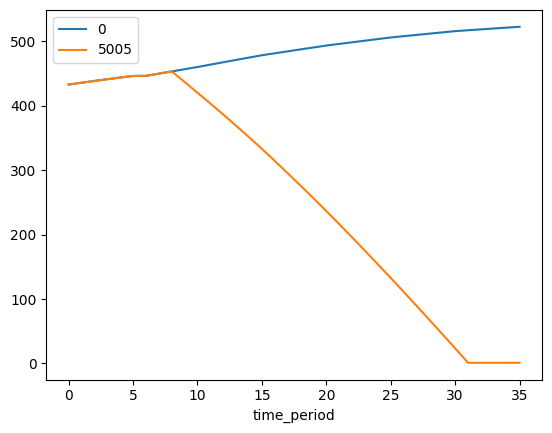

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [25]:
importlib.reload(sa)
importlib.reload(me)

model_energy = me.NonElectricEnergy(sa.model_attributes)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_ippu = mi.IPPU(sa.model_attributes)
model_ce = mce.CircularEconomy(sa.model_attributes)


df_ins = df_input.copy()

# afolu
df_out_afolu = model_afolu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_afolu,
    model_ce.integration_variables + model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# circular economy
df_out_ce = model_ce.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ce,
    model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# ippu
if False:
    df_out_ippu = model_ippu.project(df_ins)
    df_ins = sa.model_attributes.transfer_df_variables(
        df_ins,
        df_out_ippu,
        model_energy.integration_variables_non_fgtv
    )

    df_out_energy = model_energy.project(df_ins)



In [95]:
#sa.model_attributes.get_subsector_variables("Carbon Capture and Sequestration")
subsec = "ccsq"

for subsec in ["ccsq", "scoe", "trns", "inen"]:
    check1 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if f"energy_demand_enfu_subsector_total_pj_{subsec}" in x]
    ].sum(axis = 1))

    check2 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
    ].sum(axis = 1))
    
    check3 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" in x)]
    ].sum(axis = 1))
    
    print(f"subsec {subsec}:")
    print(check1 - check2)
    print(check1 - check3)
    print("")

subsec ccsq:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

subsec scoe:
[ 0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00 -2.27373675e-13 -2.27373675e-13  0.00000000e+00
 -2.27373675e-13  0.00000000e+00  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-2.27373675e-13 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0

In [63]:
print(subsec)
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
].sum(axis = 1)

df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
]
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
]

inen


,energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels,energy_demand_enfu_subsector_total_pj_inen_fuel_biogas,energy_demand_enfu_subsector_total_pj_inen_fuel_biomass,energy_demand_enfu_subsector_total_pj_inen_fuel_coal,energy_demand_enfu_subsector_total_pj_inen_fuel_coke,energy_demand_enfu_subsector_total_pj_inen_fuel_diesel,energy_demand_enfu_subsector_total_pj_inen_fuel_electricity,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid,energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline,...,energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower,energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene,energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear,energy_demand_enfu_subsector_total_pj_inen_fuel_ocean,energy_demand_enfu_subsector_total_pj_inen_fuel_oil,energy_demand_enfu_subsector_total_pj_inen_fuel_other,energy_demand_enfu_subsector_total_pj_inen_fuel_solar,energy_demand_enfu_subsector_total_pj_inen_fuel_waste,energy_demand_enfu_subsector_total_pj_inen_fuel_wind
0,0.0,0.0,2392.550271,1156.498987,977.969437,1.795398,5660.577095,264.509709,0.126464,0.241881,...,0.0,0.0,7676.644206,0.0,0.0,6992.150941,0.0,25.121778,0.0,0.0
1,0.0,0.0,2390.047010,1155.288973,976.932265,1.802197,5654.652551,264.226550,0.126943,0.242797,...,0.0,0.0,7668.603903,0.0,0.0,6984.826270,0.0,25.095494,0.0,0.0
2,0.0,0.0,2387.535988,1154.075208,975.892071,1.801933,5648.705836,263.942613,0.126925,0.242762,...,0.0,0.0,7660.538798,0.0,0.0,6977.479001,0.0,25.069128,0.0,0.0
3,0.0,0.0,2385.017195,1152.857687,974.848951,1.807626,5642.744148,263.657947,0.127326,0.243529,...,0.0,0.0,7652.448915,0.0,0.0,6970.109206,0.0,25.042681,0.0,0.0
4,0.0,0.0,2382.490633,1151.636410,973.803042,1.810135,5636.762524,263.372617,0.127503,0.243867,...,0.0,0.0,7644.334349,0.0,0.0,6962.716958,0.0,25.016152,0.0,0.0
5,0.0,0.0,2379.956288,1150.411371,972.754439,1.848598,5630.782554,263.086672,0.130212,0.249049,...,0.0,0.0,7636.195115,0.0,0.0,6955.302400,0.0,24.989541,0.0,0.0
6,0.0,0.0,2389.686941,1155.114925,976.744397,1.888368,5653.827919,264.166795,0.133013,0.254407,...,0.0,0.0,7667.423370,0.0,0.0,6983.747337,0.0,25.091713,0.0,0.0
7,0.0,0.0,2399.293969,1159.758722,980.671442,1.929625,5676.575460,265.227176,0.135919,0.259965,...,0.0,0.0,7698.247286,0.0,0.0,7011.822795,0.0,25.192587,0.0,0.0
8,0.0,0.0,2408.786445,1164.347148,984.551620,1.972318,5699.052796,266.274868,0.138926,0.265717,...,0.0,0.0,7728.703626,0.0,0.0,7039.563453,0.0,25.292258,0.0,0.0
9,0.0,0.0,2418.167497,1168.881714,988.386211,2.016493,5721.267356,267.310219,0.142038,0.271668,...,0.0,0.0,7758.802431,0.0,0.0,7066.978456,0.0,25.390759,0.0,0.0


In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)



In [43]:
df_iar = sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)
df_oar = sq.sql_table_to_df(
    engine,
    "OutputActivityRatio"
    #"InputActivityRatio"
)
df_oar

,id,r,t,f,m,y,val
0,1,costa_rica,pp_biogas,fuel_electricity,generate,1000,1.0
1,2,costa_rica,pp_biogas,fuel_electricity,generate,1001,1.0
2,3,costa_rica,pp_biogas,fuel_electricity,generate,1002,1.0
3,4,costa_rica,pp_biogas,fuel_electricity,generate,1003,1.0
4,5,costa_rica,pp_biogas,fuel_electricity,generate,1004,1.0
...,...,...,...,...,...,...,...
967,968,costa_rica,supply_fuel_wind,fuel_wind,generate,1031,1.0
968,969,costa_rica,supply_fuel_wind,fuel_wind,generate,1032,1.0
969,970,costa_rica,supply_fuel_wind,fuel_wind,generate,1033,1.0
970,971,costa_rica,supply_fuel_wind,fuel_wind,generate,1034,1.0


In [2]:
sq.sql_table_to_df(
    engine,
    "FUELS"
    #"InputActivityRatio"
)

NameError: name 'sq' is not defined

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [16]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

In [38]:
df_try[[
    x for x in df_try.columns if ("aviation" in x)
]];
# occrate in aviation is 
df_try2 = df_try[
    df_try["time_period"].isin([0, 1, 2]) & 
    df_try["strategy_id"].isin([0])
].reset_index(drop = True);

df_try2[[
    x for x in df_try2.columns if ("trde" in x)
]]


,deminit_trde_freight_mt_km,deminit_trde_private_and_public_per_capita_passenger_km,deminit_trde_regional_per_capita_passenger_km,demscalar_trde_freight,demscalar_trde_private_and_public,demscalar_trde_regional,elasticity_trde_mtkm_to_gdp_freight,elasticity_trde_pkm_to_gdppc_private_and_public,elasticity_trde_pkm_to_gdppc_regional
0,1.988759e+06,0.008526,0.005480,1.0,1.0,1.0,1.0,0.14,0.3
1,1.955245e+06,0.008501,0.005401,1.0,1.0,1.0,1.0,0.14,0.3
2,1.955245e+06,0.008501,0.005401,1.0,1.0,1.0,1.0,0.14,0.3


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

